In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/f

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.10
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [3]:
df_out = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/21.세종시_전출자수.csv', encoding='utf-8')
df_out

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동
0      201701     3    조치원읍   강원도      원주시    단계동
1      201701     9    조치원읍   강원도      춘천시   신사우동
2      201701    13    조치원읍   강원도      홍천군     서면
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동
...       ...   ...     ...   ...      ...    ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍
80988  202101     2     다정동  충청북도   청주시상당구   용암1동
80989  202101    35     다정동  충청북도   청주시청원구    오창읍
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍

[80992 rows x 6 columns]

In [ ]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80992 entries, 0 to 80991
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년월       80992 non-null  int64 
 1   전출자수     80992 non-null  int64 
 2   세종전출행정동  80992 non-null  object
 3   전입시      80992 non-null  object
 4   전입시군구    80992 non-null  object
 5   전입읍면동    80992 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


In [15]:
df_out.describe().round(2)

년월      전출자수
count   80992.00  80992.00
mean   201878.32     18.88
std       114.65    140.80
min    201701.00      1.00
25%    201803.00      1.00
50%    201904.00      4.00
75%    202003.00     12.00
max    202101.00   7335.00

In [ ]:
df_out.groupby('년월').sum('전출자수')

전출자수
년월           
201701  25170
201702  31640
201703  28828
201704  25219
201705  31010
201706  27887
201707  27570
201708  32309
201709  26035
201710  23362
201711  24698
201712  27634
201801  30180
201802  29235
201803  30914
201804  30259
201805  27696
201806  25467
201807  29712
201808  27152
201809  22586
201810  29074
201811  26805
201812  29350
201901  33482
201902  32964
201903  27999
201904  26407
201905  28188
201906  27314
201907  31809
201908  30256
201909  31035
201910  33166
201911  31530
201912  34196
202001  38173
202002  43424
202003  36876
202004  31649
202005  31120
202006  40764
202007  33804
202008  35434
202009  36120
202010  45253
202011  40983
202012  43694
202101  33780

In [4]:
df_out_fromplace = df_out.groupby(['년월', '세종전출행정동']).sum('전출자수')
# pd.set_option('display.max_rows',None)  # 중간 생략 행 전부 보기 
df_out_fromplace.to_excel('df_out_fromplace.xlsx')  # 엑셀파일로 내보내기 

df_out_fromplace

전출자수
년월     세종전출행정동      
201701 금남면      1909
       도담동      3043
       부강면       812
       소정면       218
       아름동      3746
...              ...
202101 전동면       217
       전의면       537
       조치원읍     7844
       종촌동      2350
       한솔동      1564

[890 rows x 1 columns]

In [5]:
df_out_inplace = df_out.groupby(['년월', '전입시군구']).sum('전출자수')
# pd.set_option('display.max_rows',None)  # 중간 생략 행 전부 보기 
df_out_inplace.to_excel('df_out_inplace.xlsx')  # 엑셀파일로 내보내기 

df_out_inplace

전출자수
년월     전입시군구      
201701 가평군      32
       강남구      28
       강동구      10
       강릉시       8
       강북구       5
...            ...
202101 홍성군     259
       홍천군      13
       화성시     225
       화순군      43
       화천군      24

[9075 rows x 1 columns]

## 전입시가 세종시인 경우

In [11]:
aa = df_out['전입시']==('세종특별자치시')
df_out['aa'] = aa
bb = df_out['aa']==True
df_out_fromSejoing = df_out[bb]

df_out_fromSejoing.to_excel('세종시간 이동.xlsx')

# 2017년도 전입자 추이

In [ ]:
df_out['201701'] = df_out['년월']==201701
df_out

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동  201701
0      201701     3    조치원읍   강원도      원주시    단계동    True
1      201701     9    조치원읍   강원도      춘천시   신사우동    True
2      201701    13    조치원읍   강원도      홍천군     서면    True
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동    True
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동    True
...       ...   ...     ...   ...      ...    ...     ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍   False
80988  202101     2     다정동  충청북도   청주시상당구   용암1동   False
80989  202101    35     다정동  충청북도   청주시청원구    오창읍   False
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동   False
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍   False

[80992 rows x 7 columns]

In [ ]:
a = 201701

for i in range(1, 13):
    df_out_a = df_out['년월']==a
    df_out[a] = df_out_a
    a += 1
print(df_out)

           년월  전출자수 세종전출행정동   전입시  ... 201709 201710  201711  201712
0      201701     3    조치원읍   강원도  ...  False  False   False   False
1      201701     9    조치원읍   강원도  ...  False  False   False   False
2      201701    13    조치원읍   강원도  ...  False  False   False   False
3      201701     3    조치원읍   경기도  ...  False  False   False   False
4      201701     1    조치원읍   경기도  ...  False  False   False   False
...       ...   ...     ...   ...  ...    ...    ...     ...     ...
80987  202101    22     다정동  충청북도  ...  False  False   False   False
80988  202101     2     다정동  충청북도  ...  False  False   False   False
80989  202101    35     다정동  충청북도  ...  False  False   False   False
80990  202101    13     다정동  충청북도  ...  False  False   False   False
80991  202101    84     다정동  충청북도  ...  False  False   False   False

[80992 rows x 19 columns]


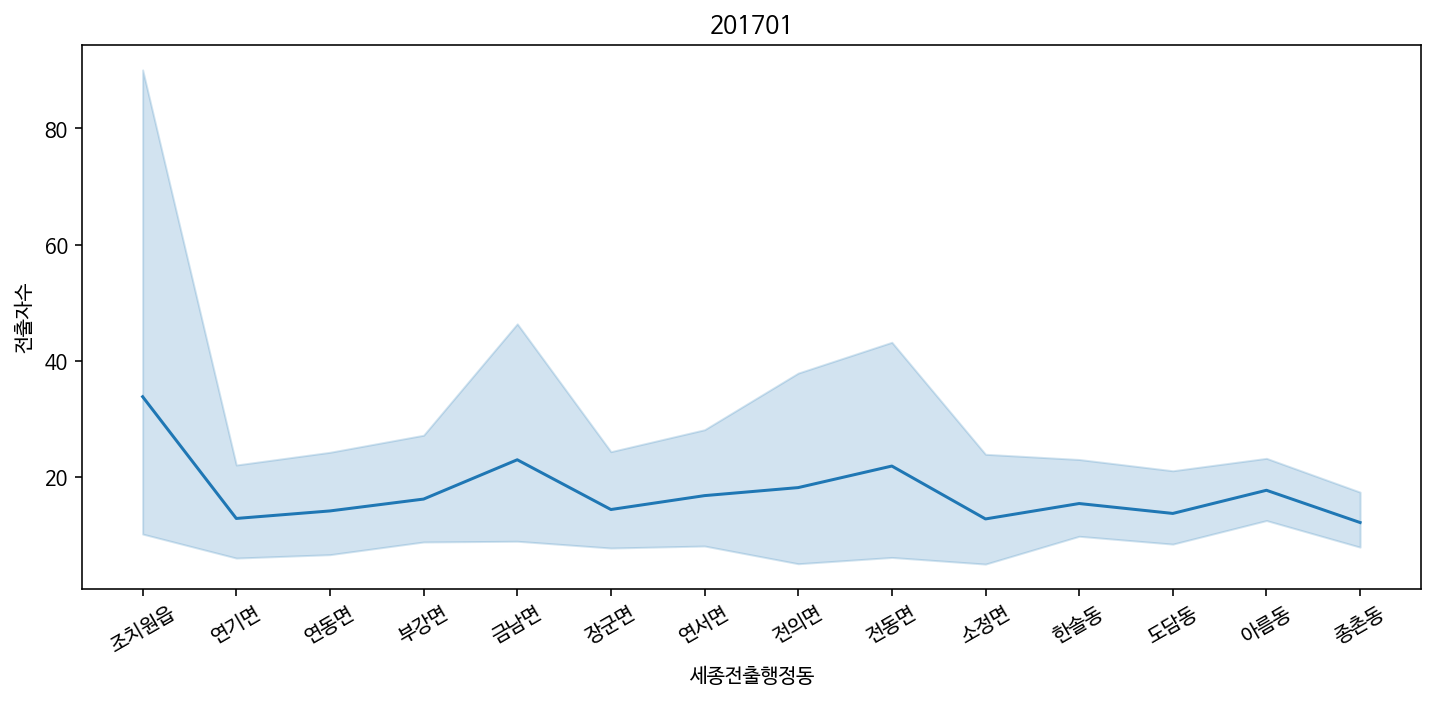

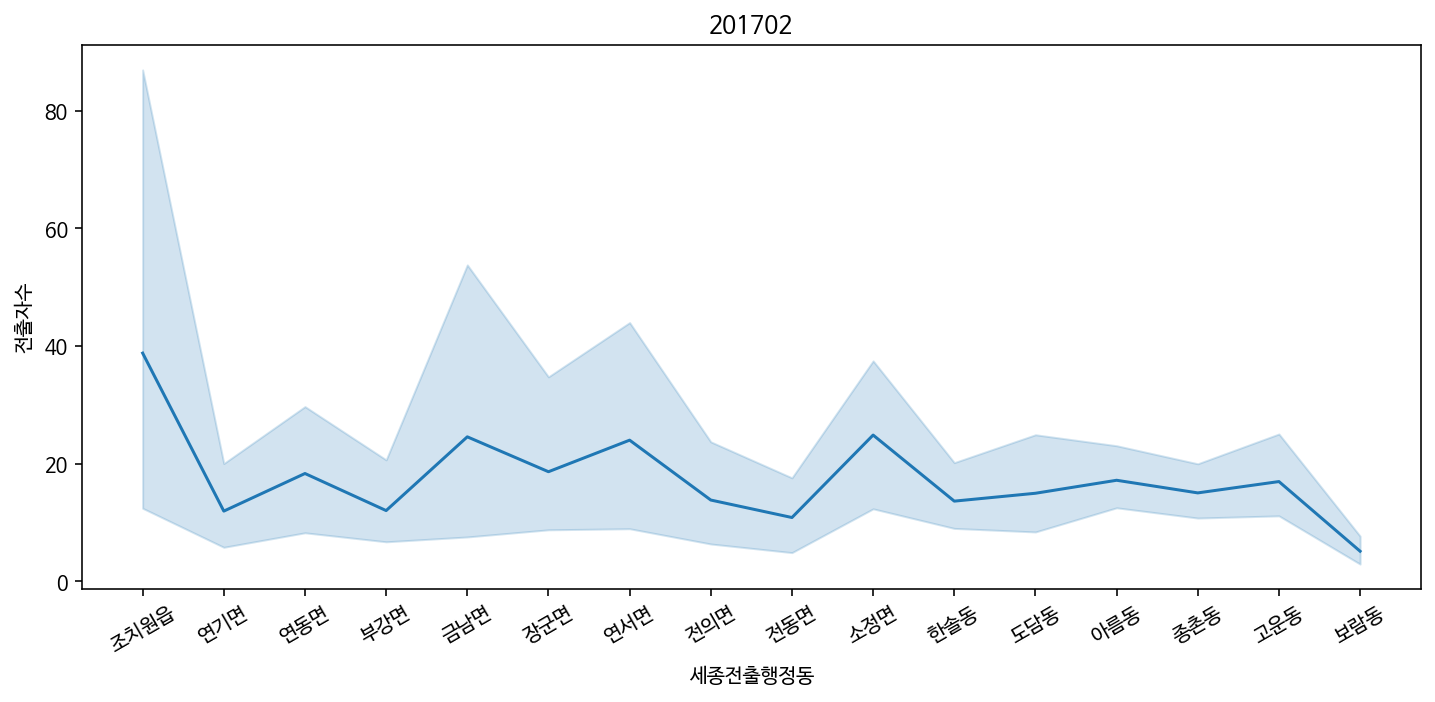

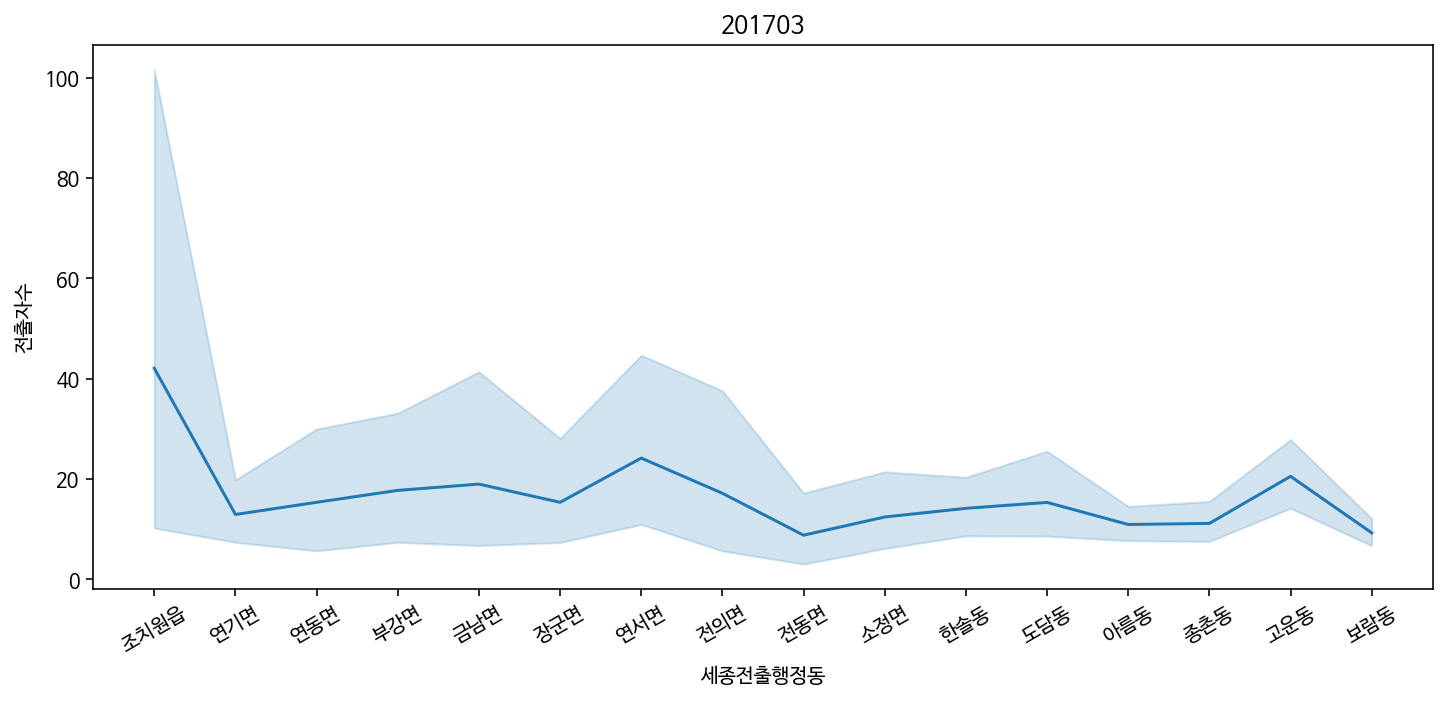

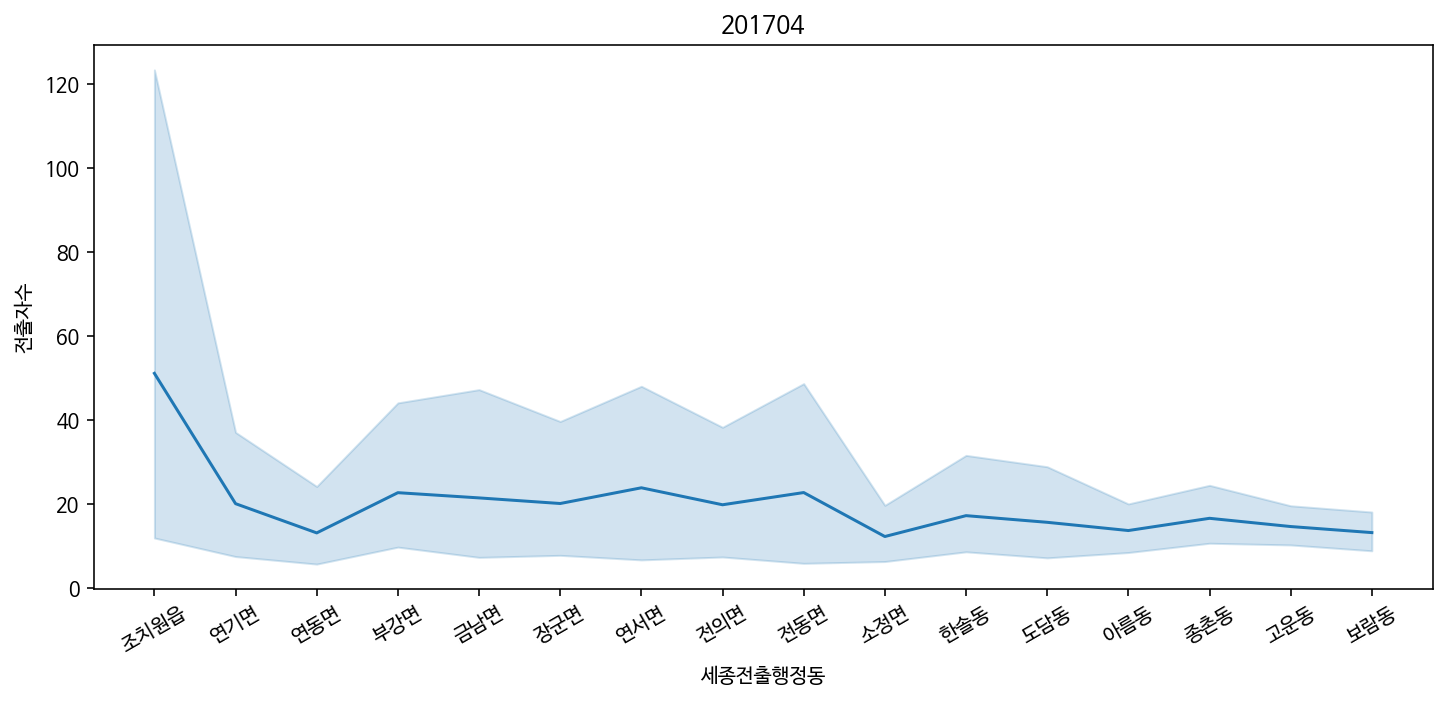

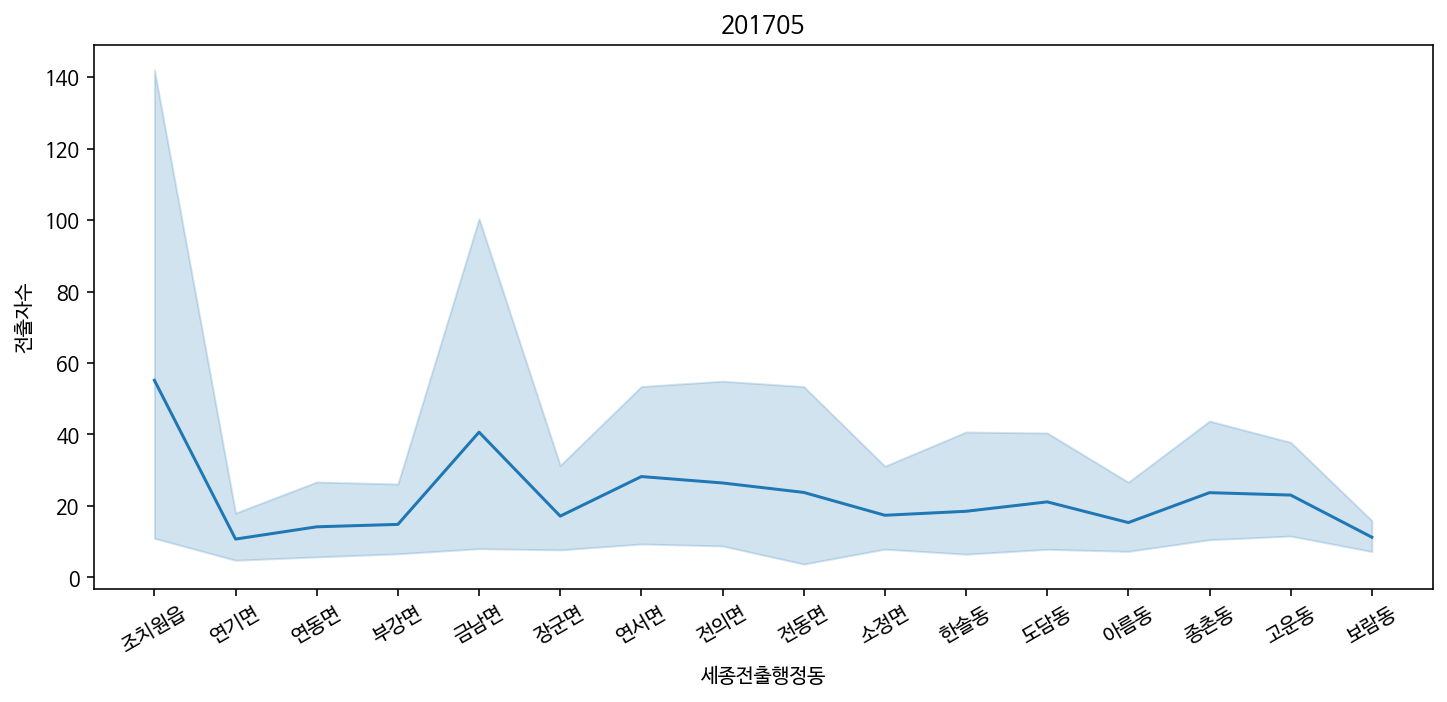

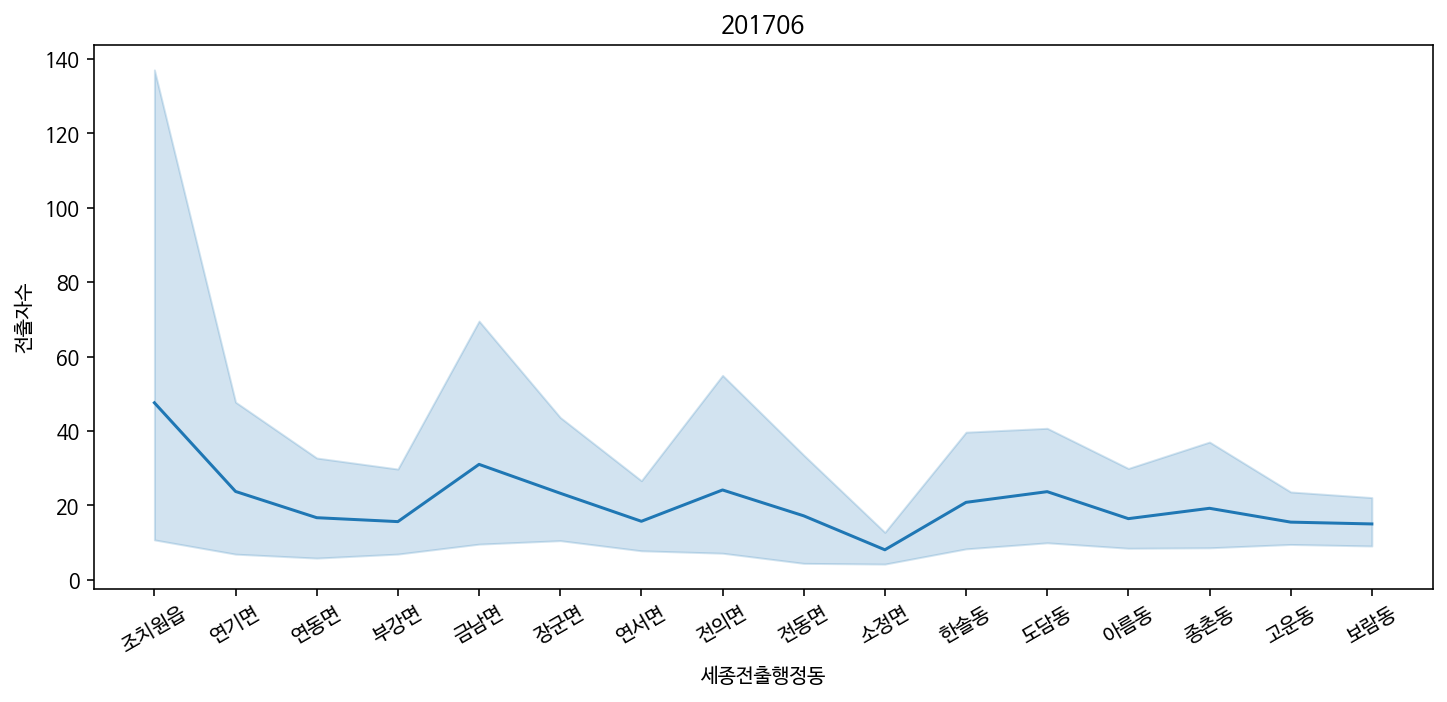

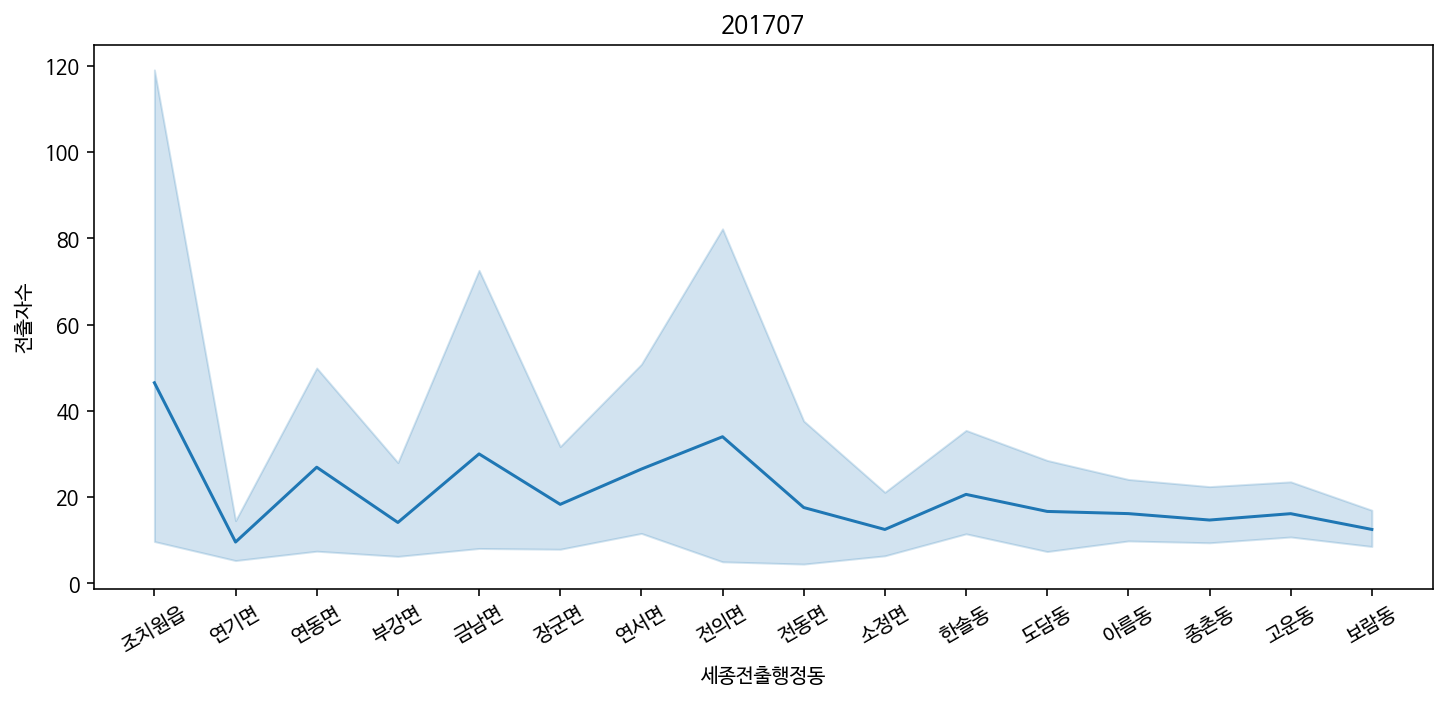

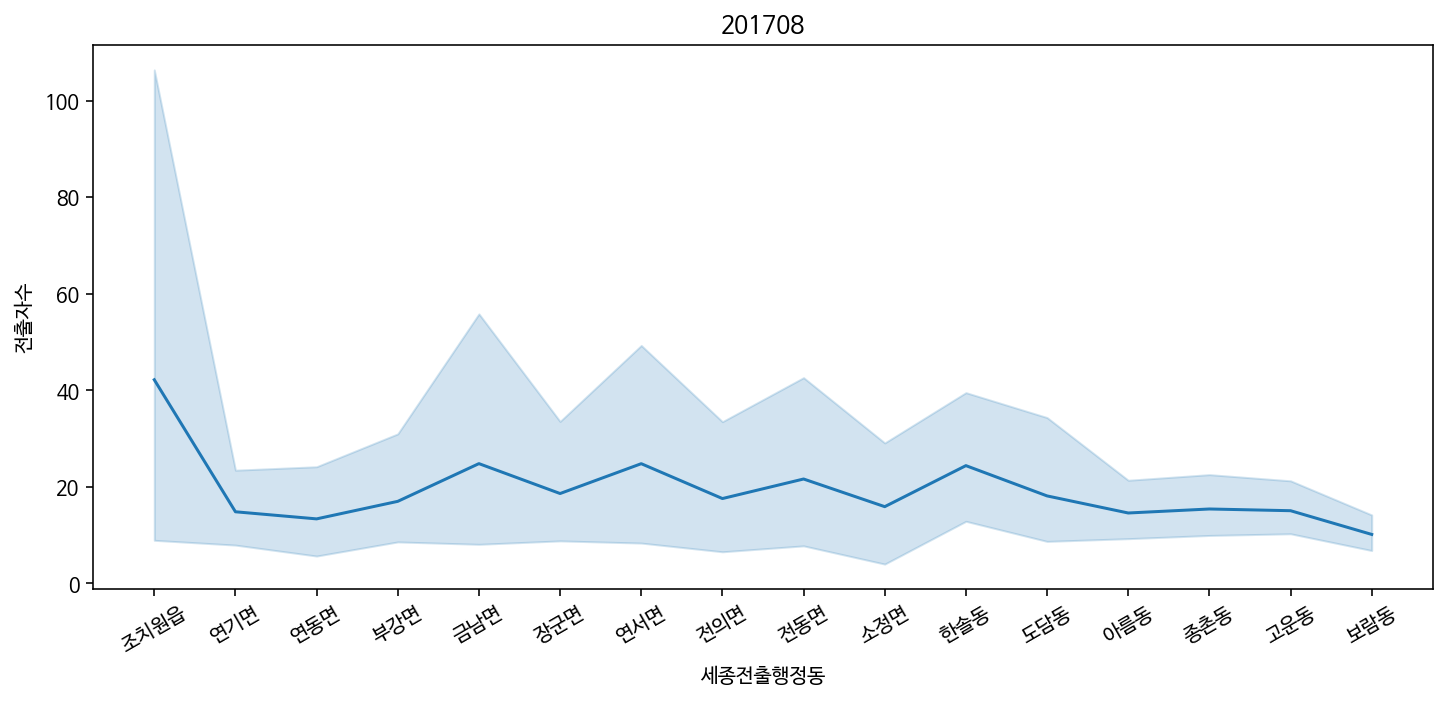

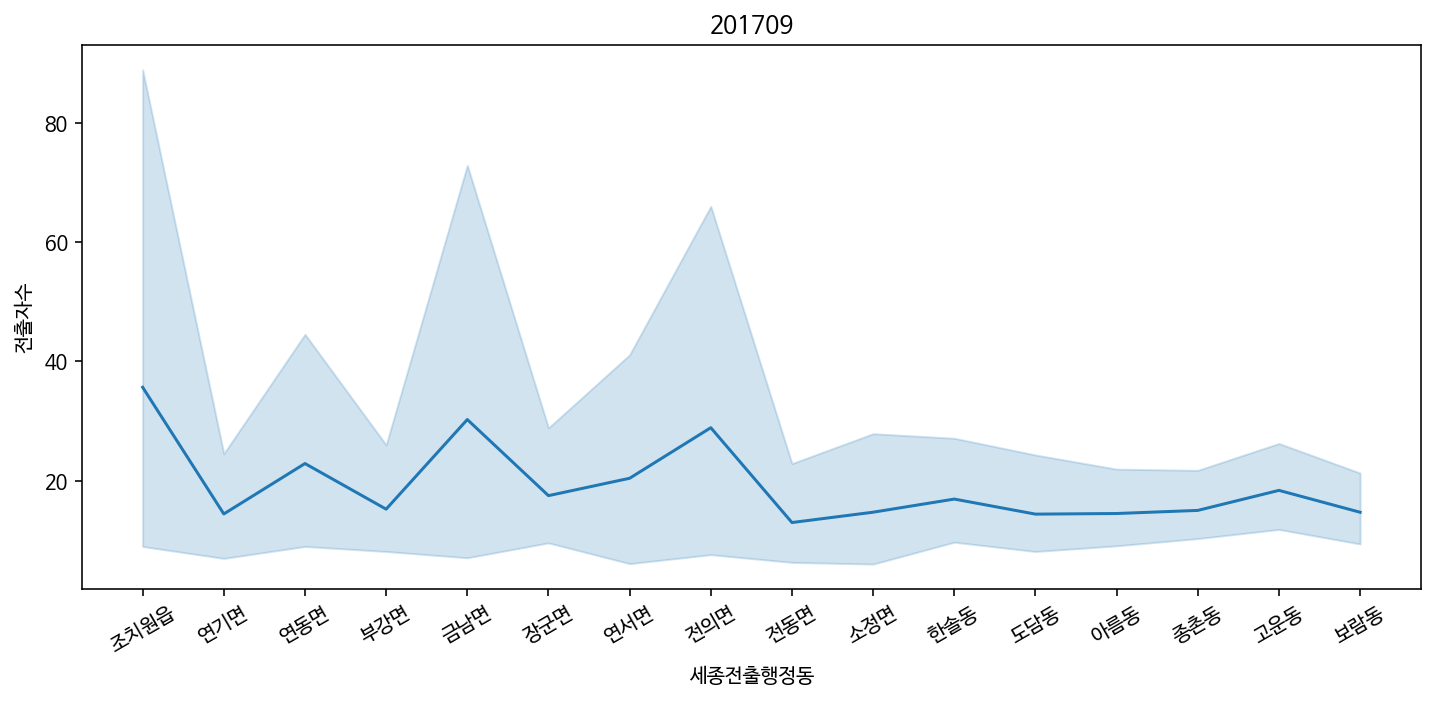

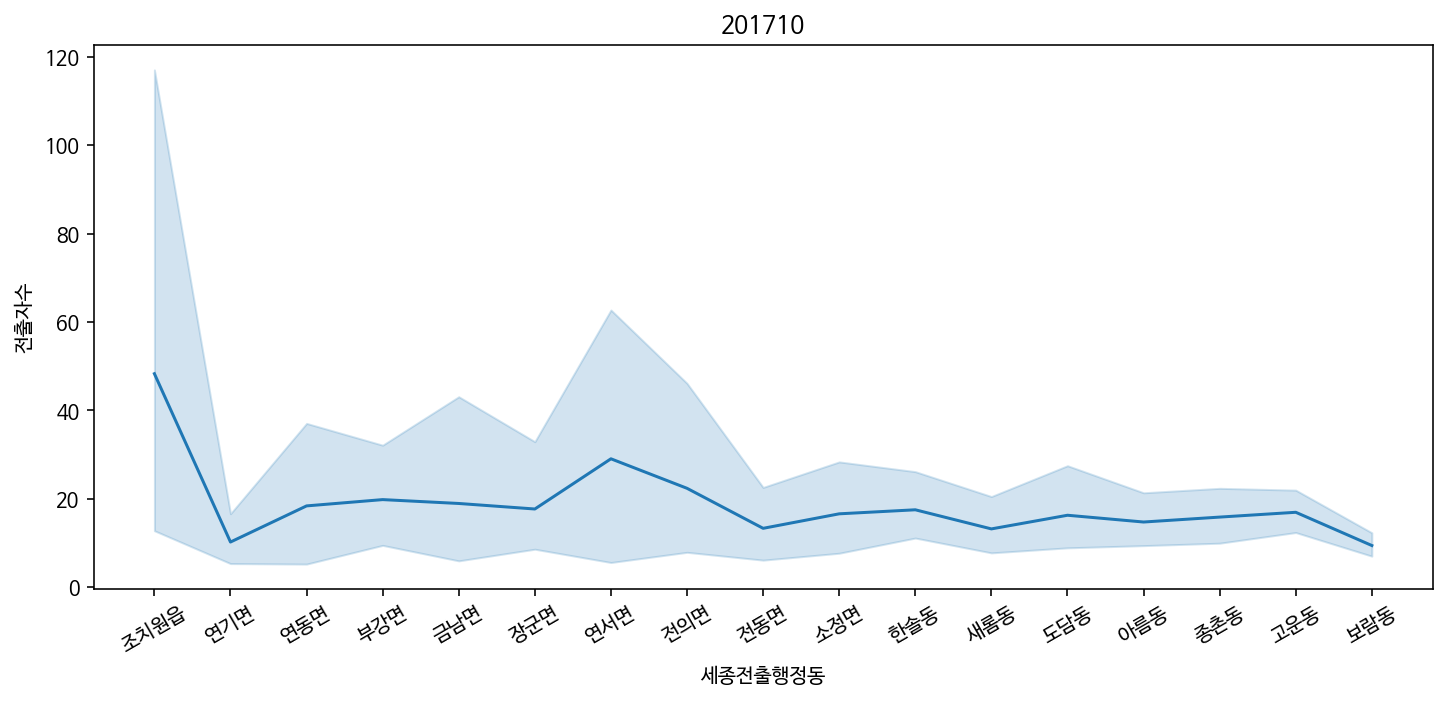

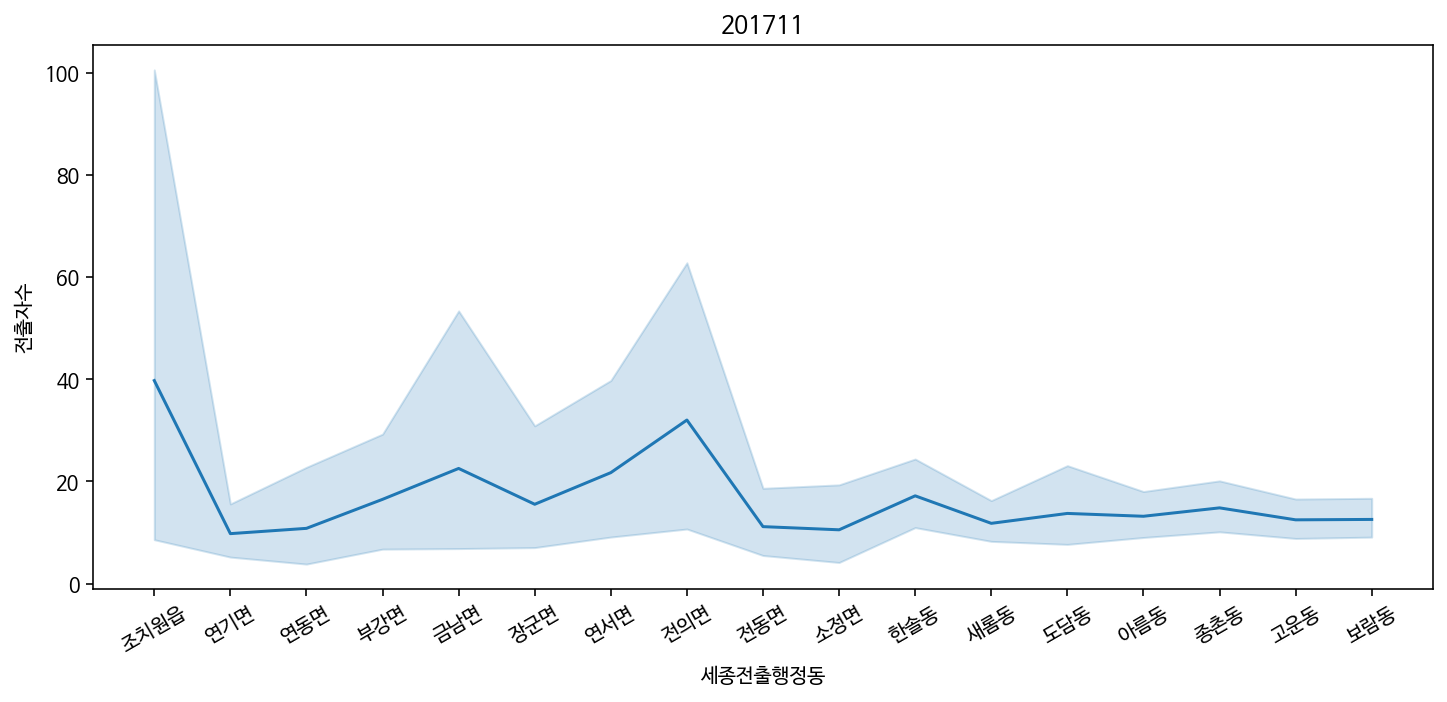

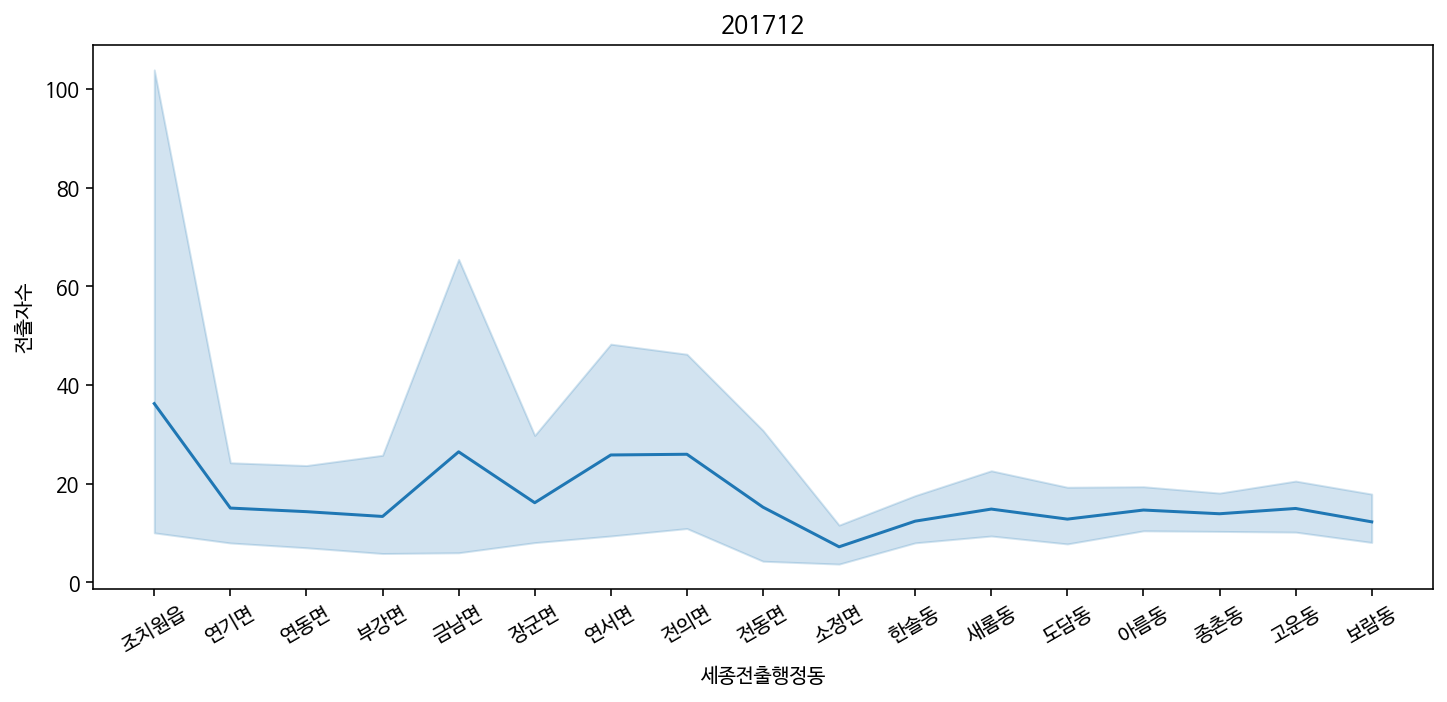

In [ ]:
a = 201701

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=out_a['세종전출행정동'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

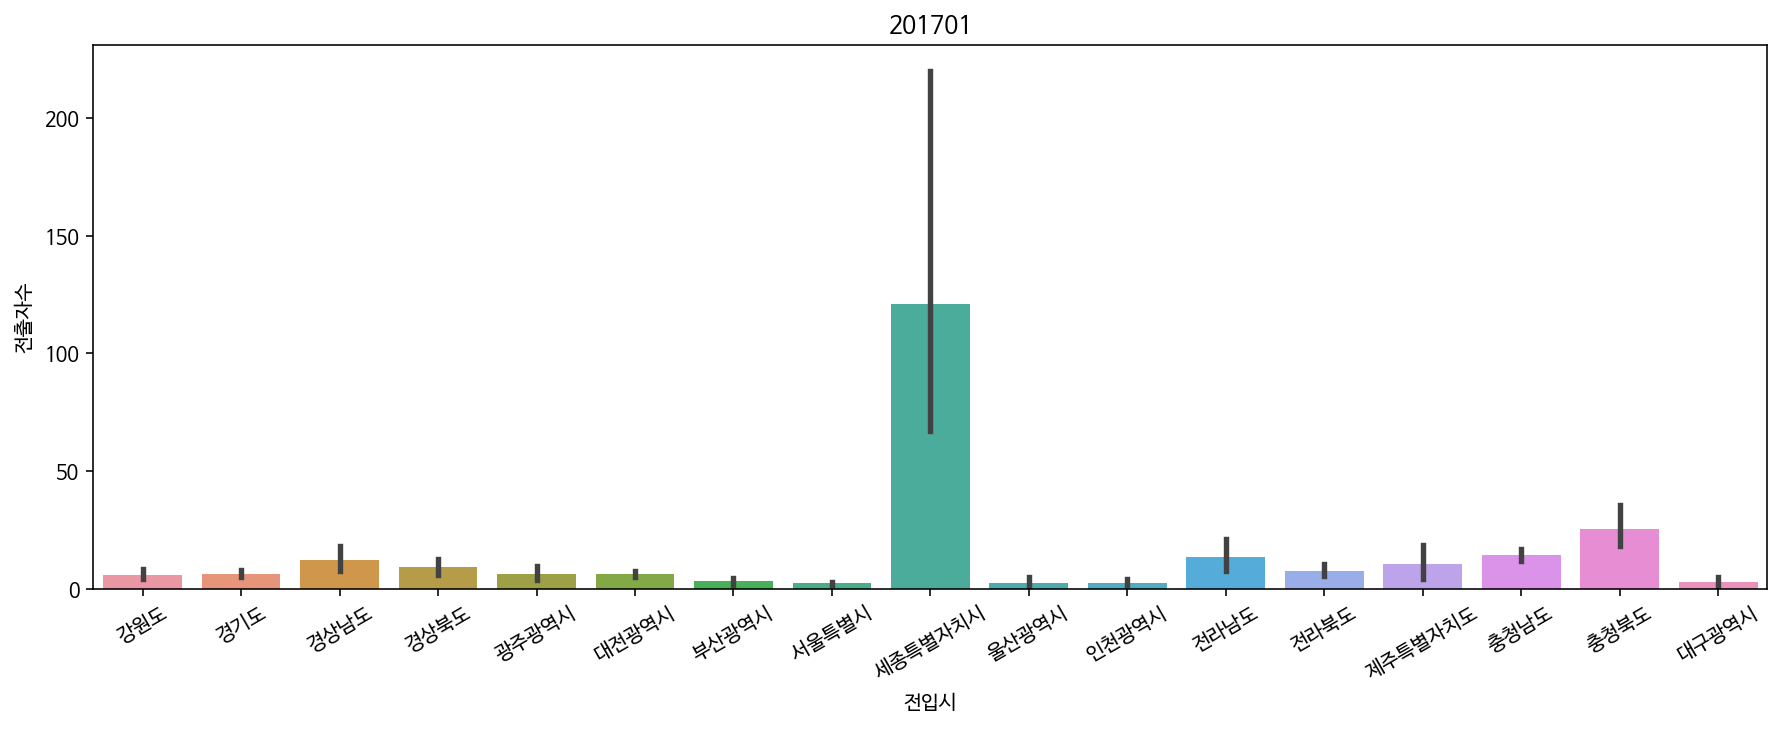

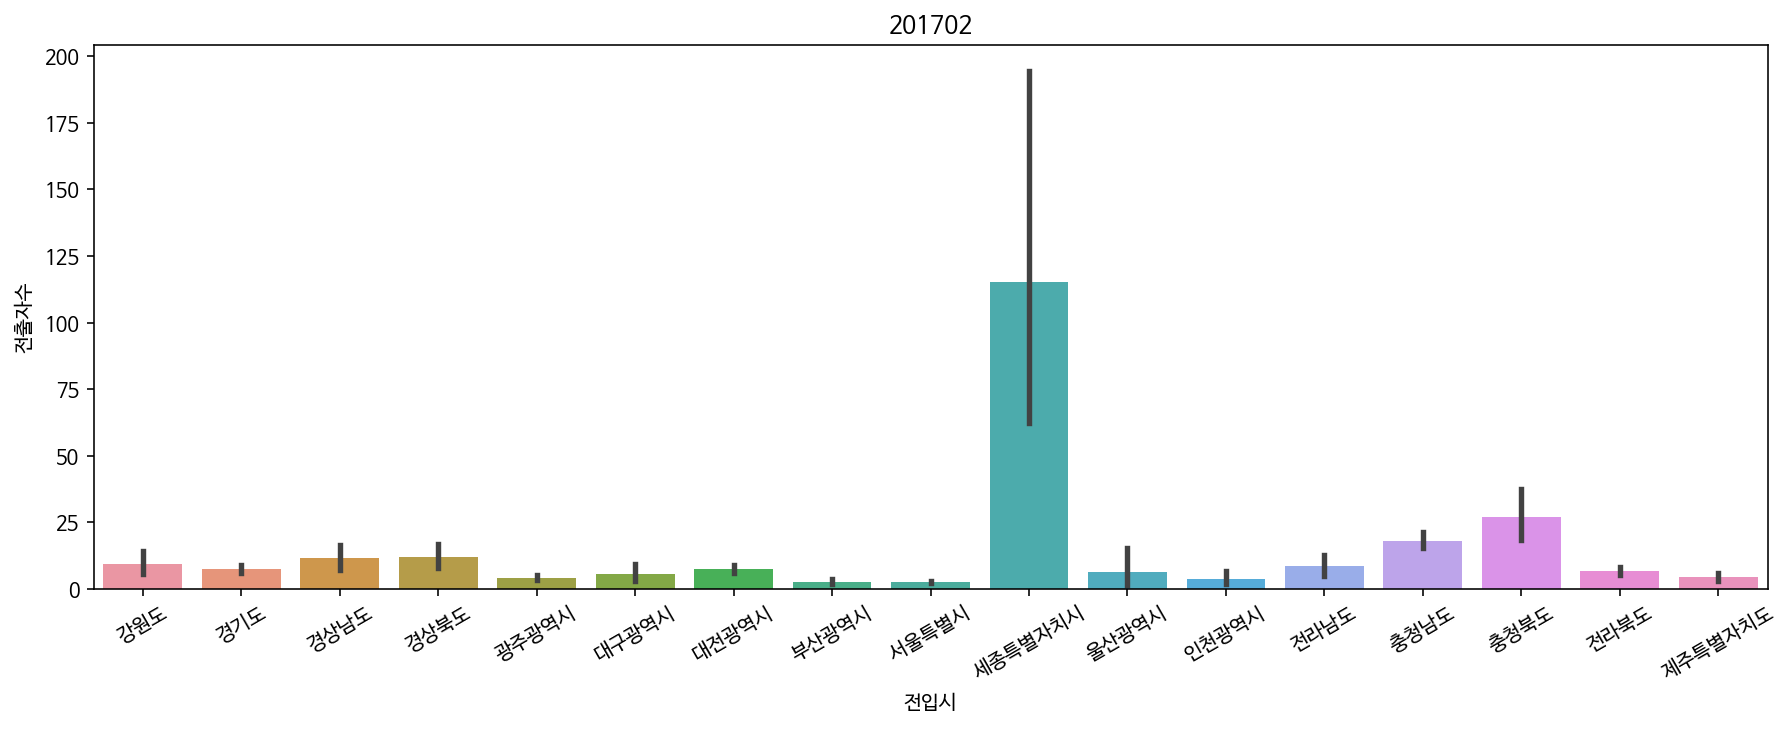

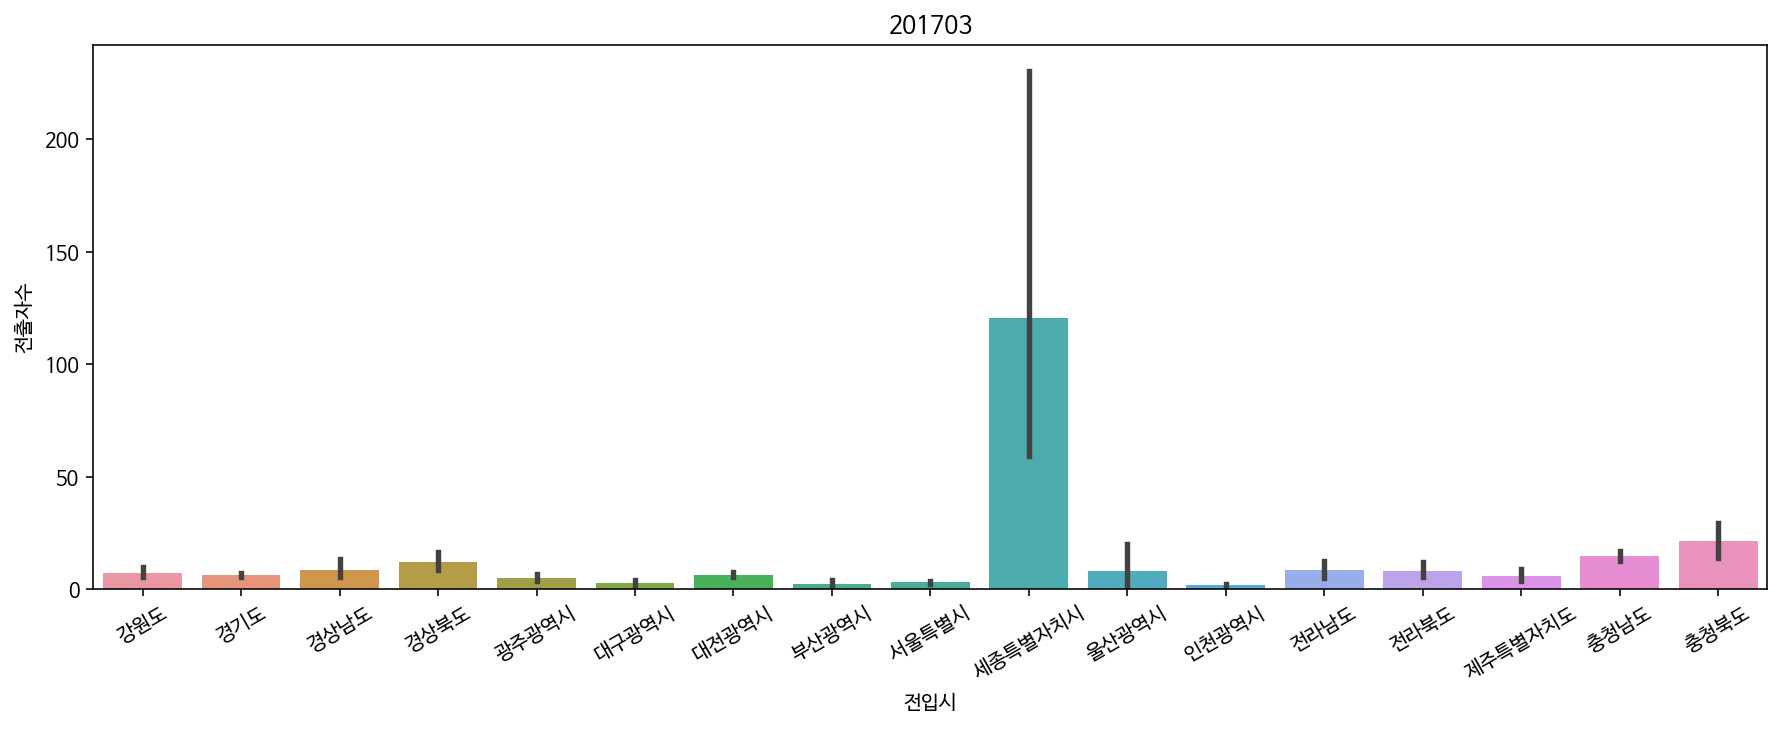

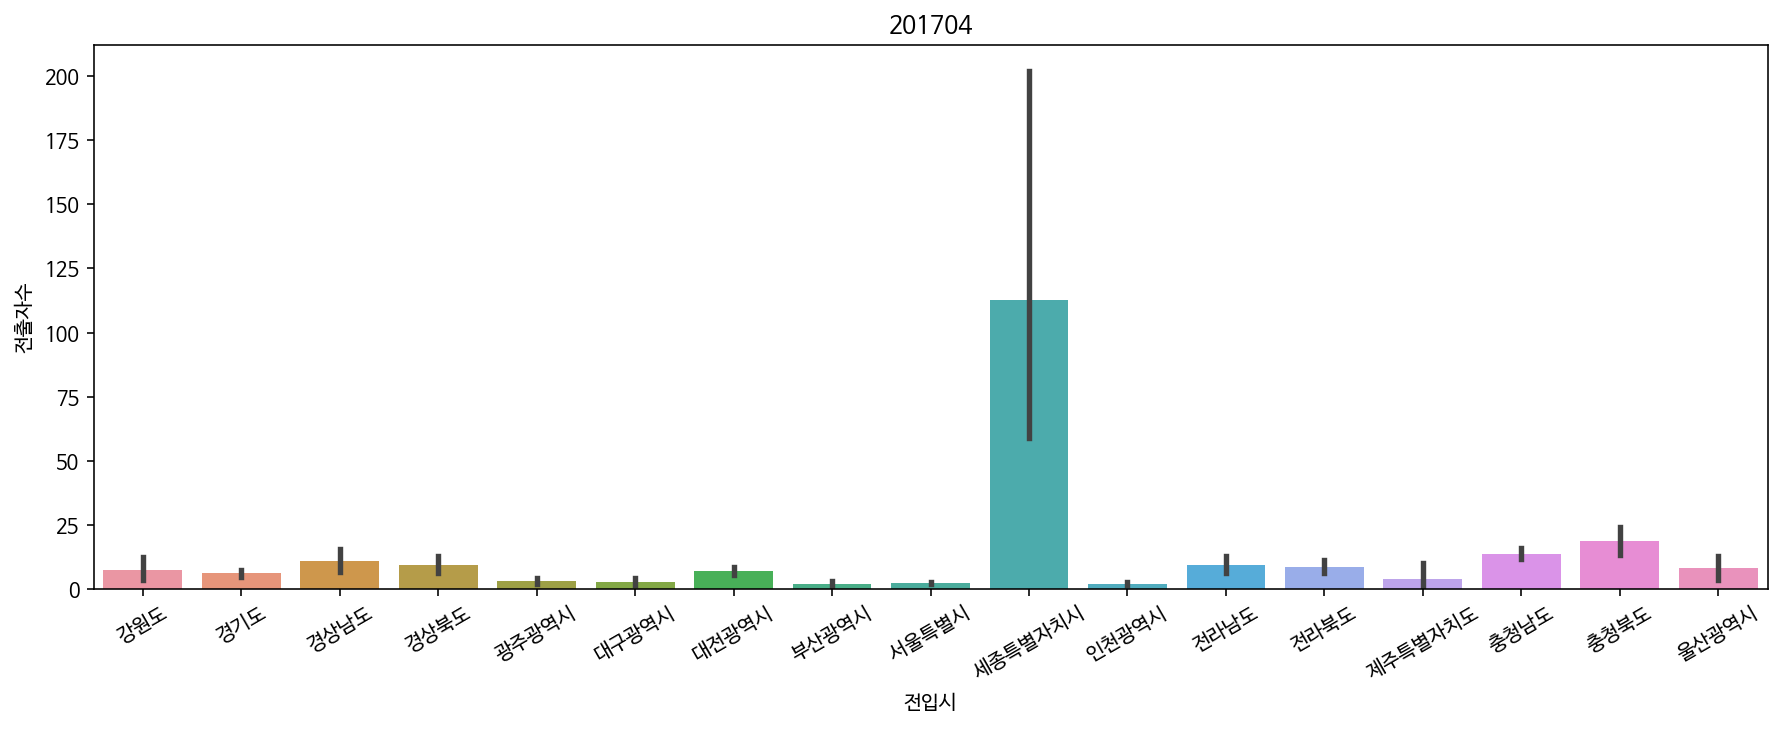

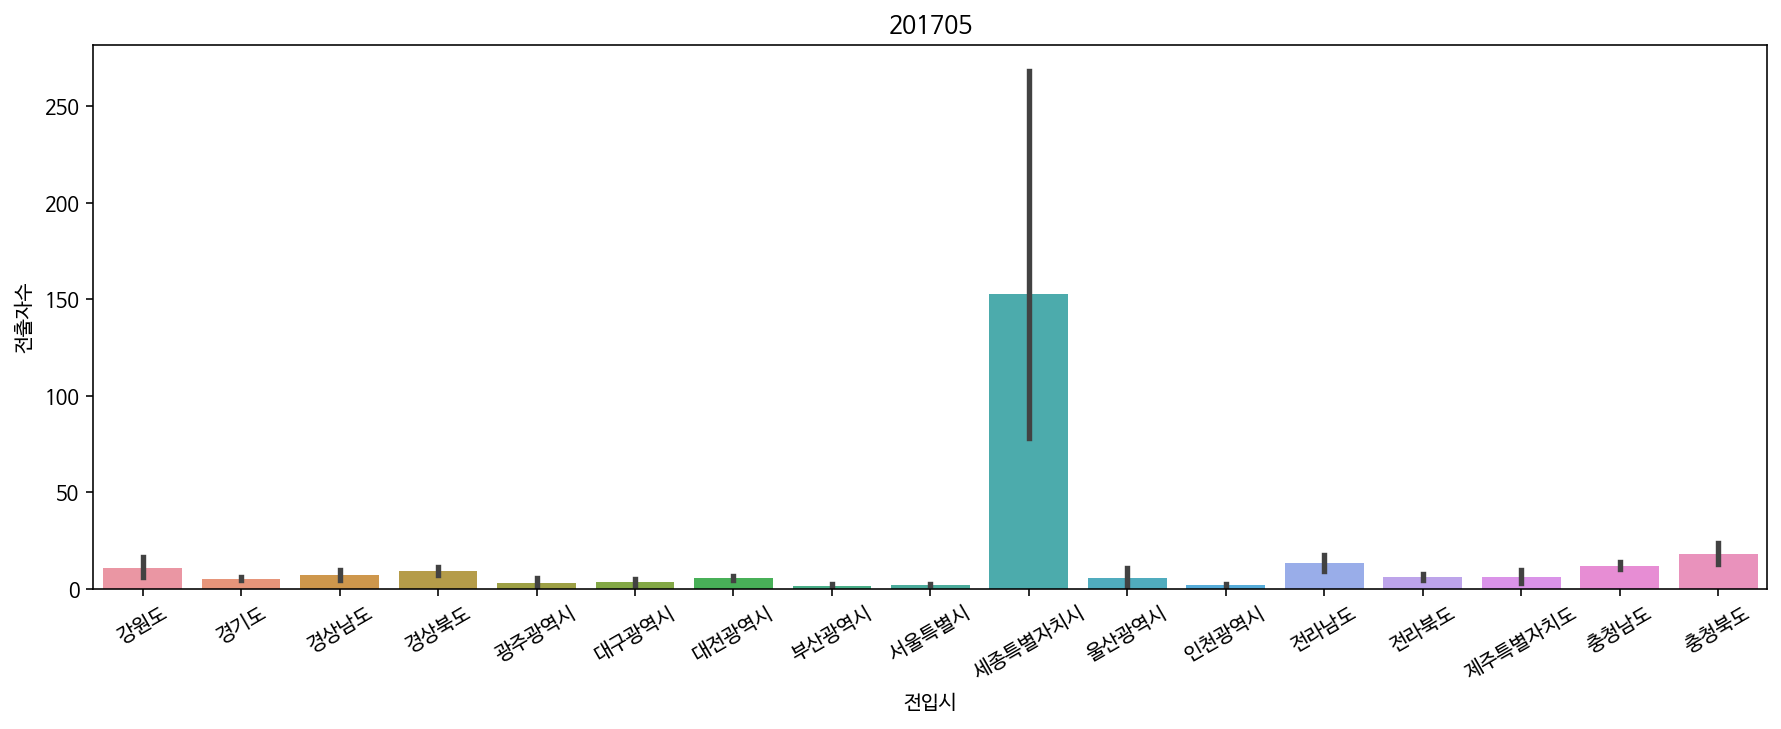

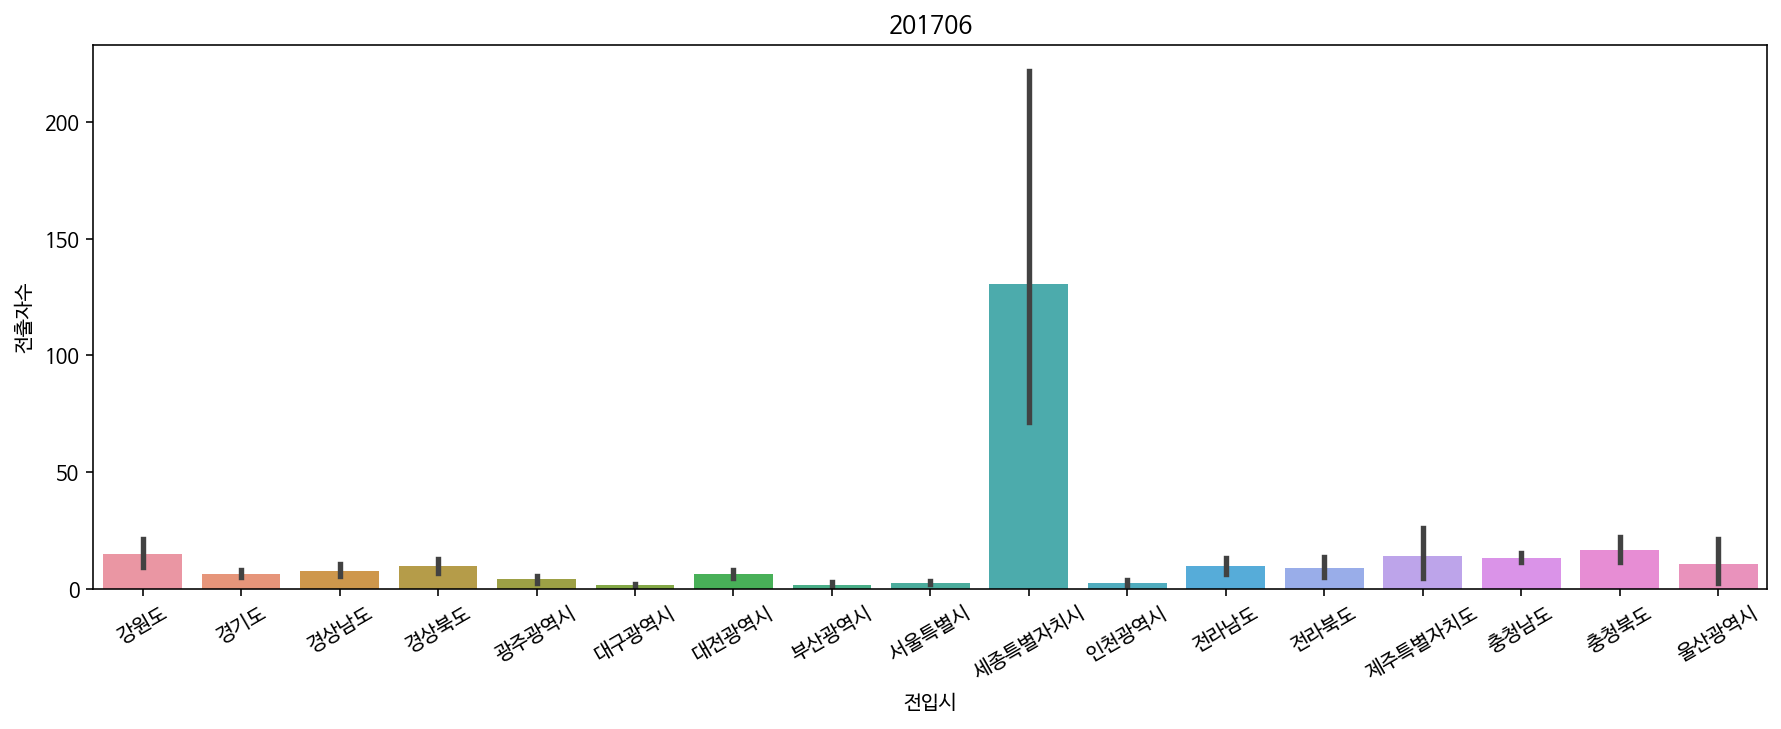

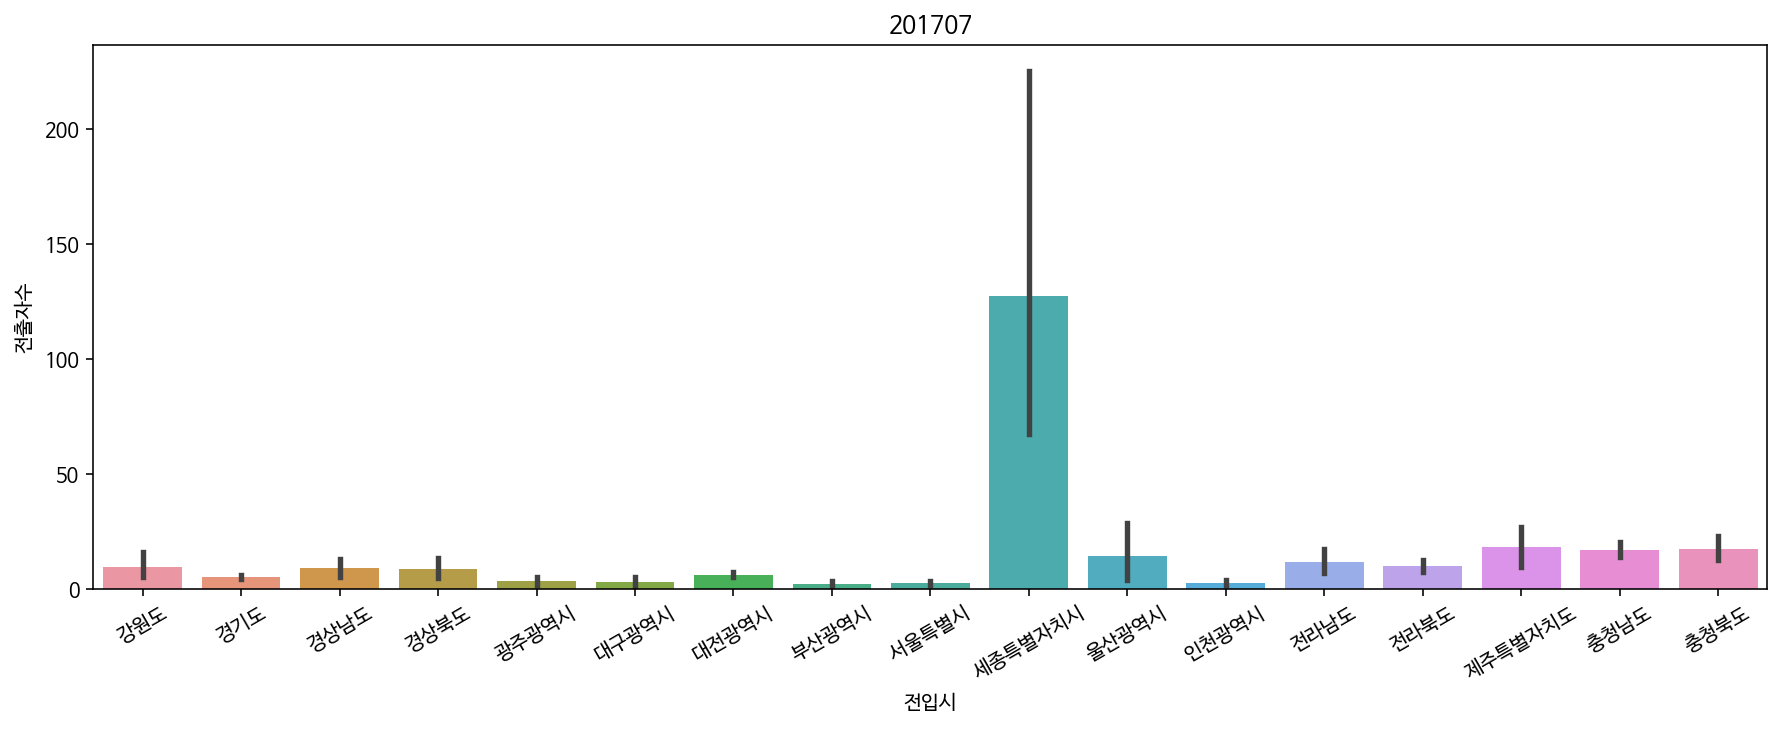

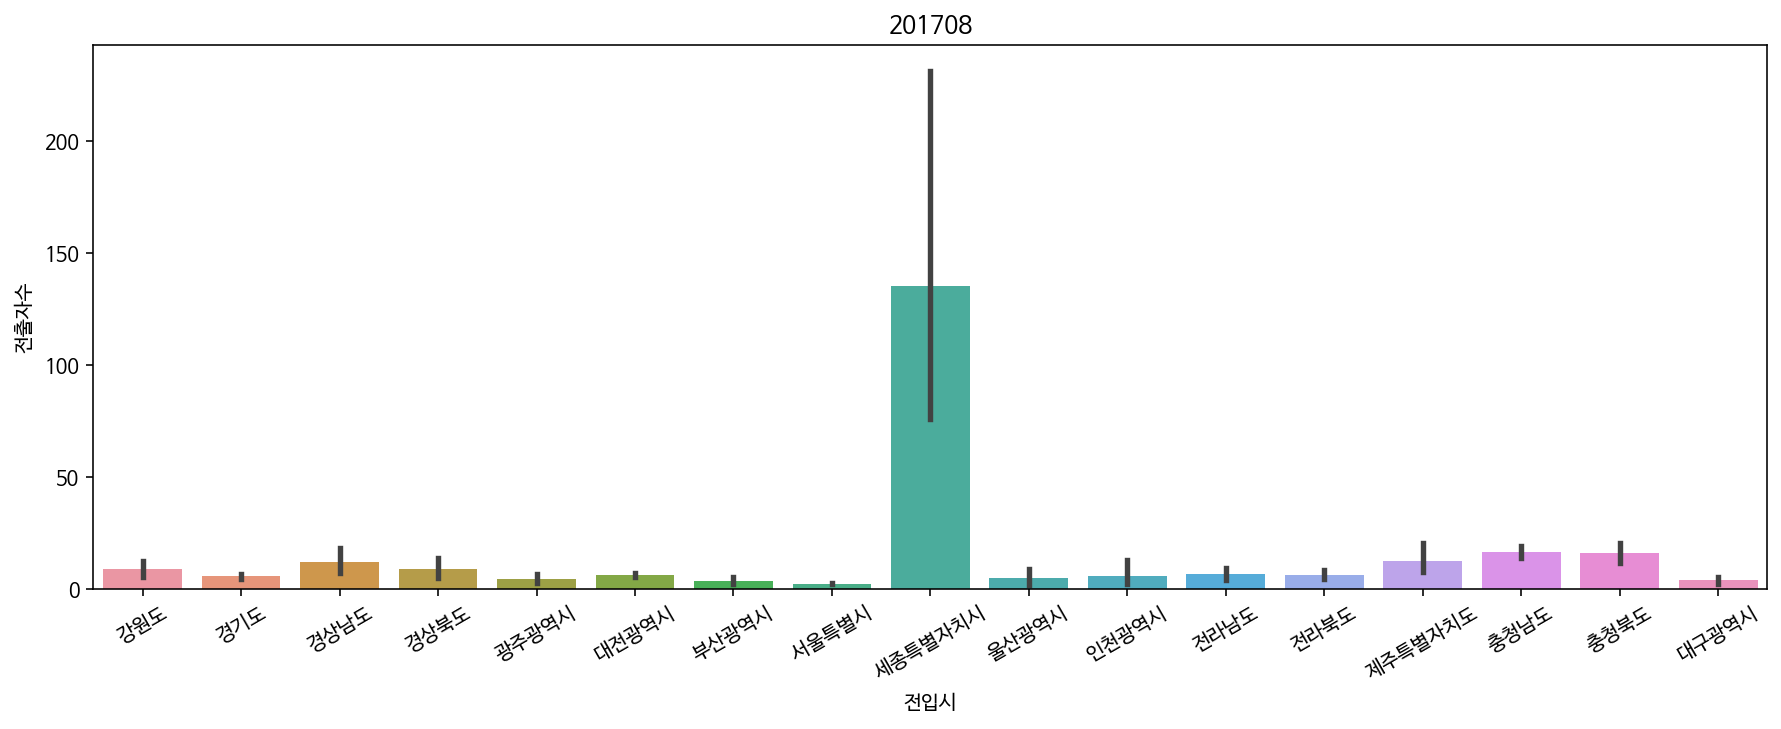

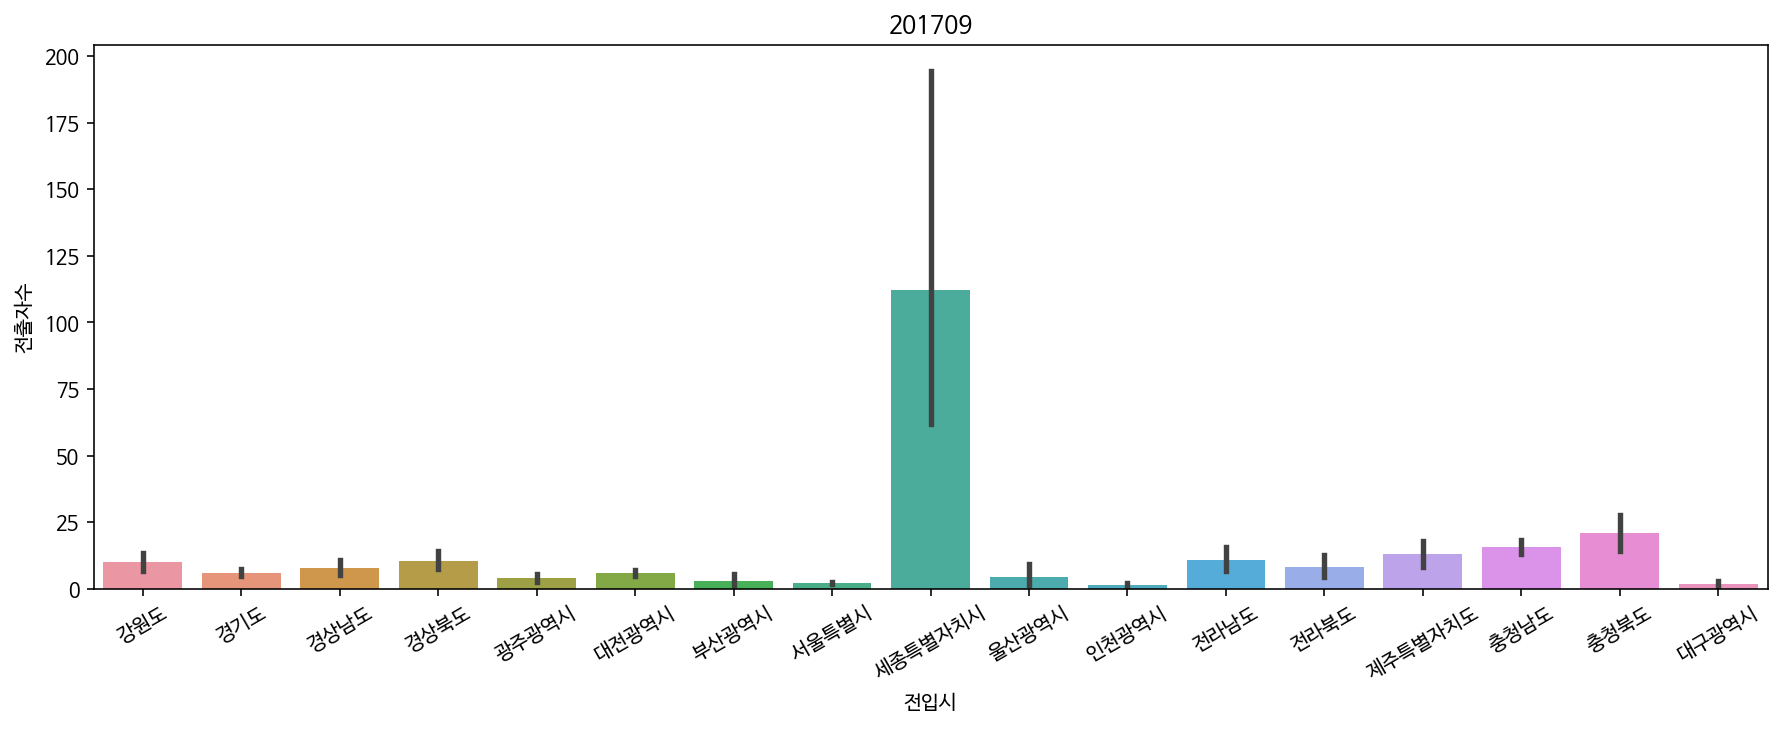

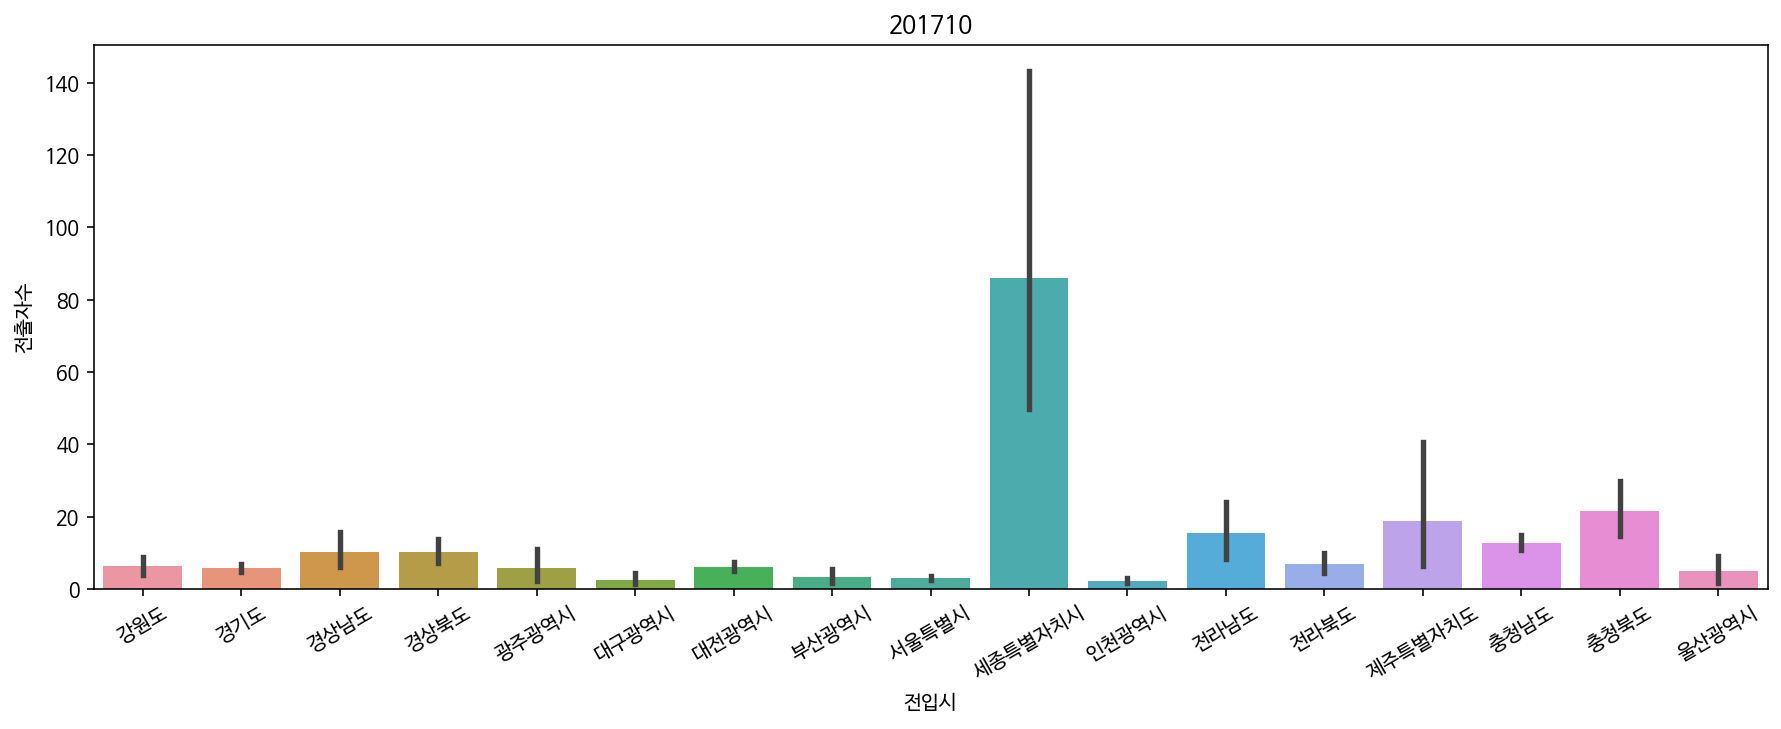

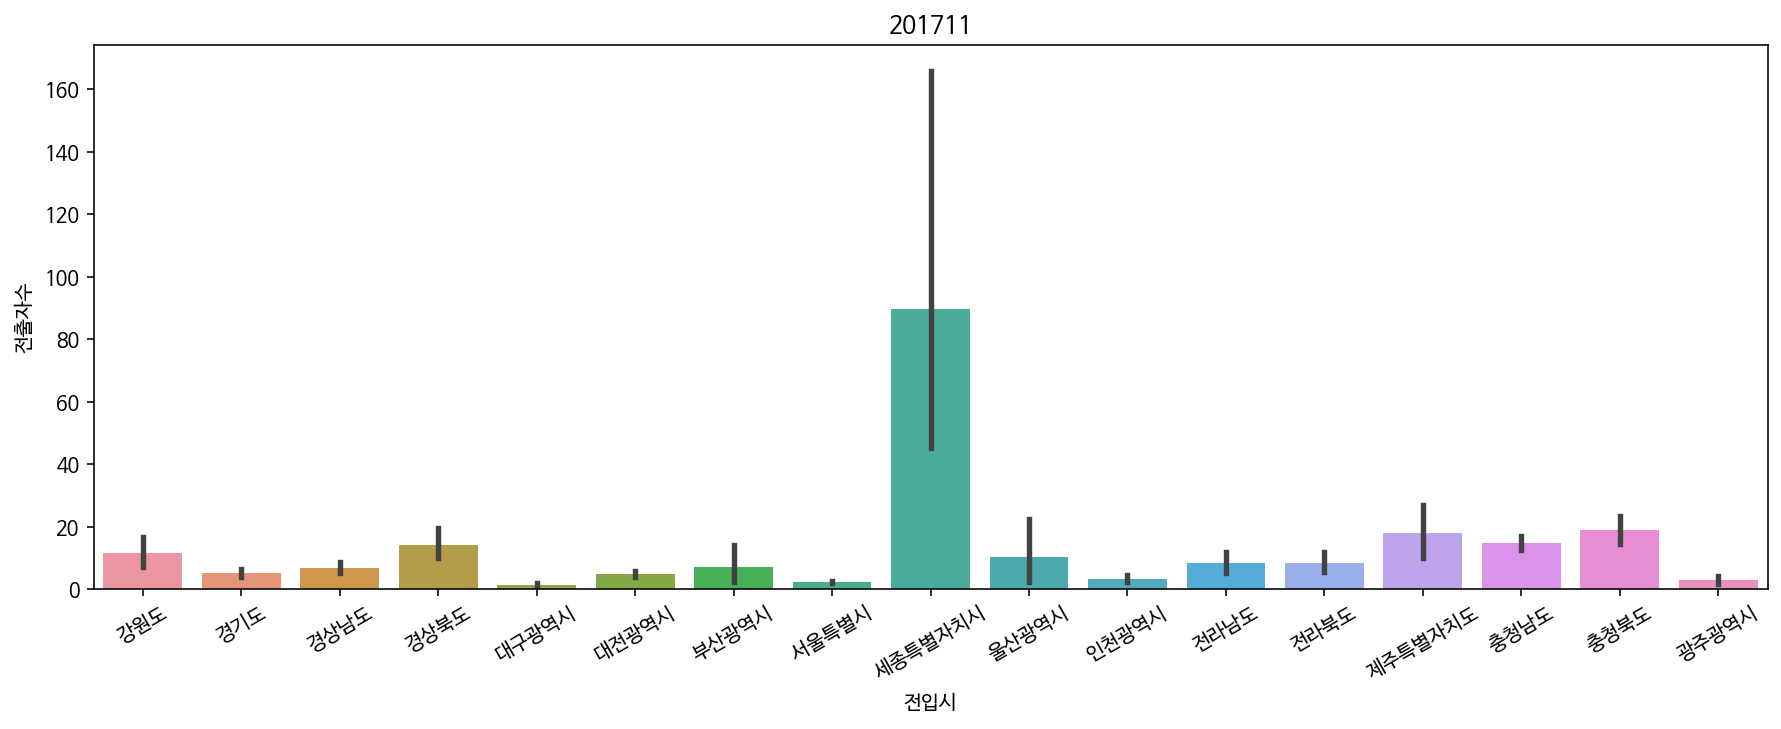

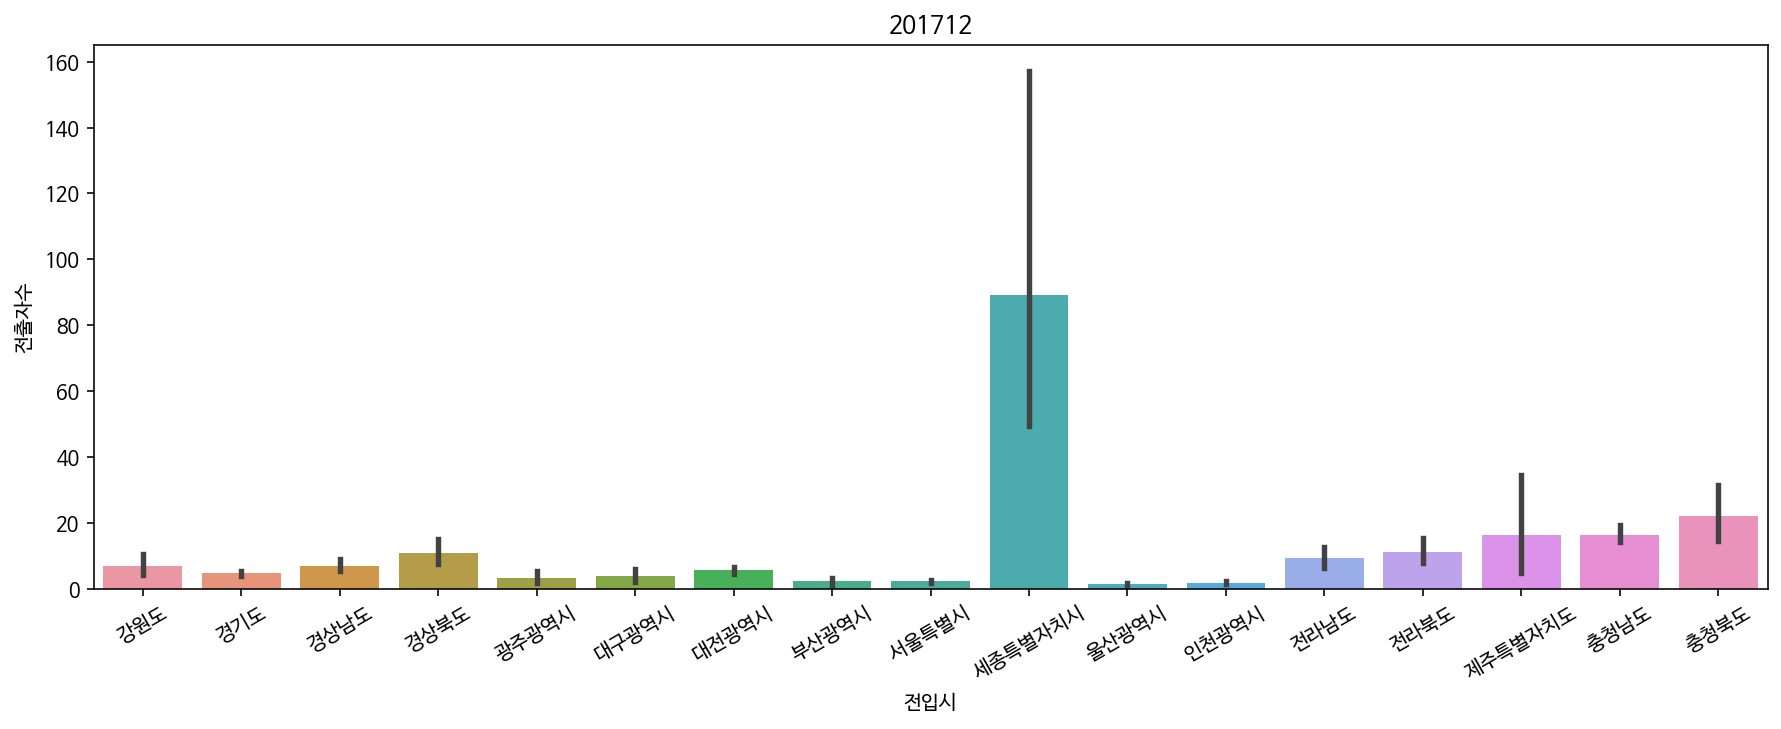

In [ ]:
a = 201701

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=out_a['전입시'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2018년도 전입자 추이

데이터 프레임 초기화 위해 다시 불러오기

In [ ]:
df_out = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/21.세종시_전출자수.csv', encoding='utf-8')
df_out

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동
0      201701     3    조치원읍   강원도      원주시    단계동
1      201701     9    조치원읍   강원도      춘천시   신사우동
2      201701    13    조치원읍   강원도      홍천군     서면
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동
...       ...   ...     ...   ...      ...    ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍
80988  202101     2     다정동  충청북도   청주시상당구   용암1동
80989  202101    35     다정동  충청북도   청주시청원구    오창읍
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍

[80992 rows x 6 columns]

In [ ]:
a = 201801

for i in range(1, 13):
    df_out_a = df_out['년월']==a
    df_out[a] = df_out_a
    a += 1
print(df_out)

           년월  전출자수 세종전출행정동   전입시  ... 201809 201810  201811  201812
0      201701     3    조치원읍   강원도  ...  False  False   False   False
1      201701     9    조치원읍   강원도  ...  False  False   False   False
2      201701    13    조치원읍   강원도  ...  False  False   False   False
3      201701     3    조치원읍   경기도  ...  False  False   False   False
4      201701     1    조치원읍   경기도  ...  False  False   False   False
...       ...   ...     ...   ...  ...    ...    ...     ...     ...
80987  202101    22     다정동  충청북도  ...  False  False   False   False
80988  202101     2     다정동  충청북도  ...  False  False   False   False
80989  202101    35     다정동  충청북도  ...  False  False   False   False
80990  202101    13     다정동  충청북도  ...  False  False   False   False
80991  202101    84     다정동  충청북도  ...  False  False   False   False

[80992 rows x 18 columns]


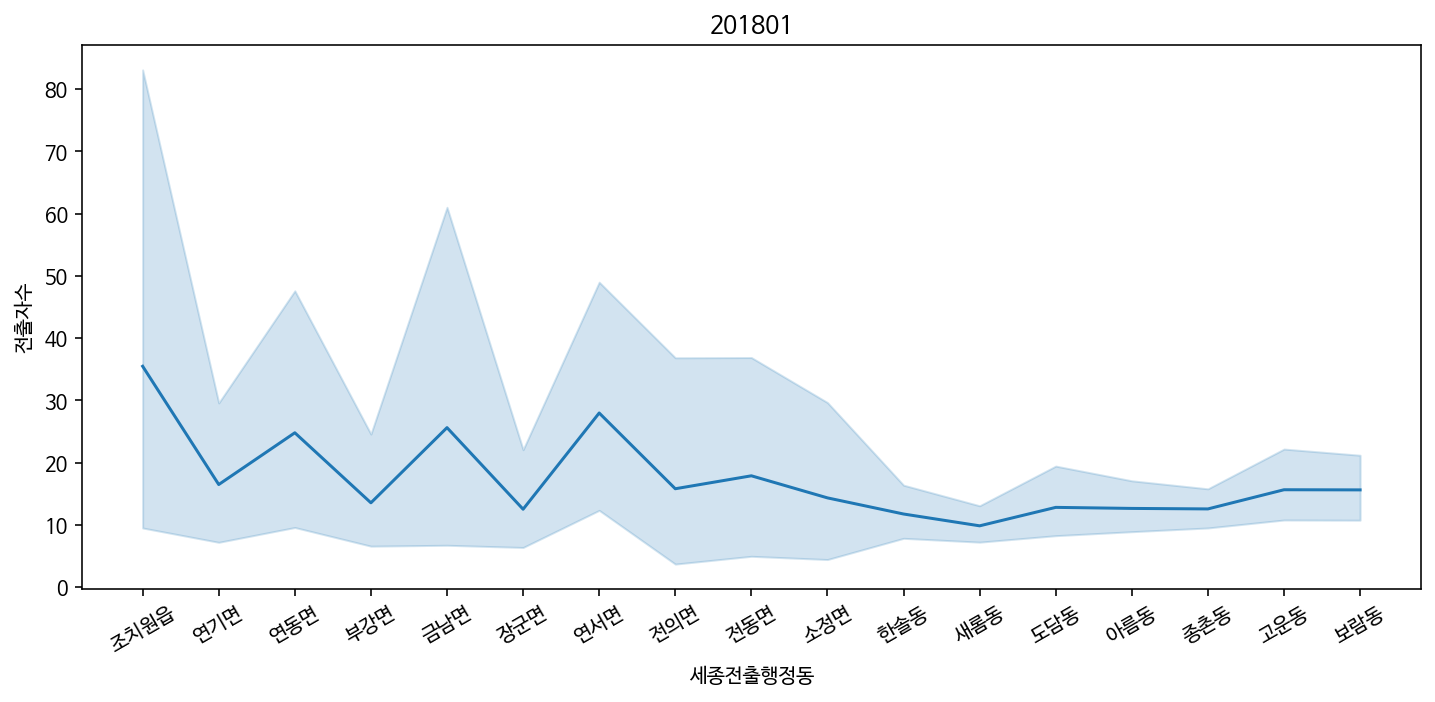

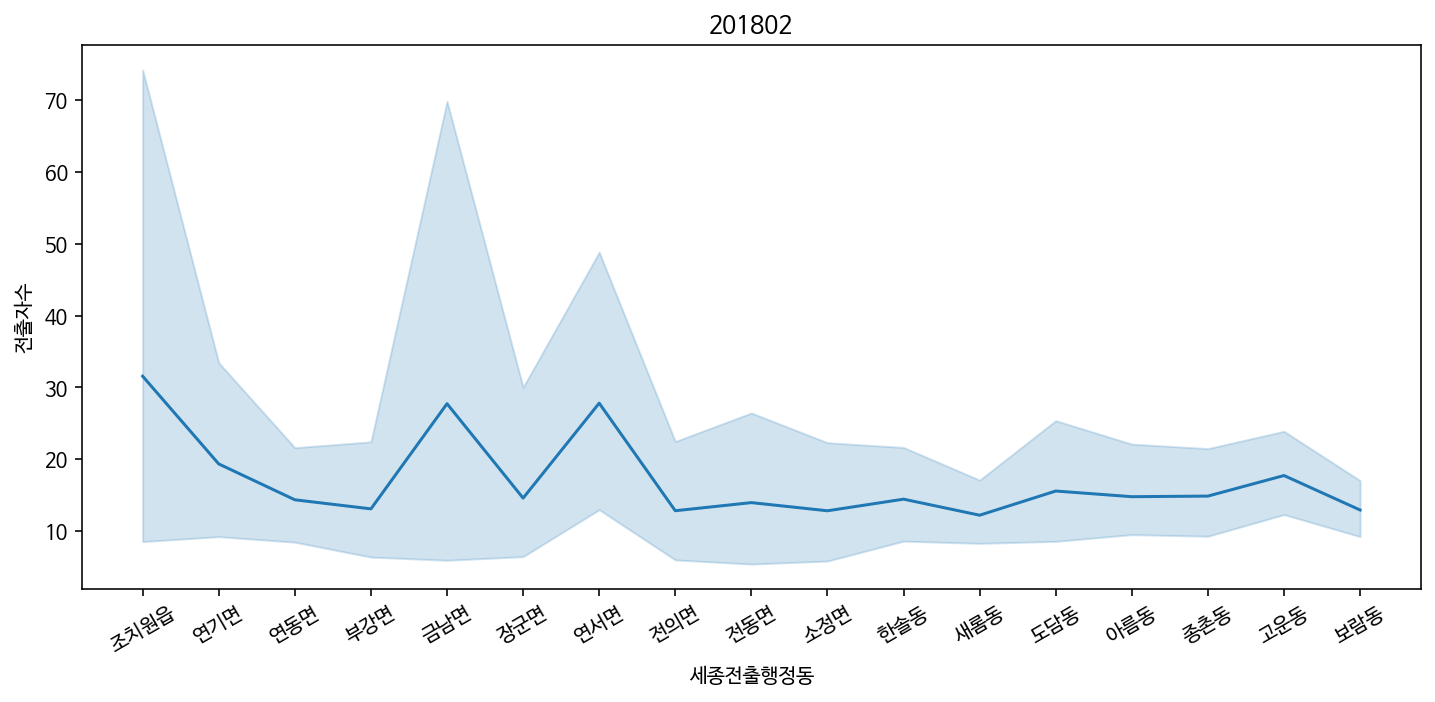

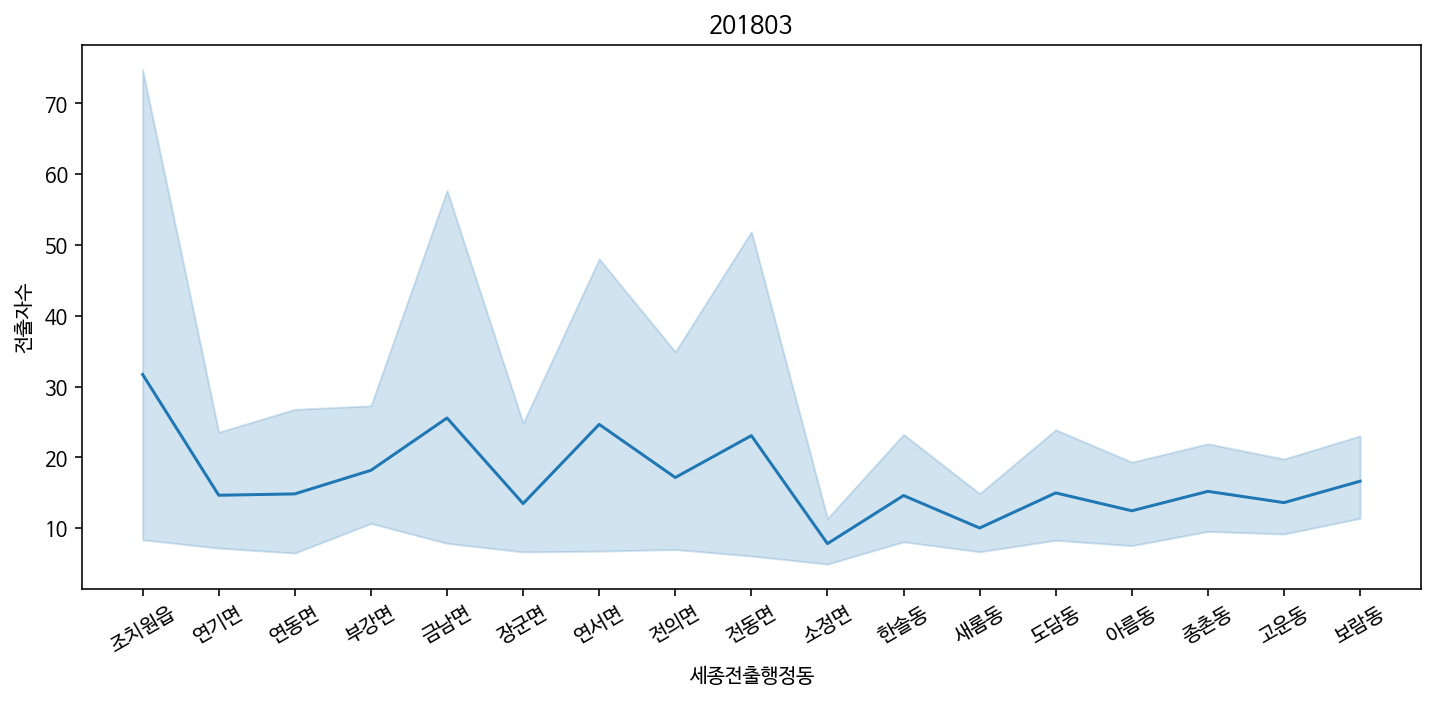

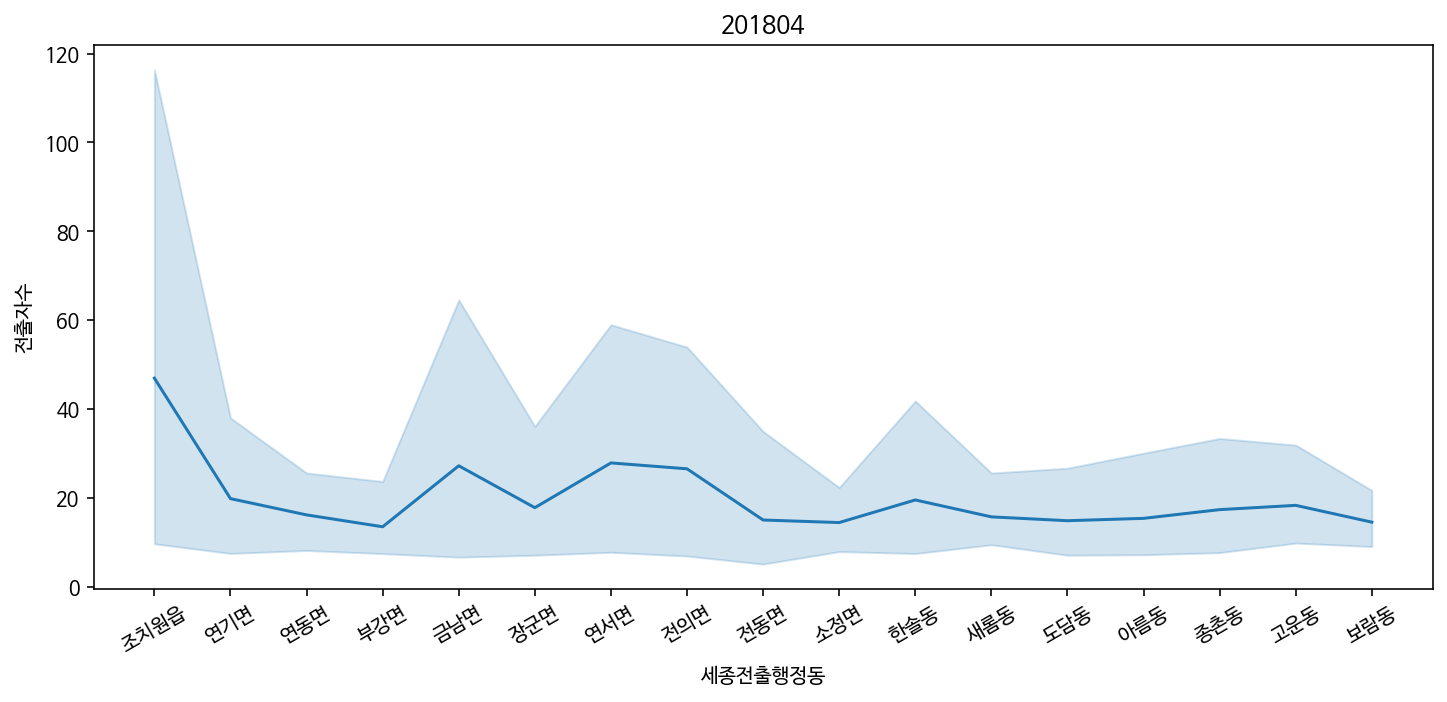

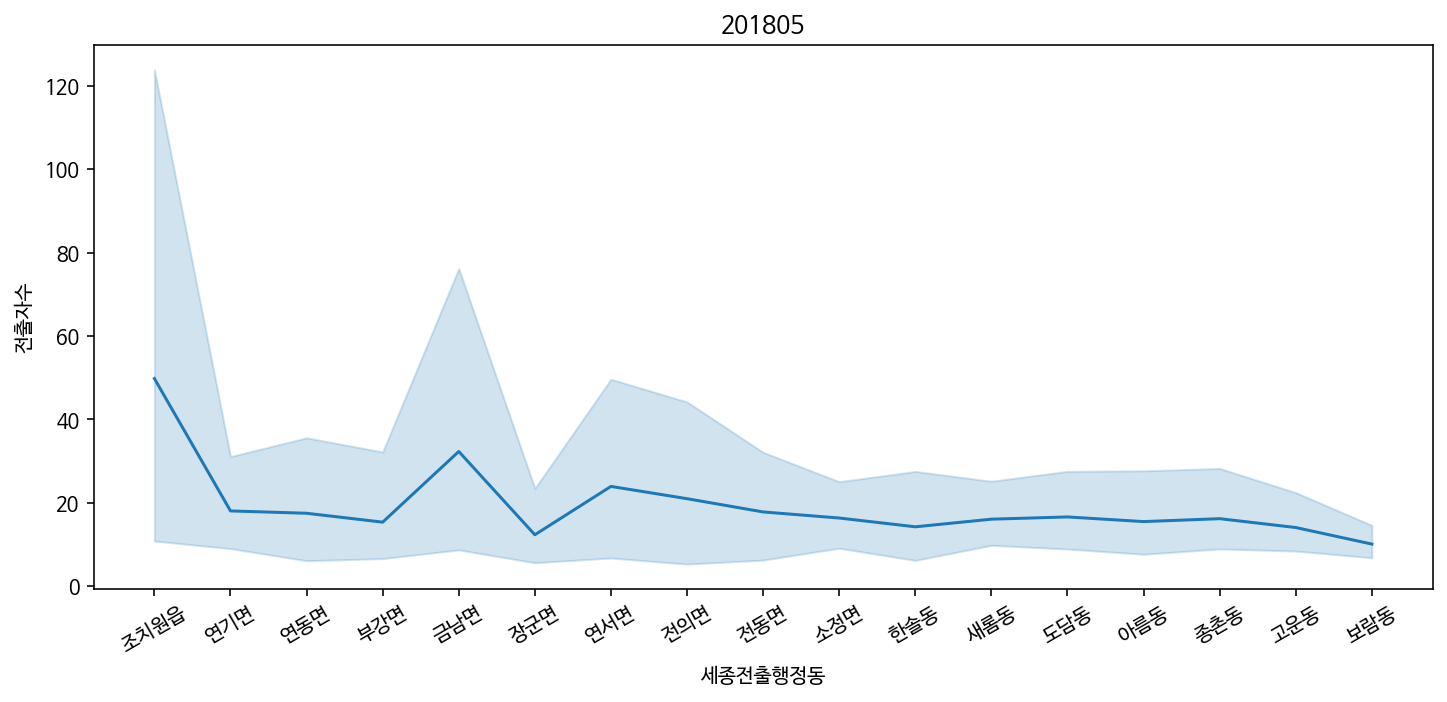

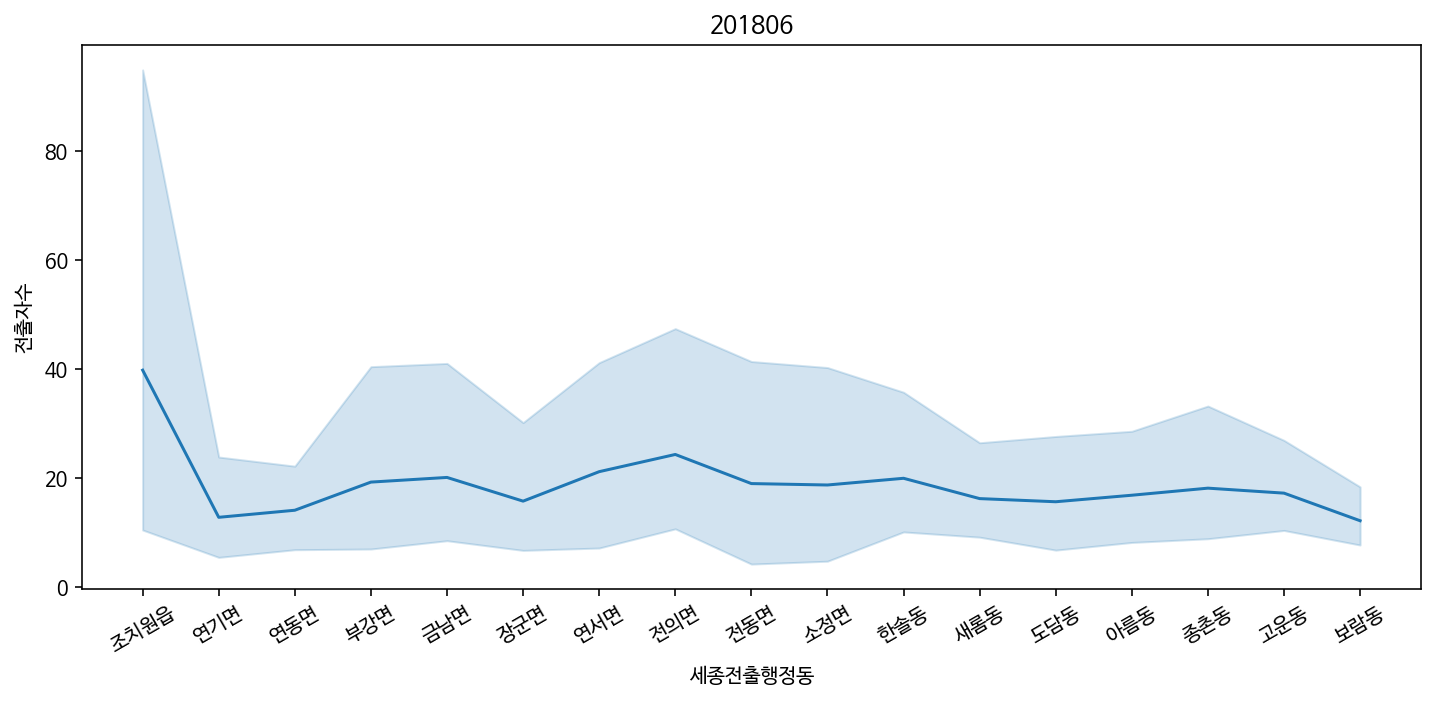

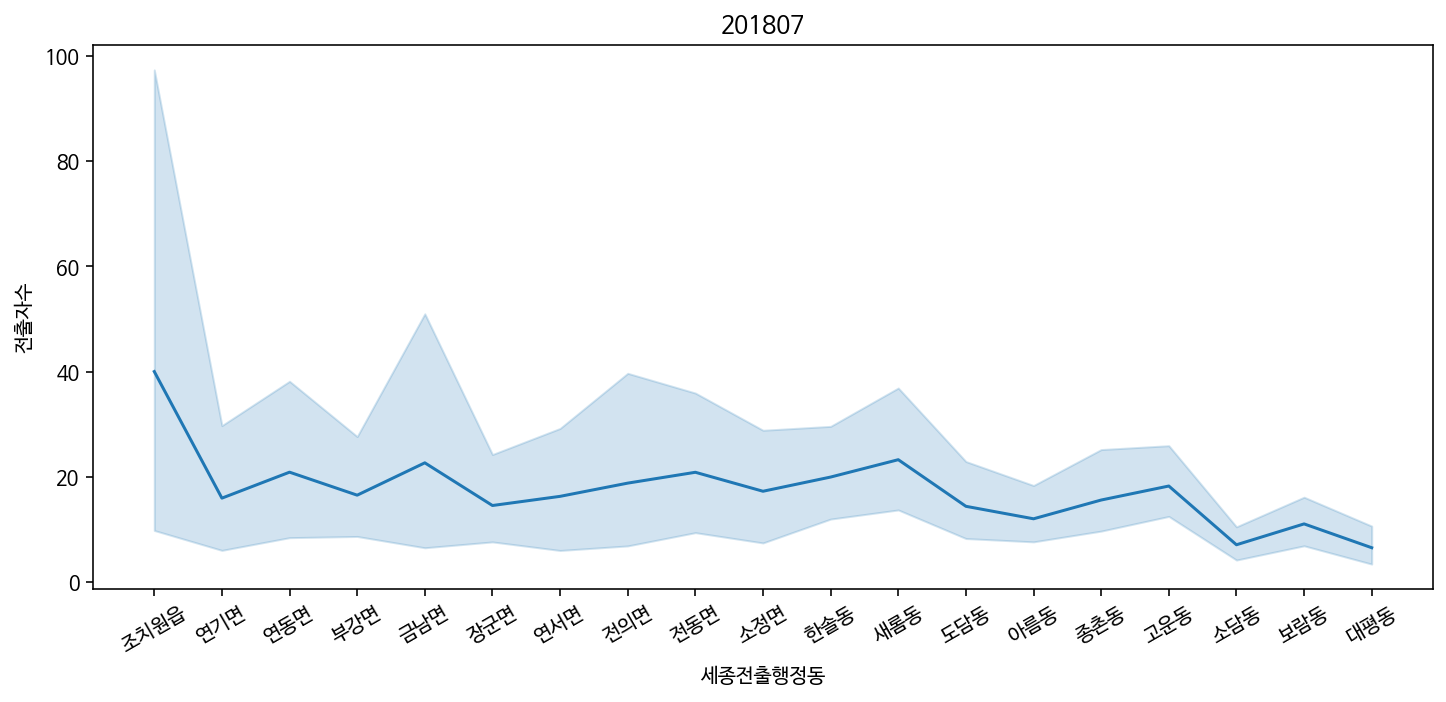

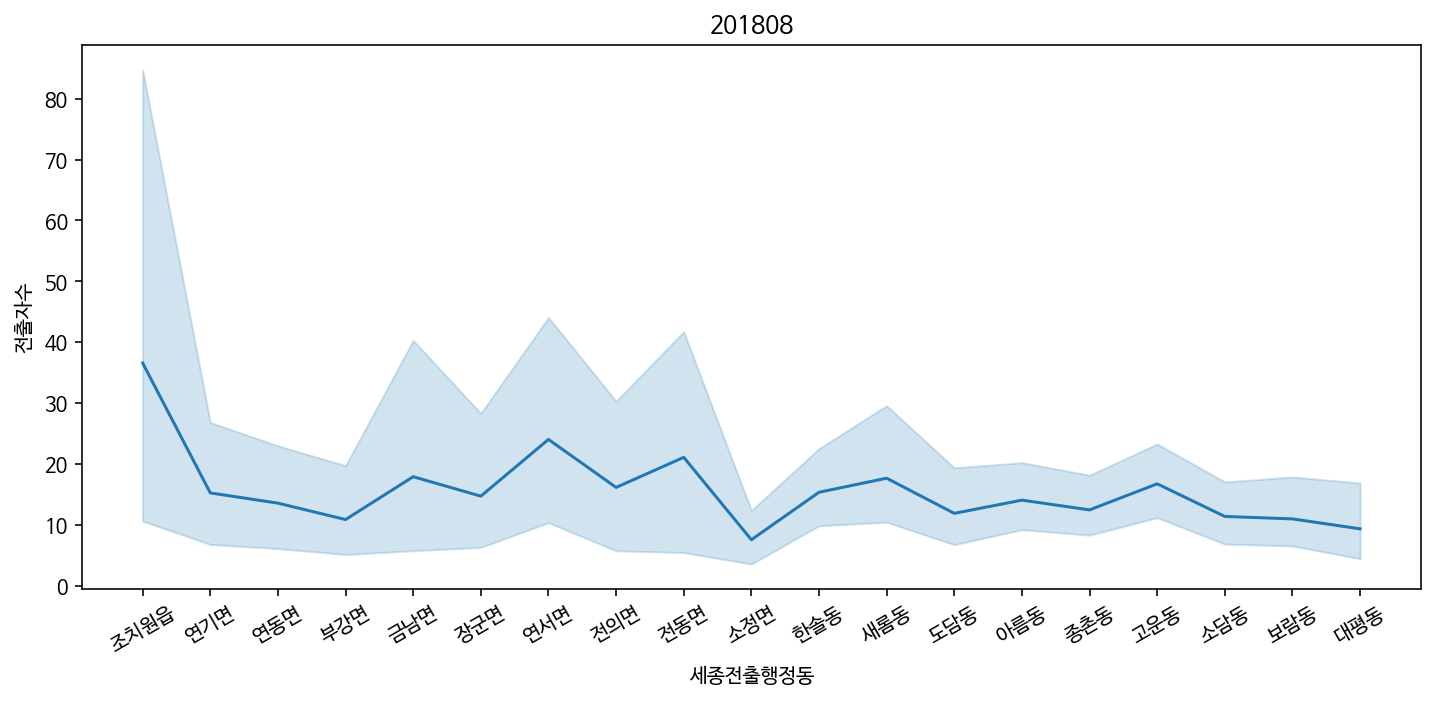

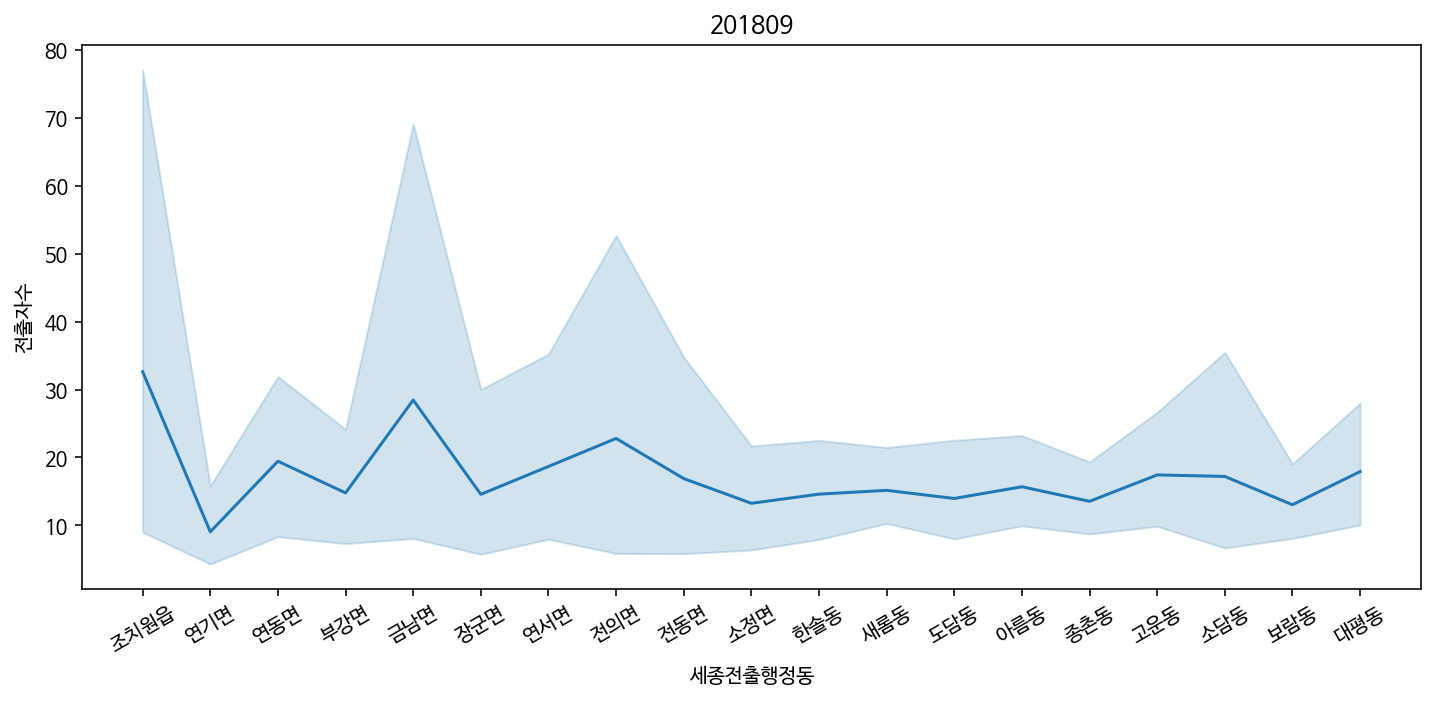

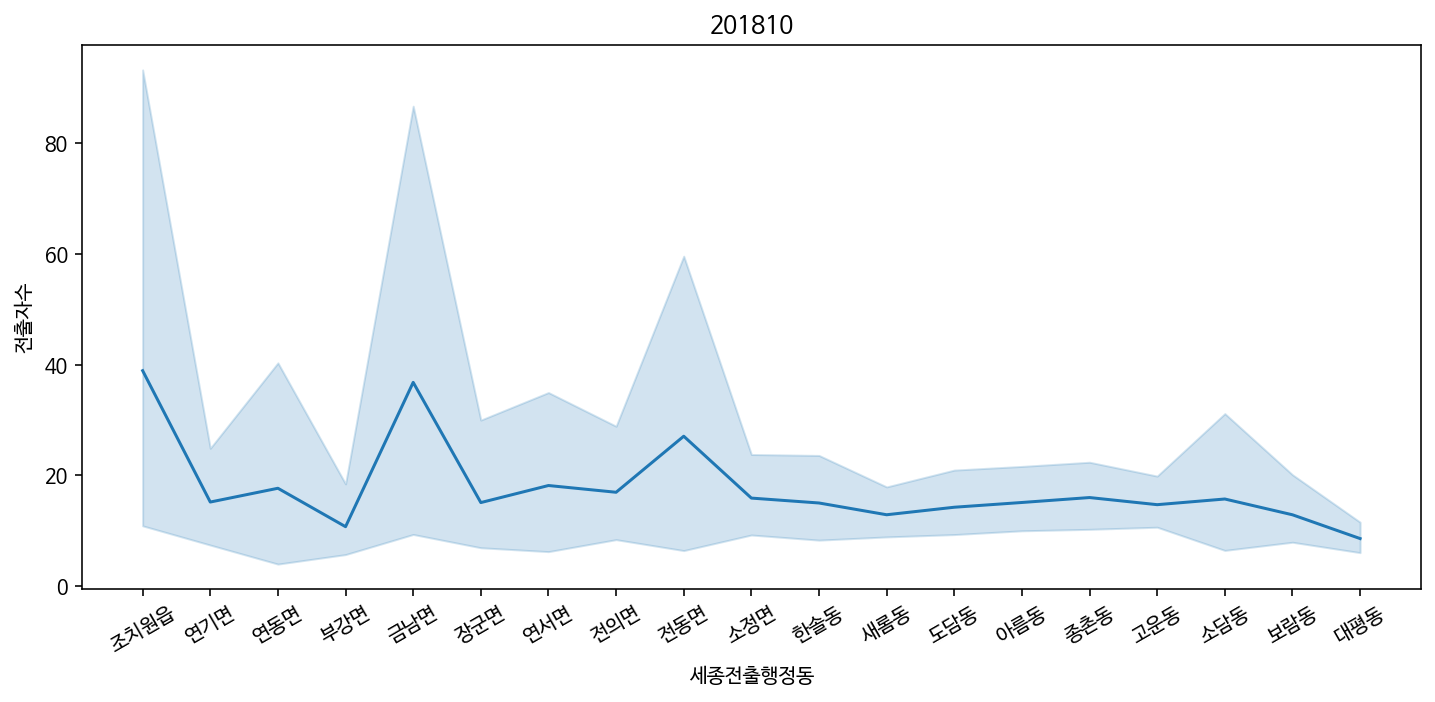

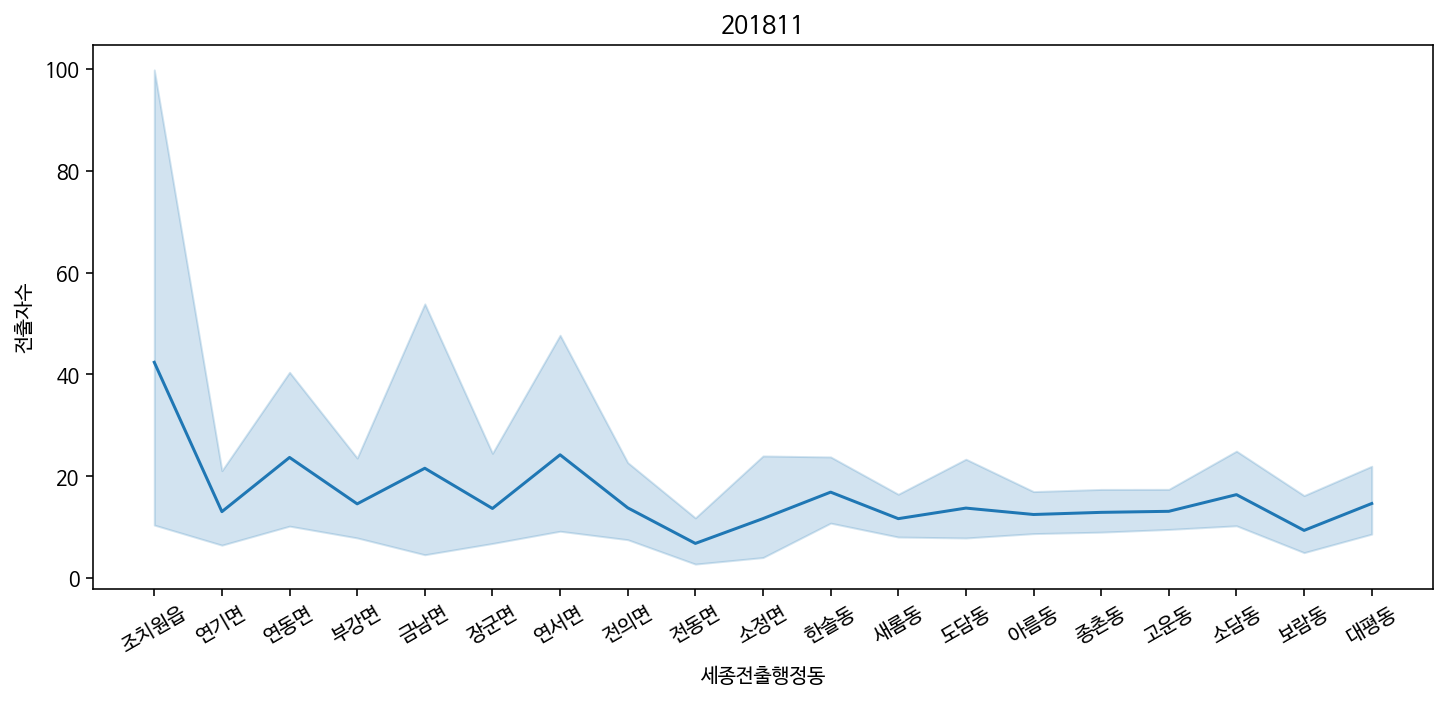

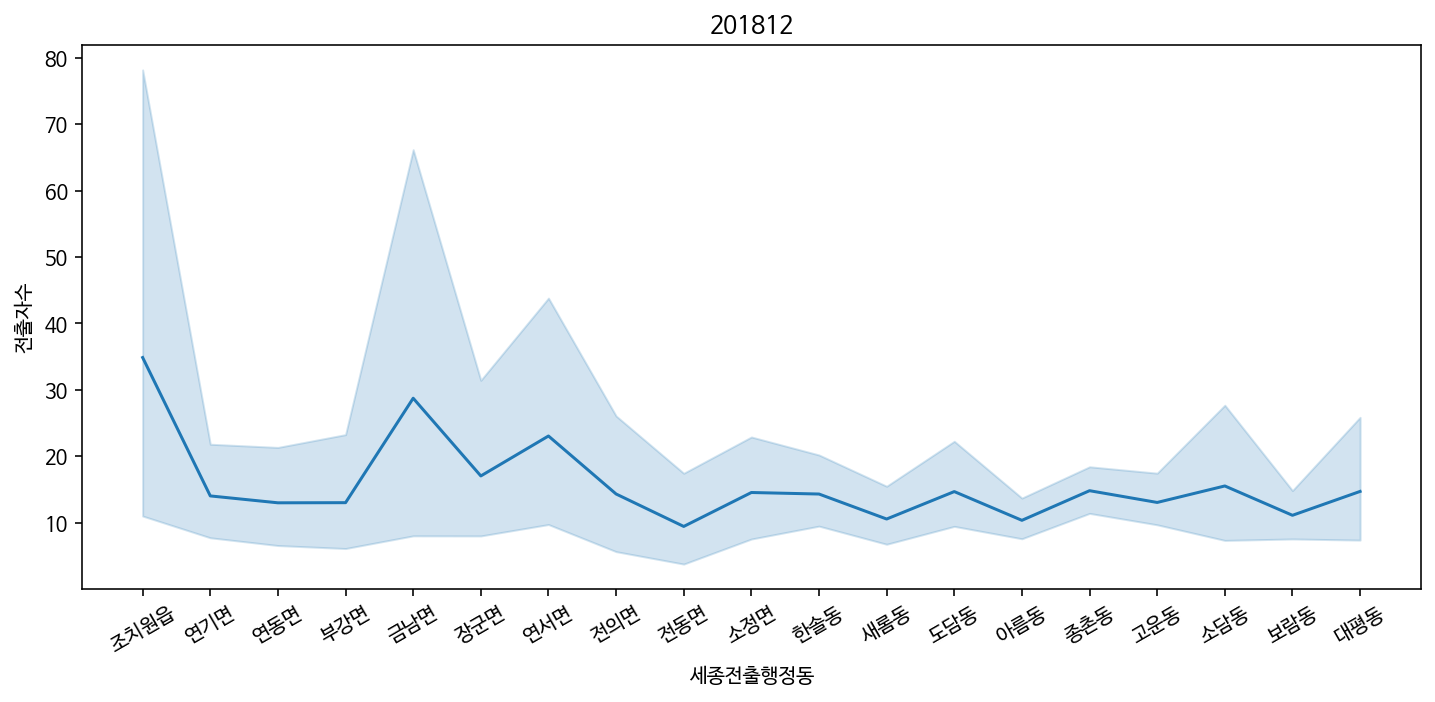

In [ ]:
a = 201801

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=out_a['세종전출행정동'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

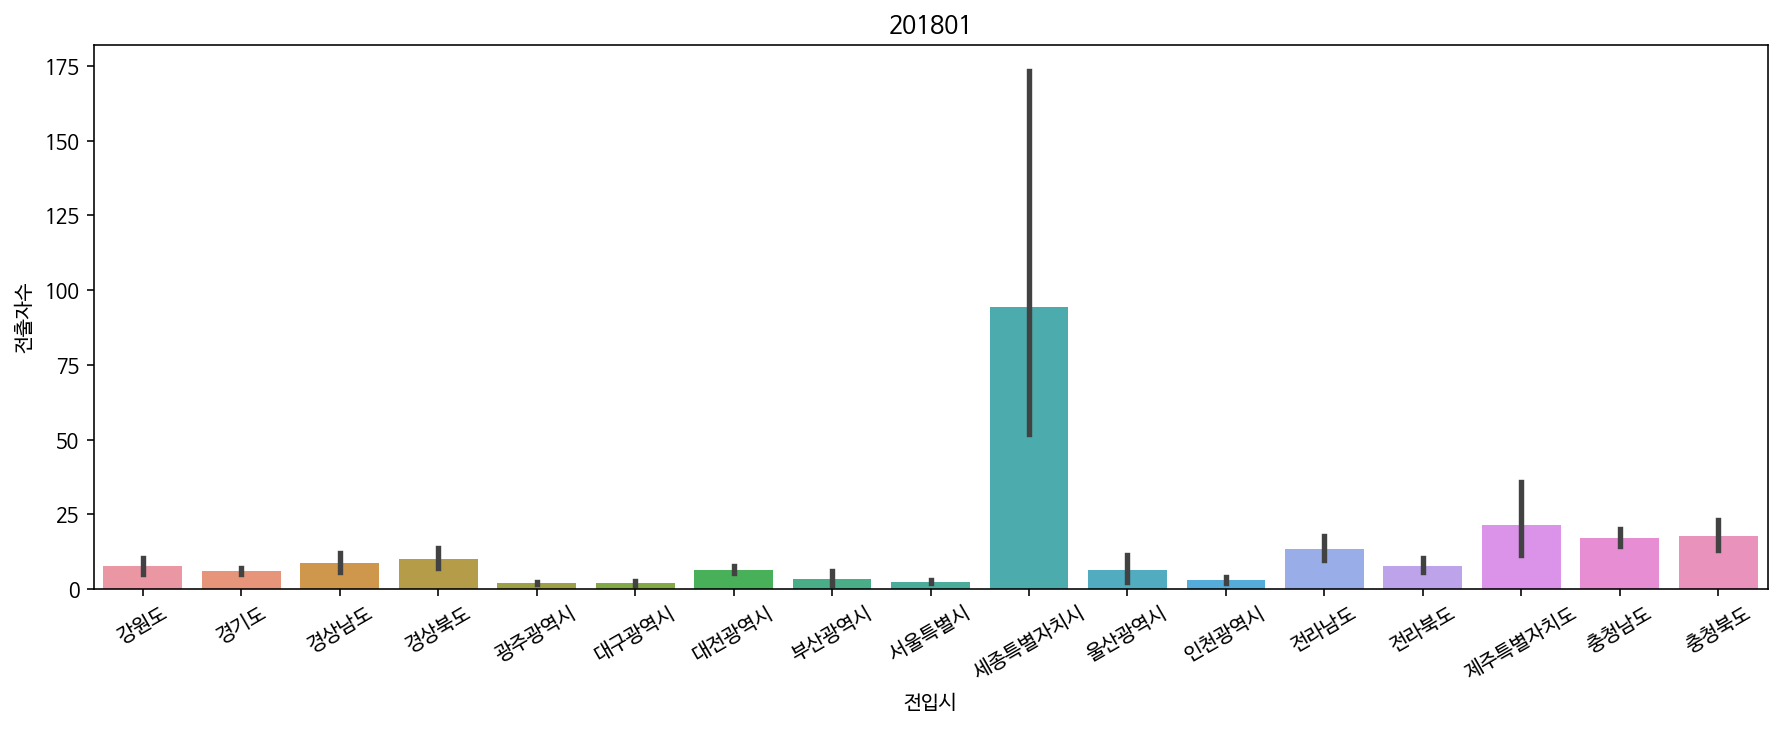

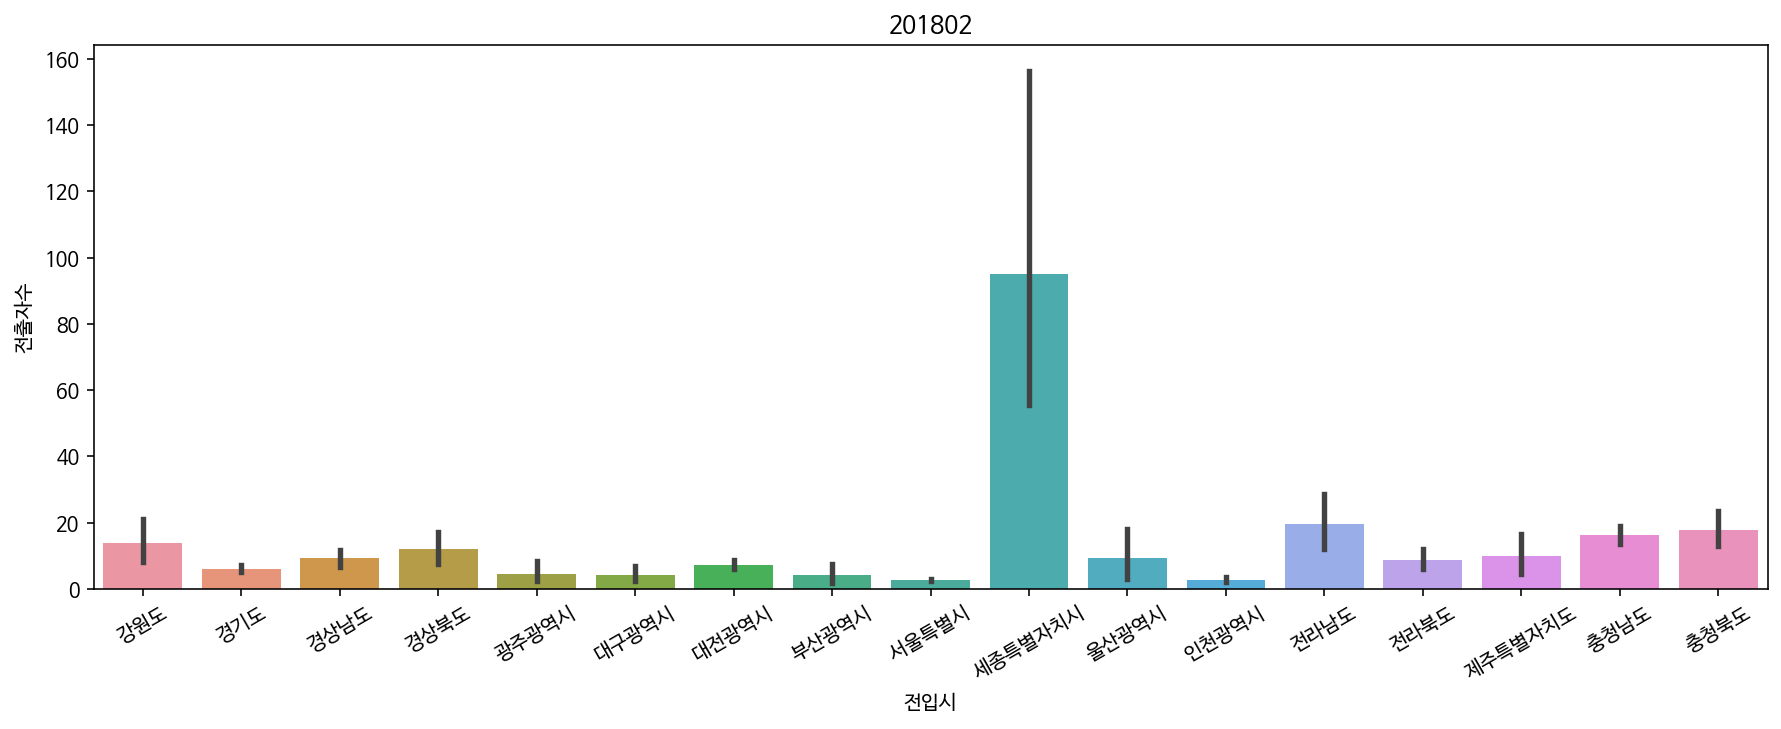

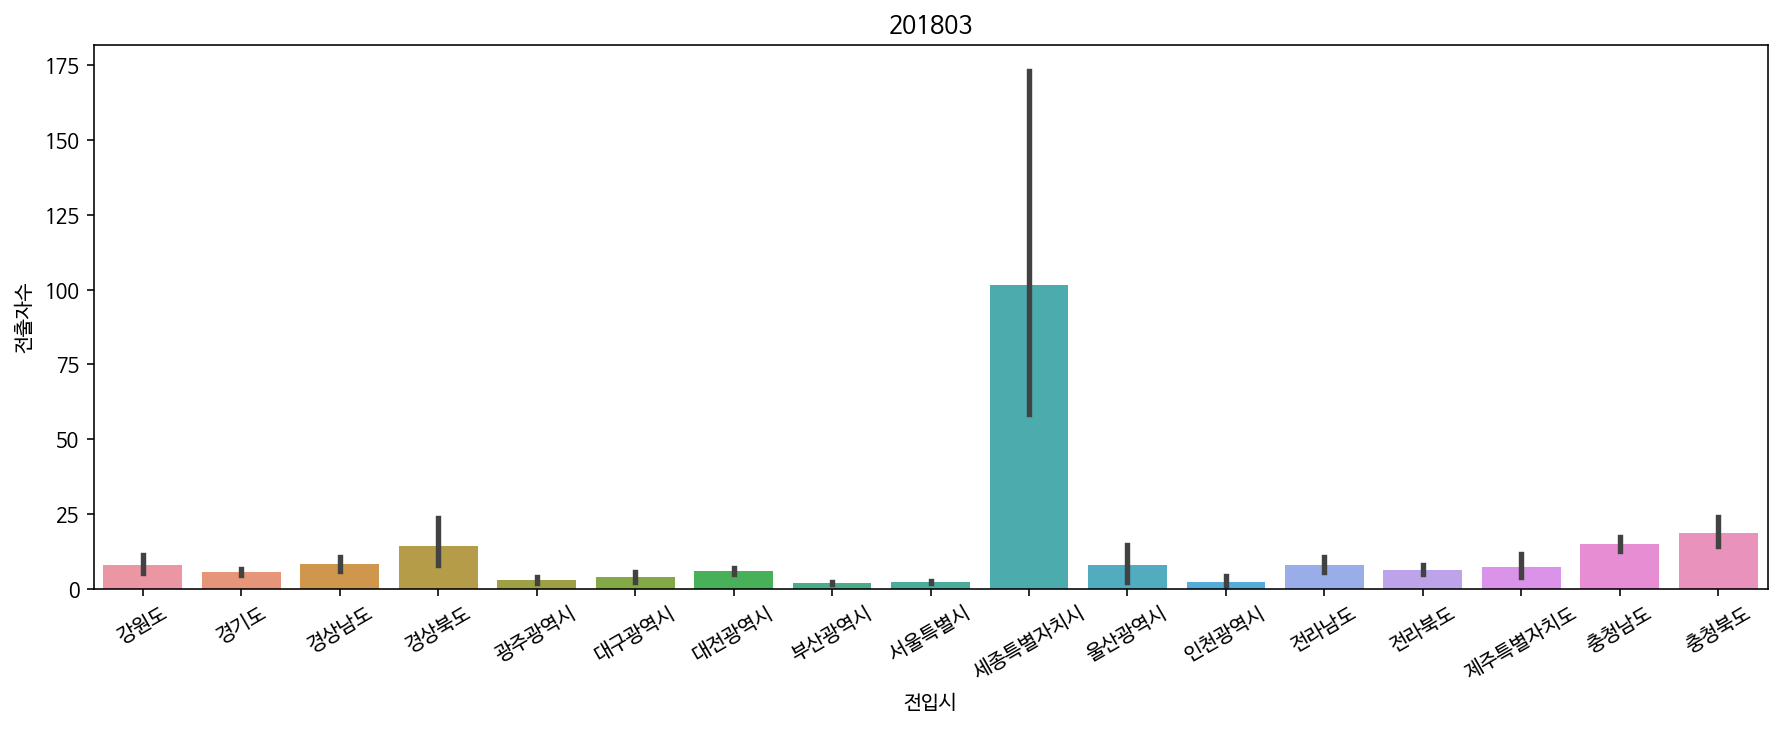

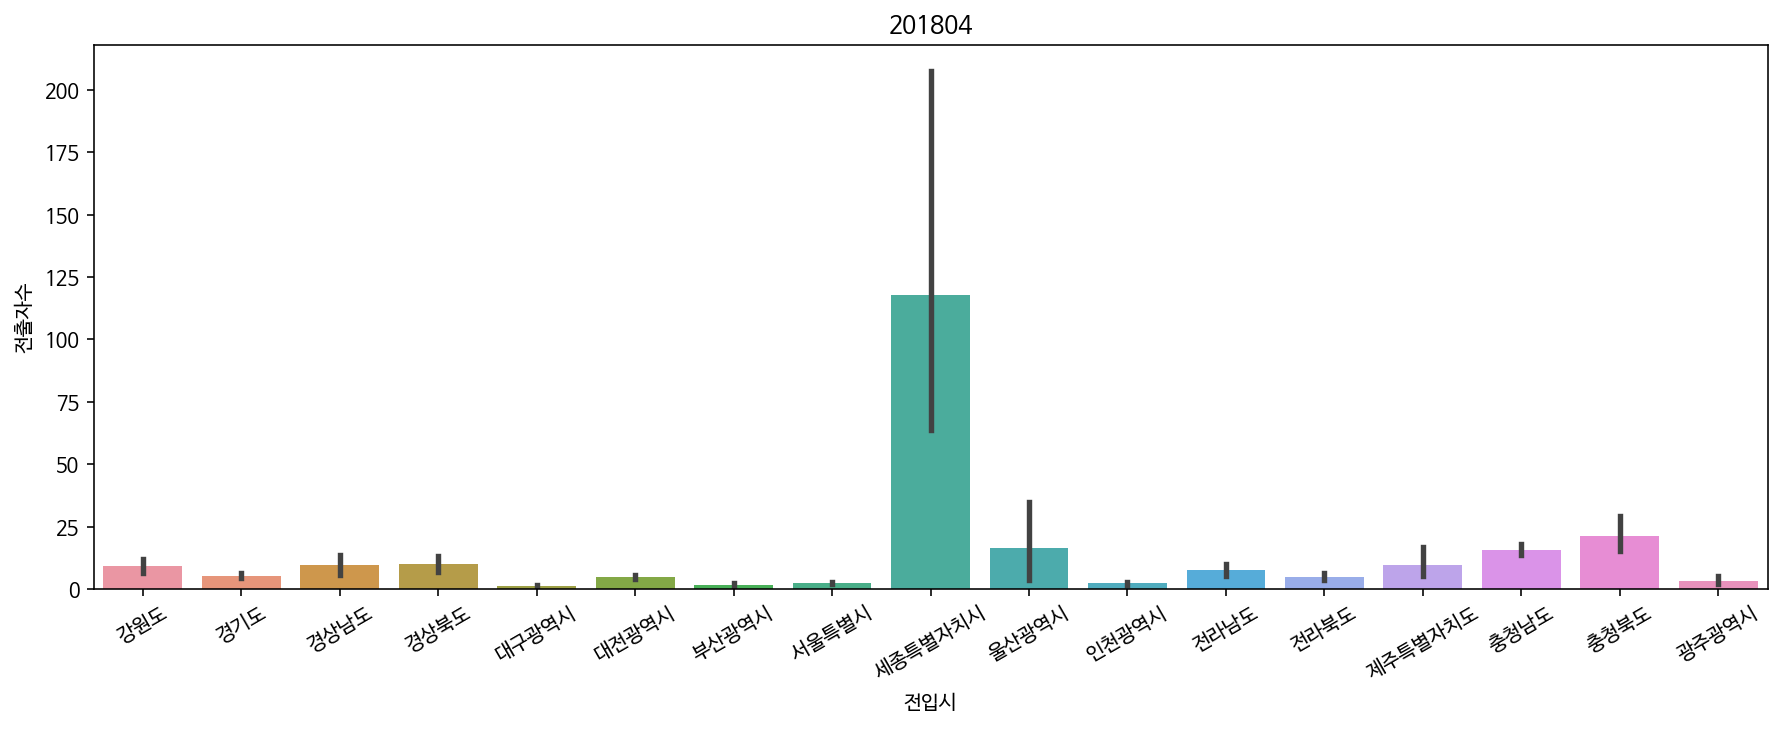

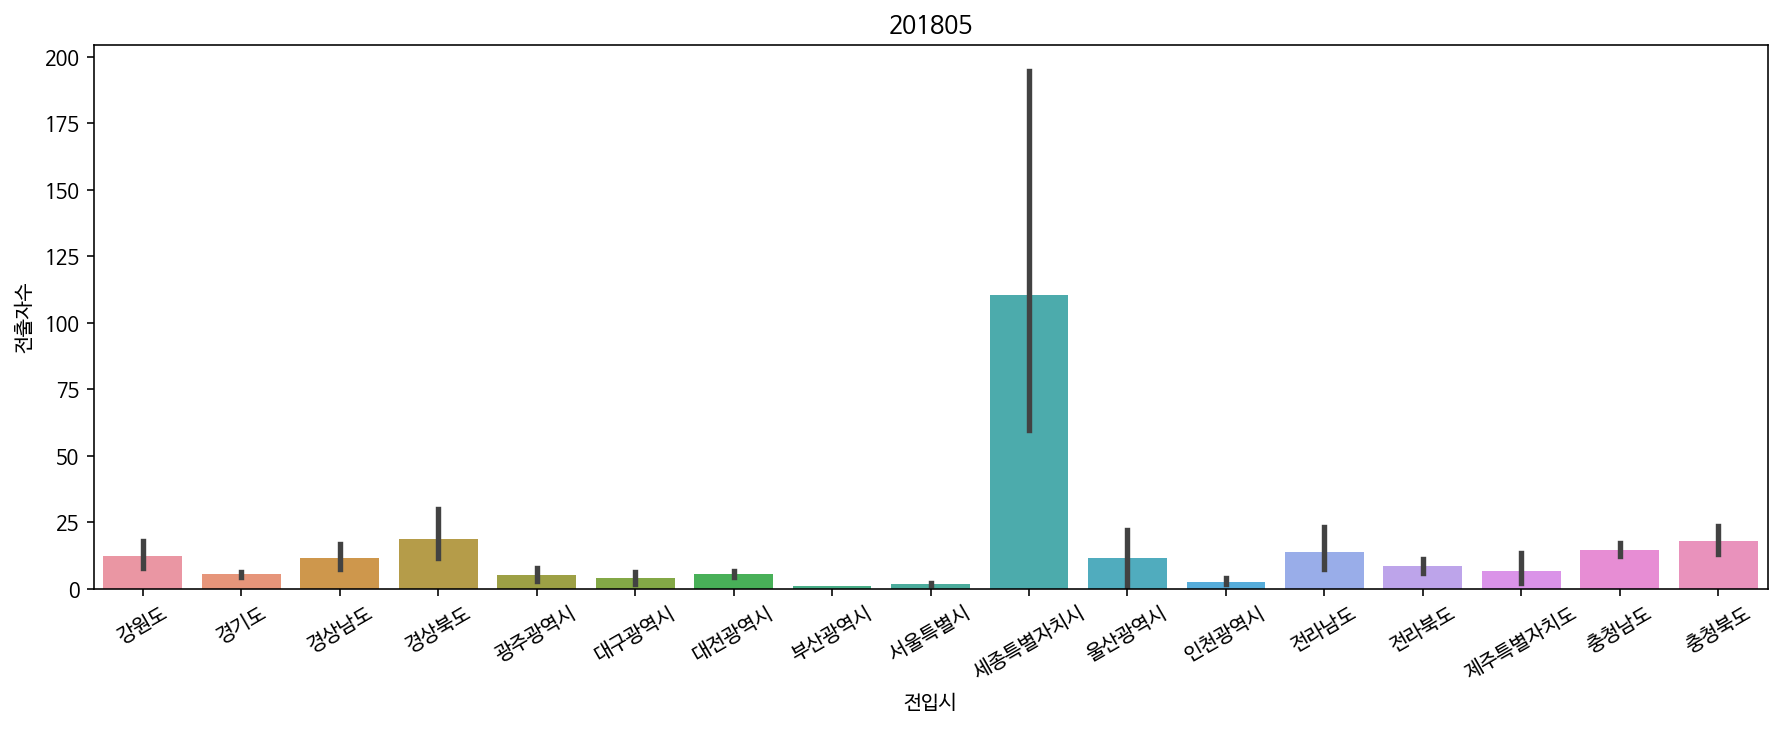

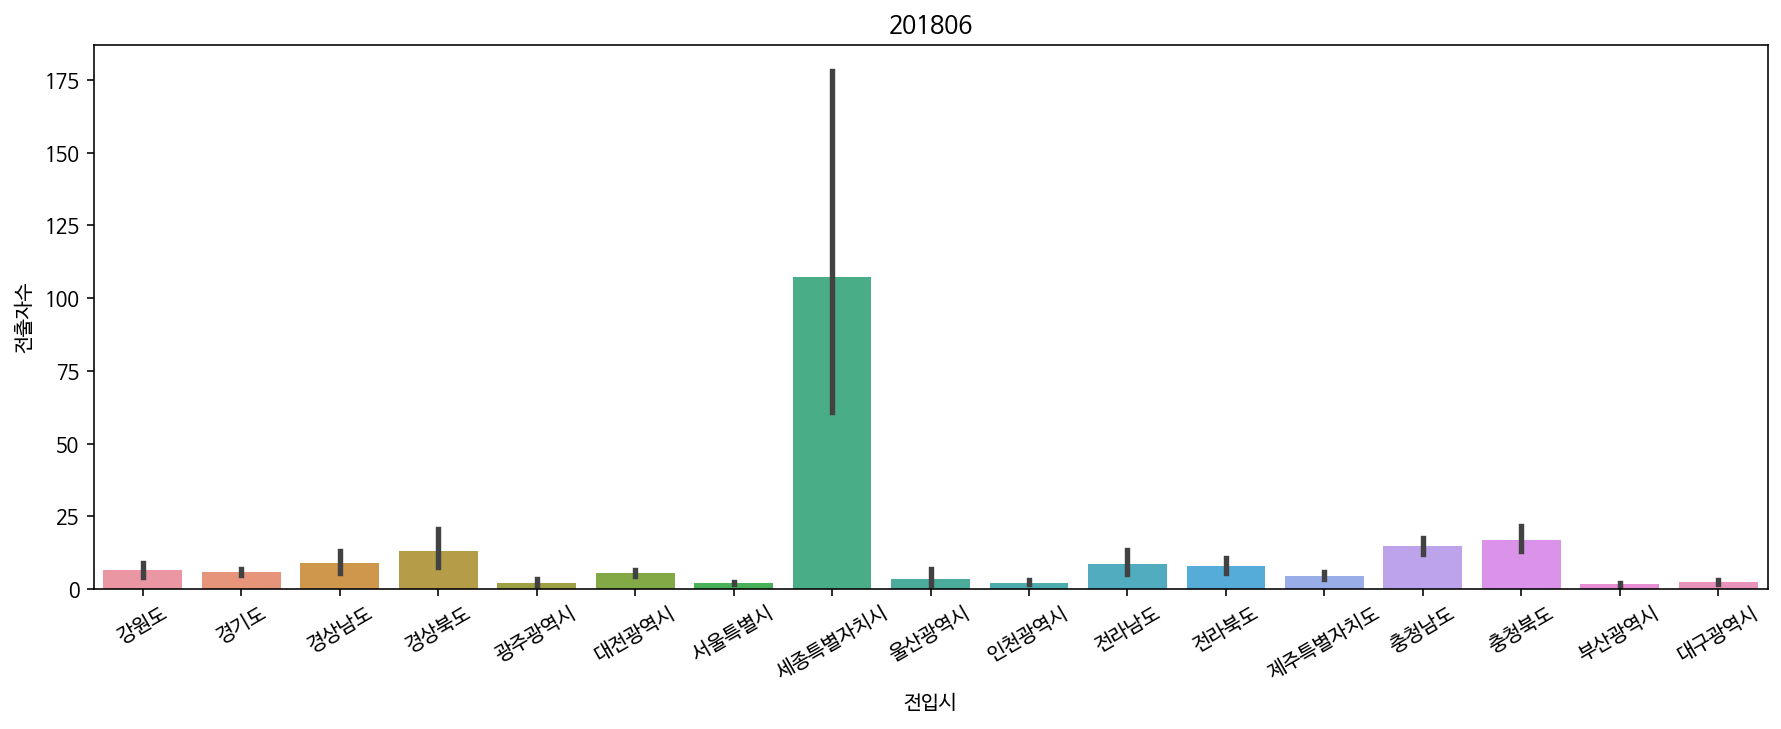

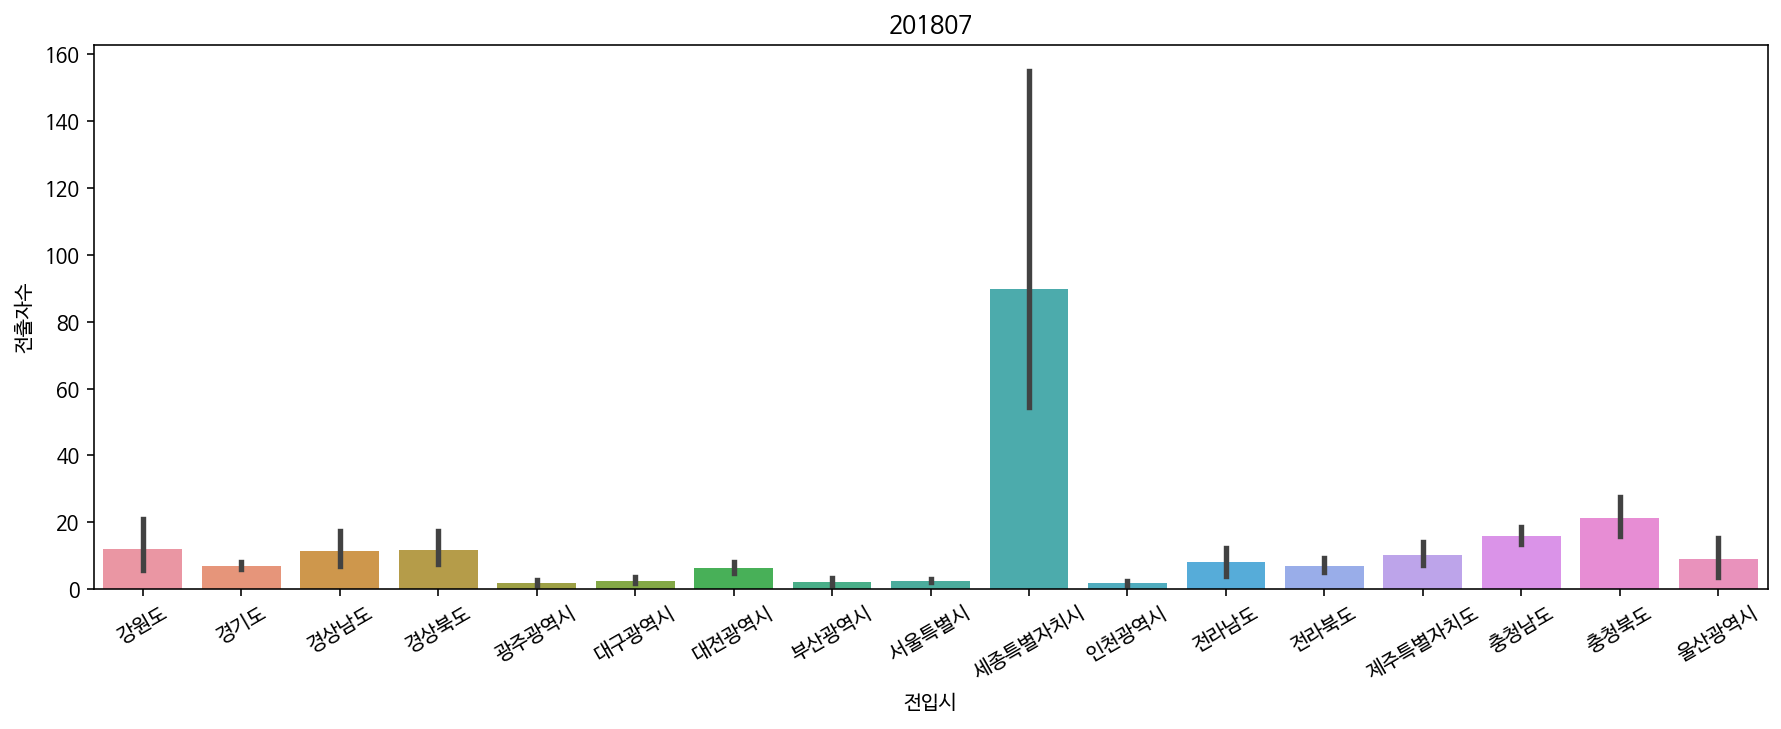

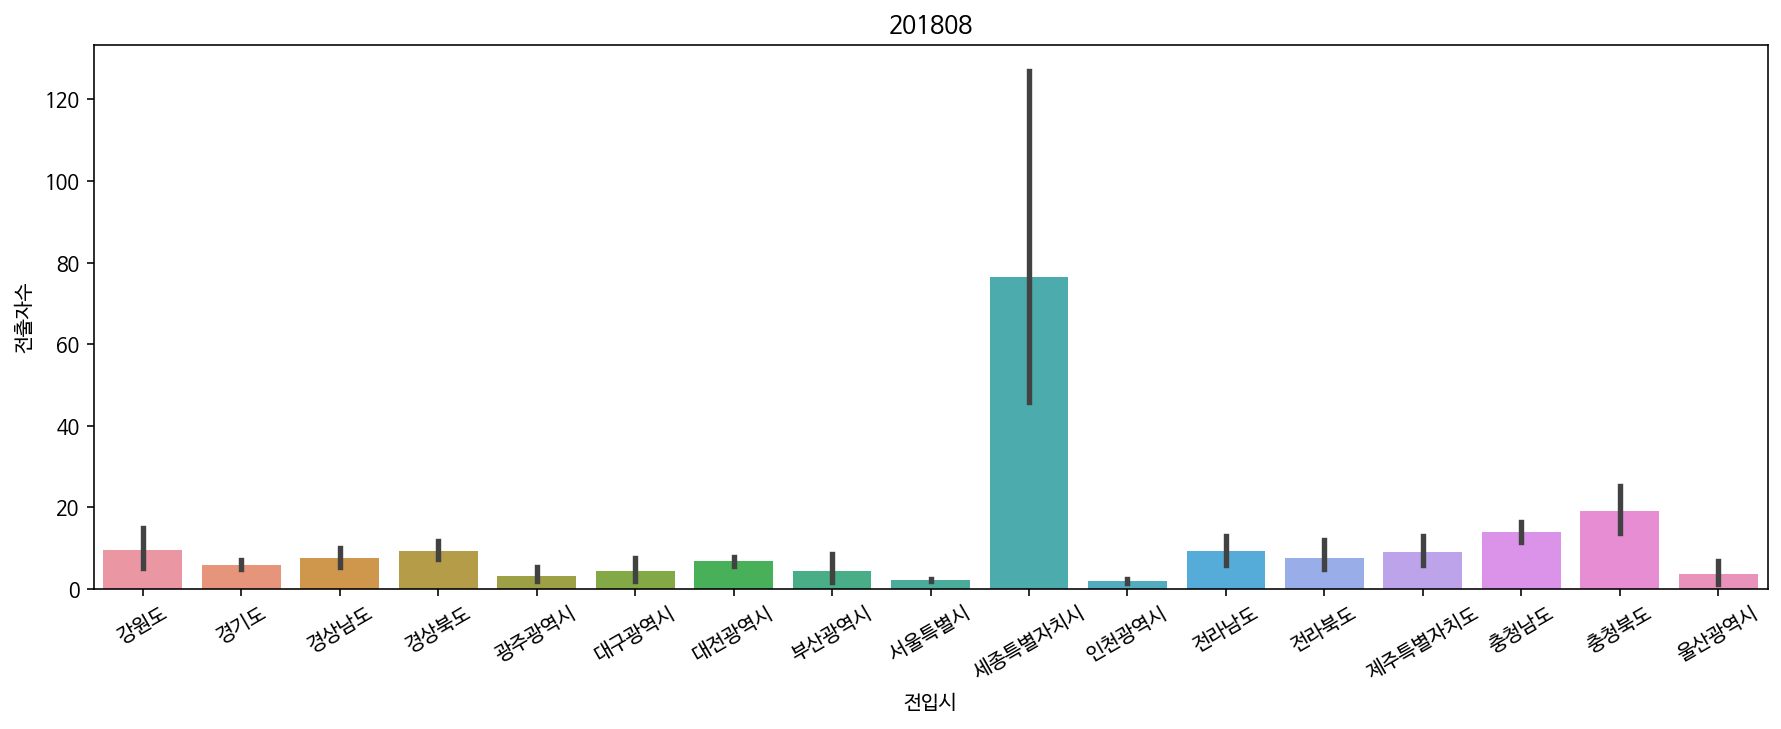

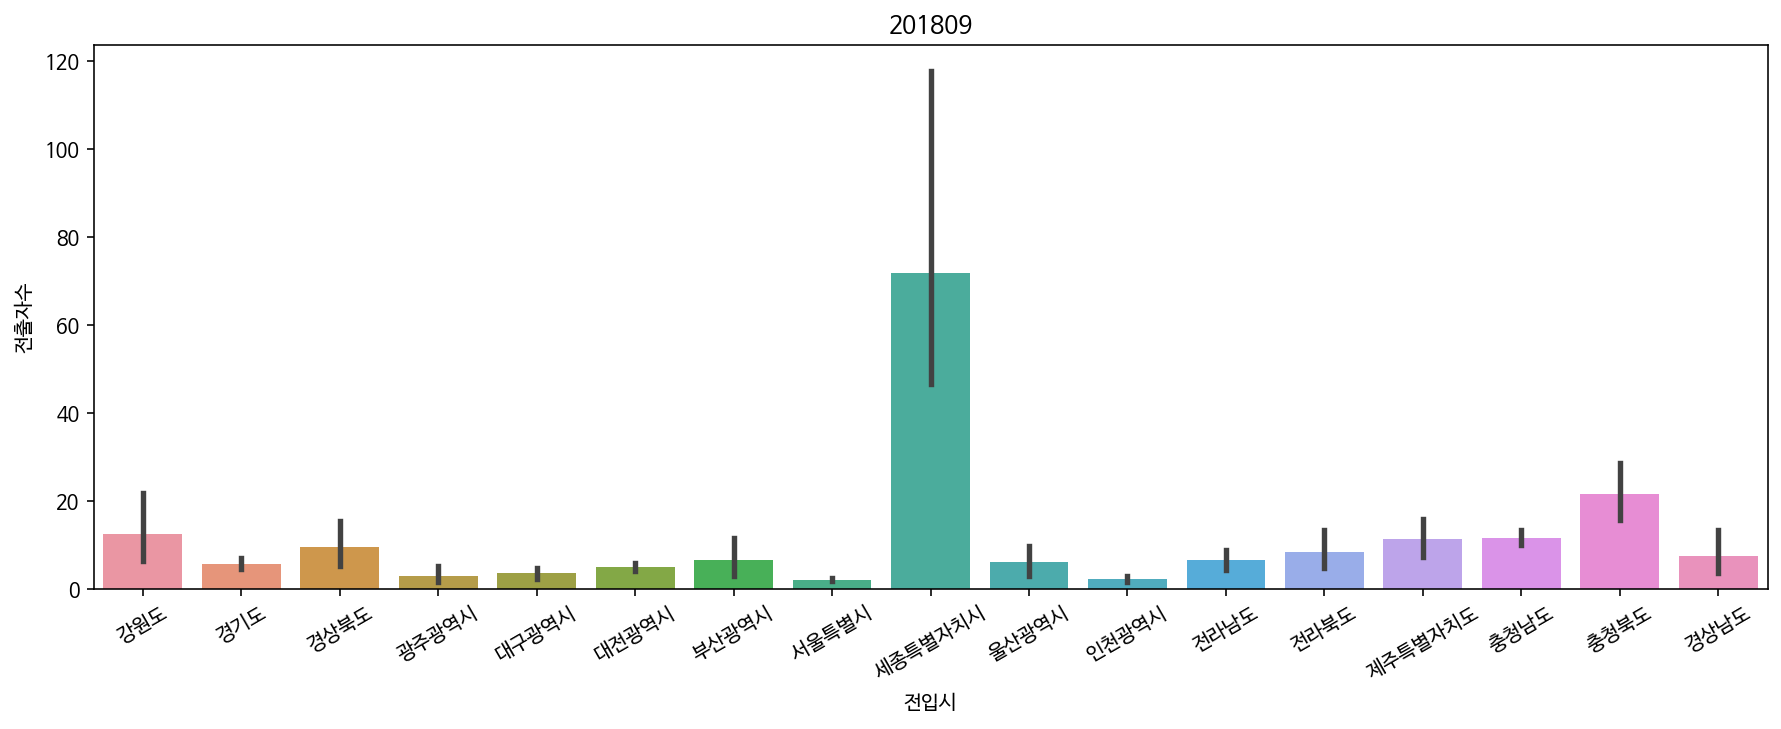

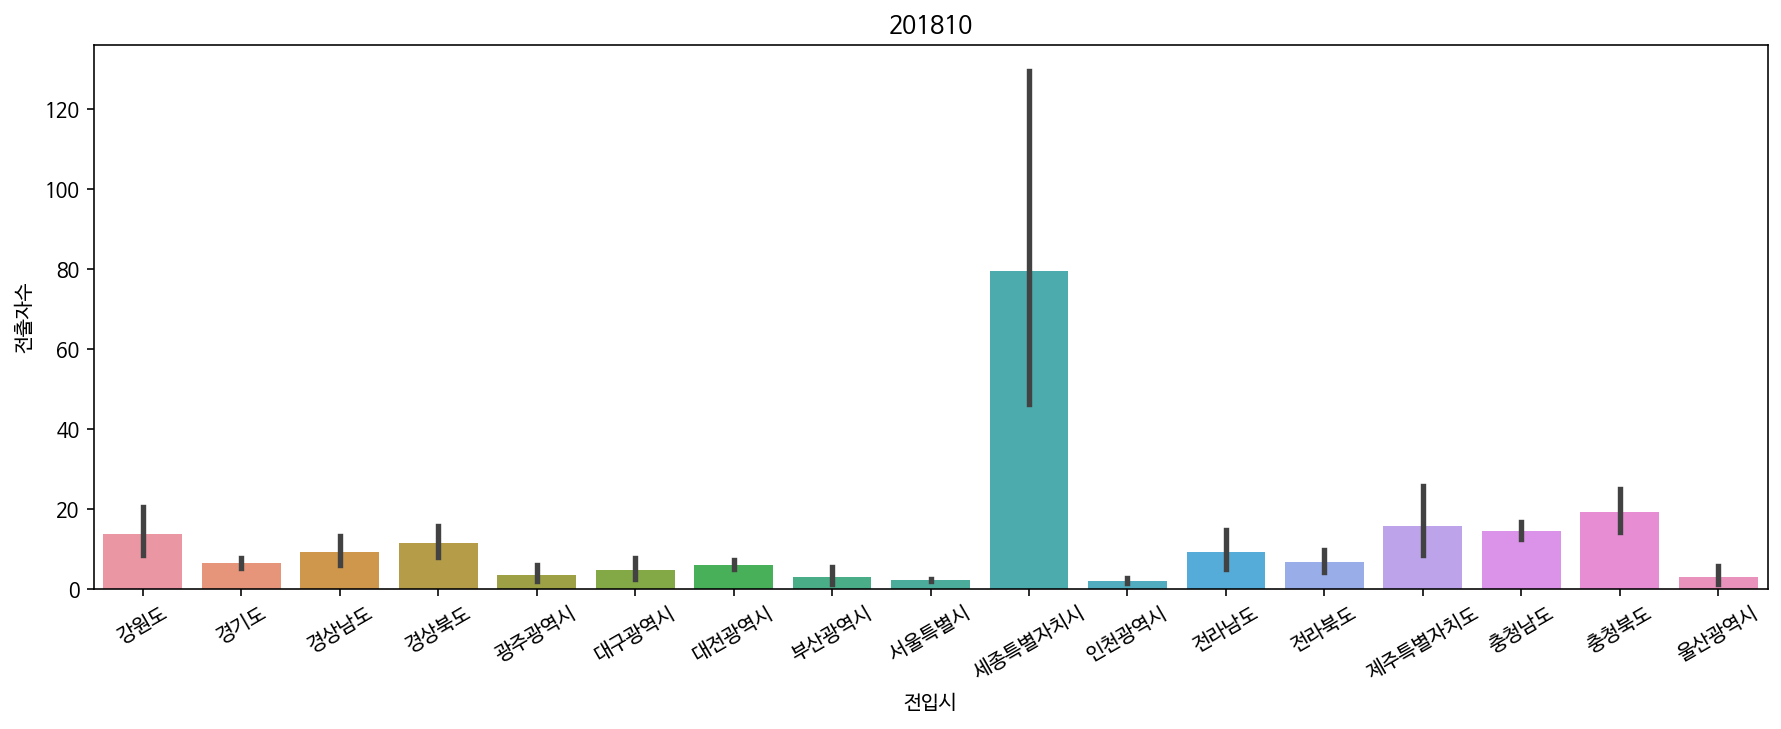

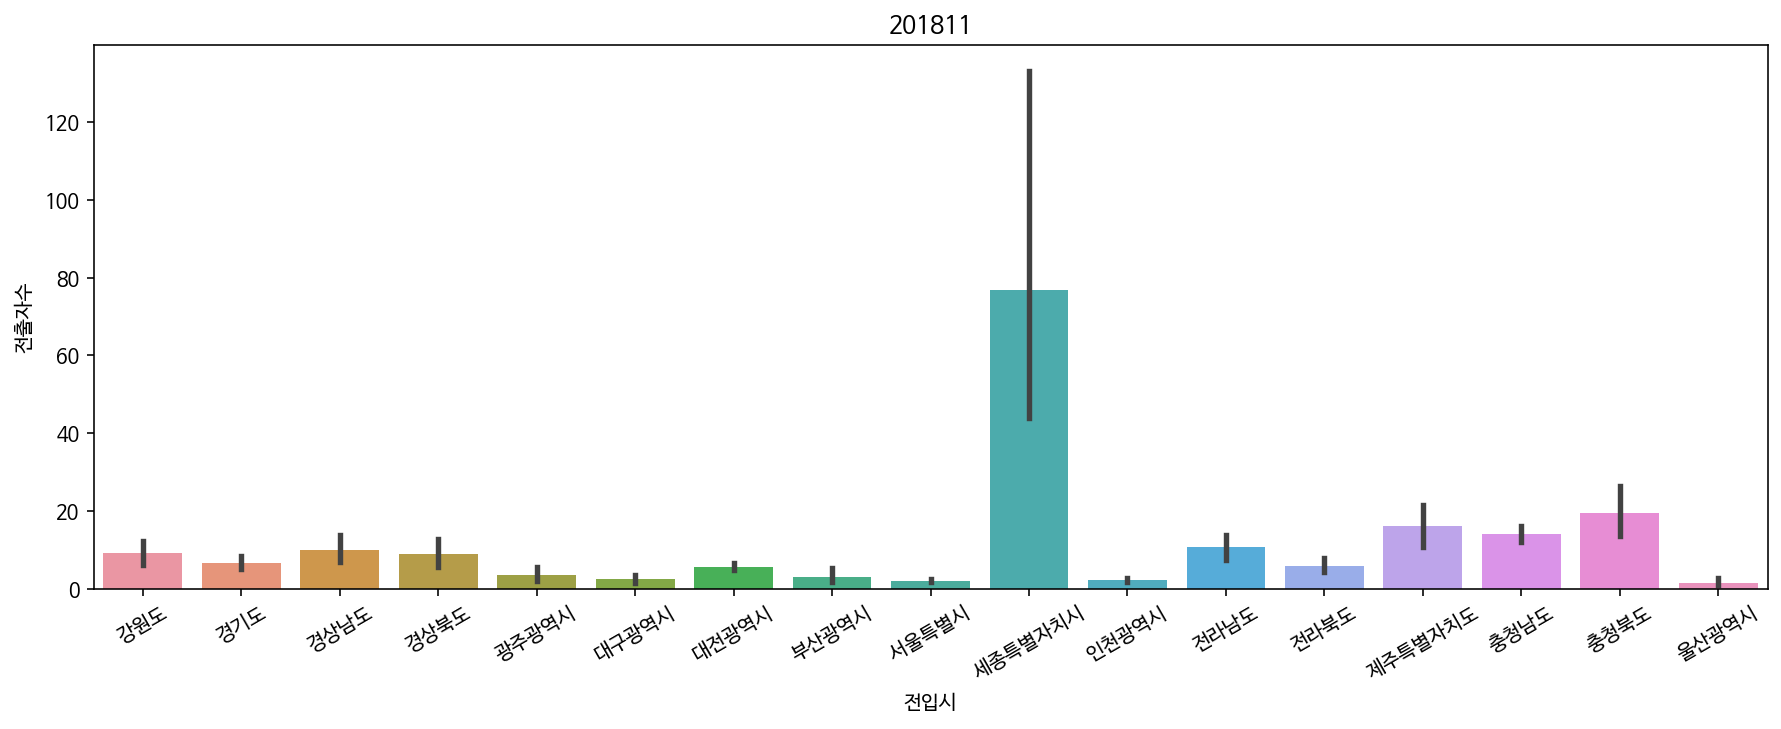

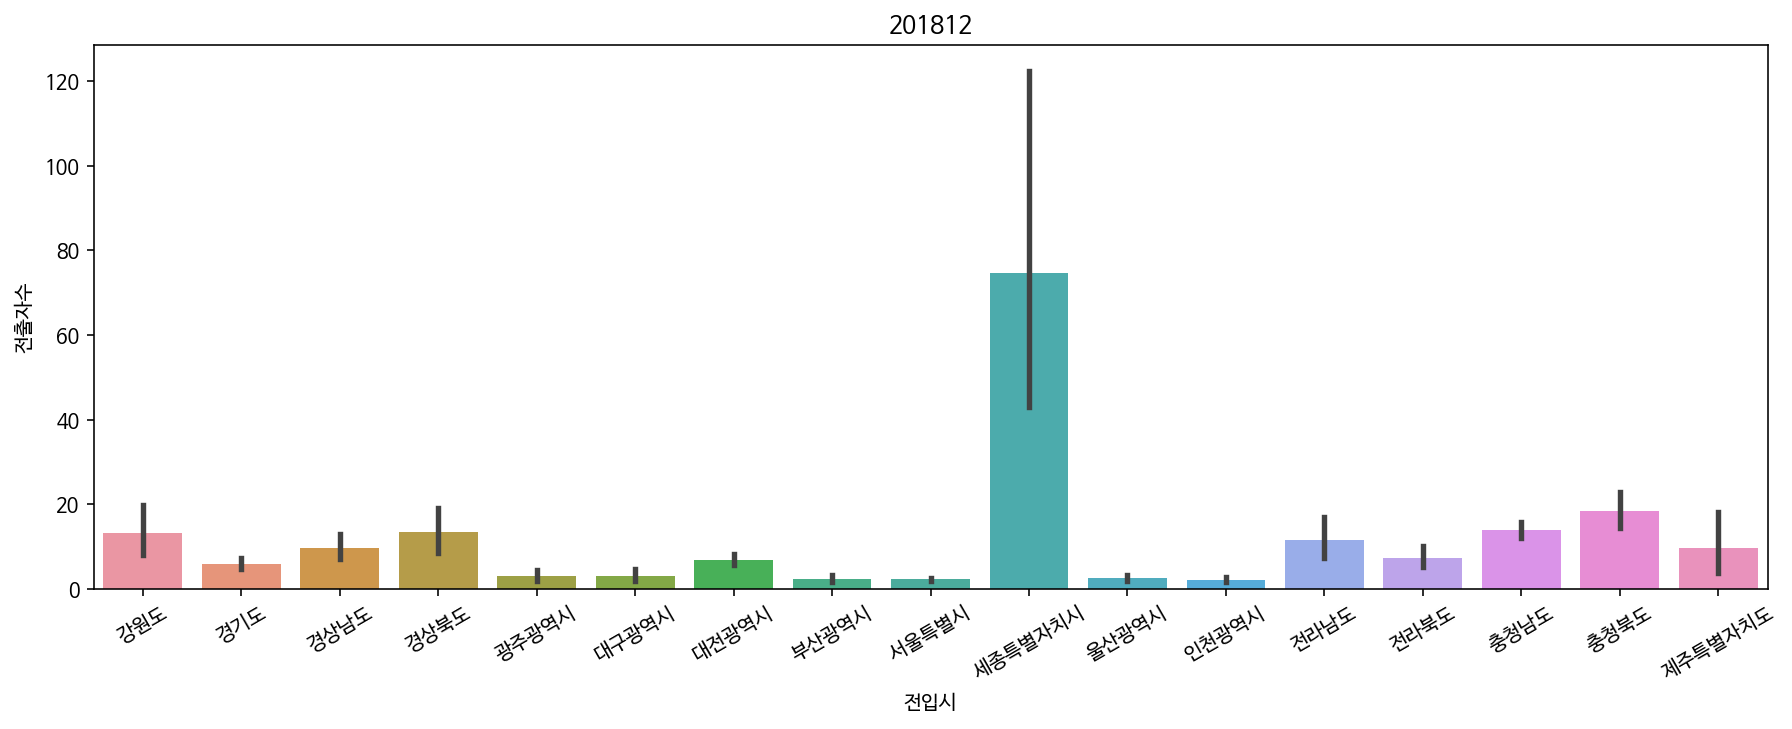

In [ ]:
a = 201801

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=out_a['전입시'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2019년도 전입자 추이

In [ ]:
df_out = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/21.세종시_전출자수.csv', encoding='utf-8')
df_out

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동
0      201701     3    조치원읍   강원도      원주시    단계동
1      201701     9    조치원읍   강원도      춘천시   신사우동
2      201701    13    조치원읍   강원도      홍천군     서면
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동
...       ...   ...     ...   ...      ...    ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍
80988  202101     2     다정동  충청북도   청주시상당구   용암1동
80989  202101    35     다정동  충청북도   청주시청원구    오창읍
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍

[80992 rows x 6 columns]

In [ ]:
a = 201901

for i in range(1, 13):
    df_out_a = df_out['년월']==a
    df_out[a] = df_out_a
    a += 1
print(df_out)

           년월  전출자수 세종전출행정동   전입시  ... 201909 201910  201911  201912
0      201701     3    조치원읍   강원도  ...  False  False   False   False
1      201701     9    조치원읍   강원도  ...  False  False   False   False
2      201701    13    조치원읍   강원도  ...  False  False   False   False
3      201701     3    조치원읍   경기도  ...  False  False   False   False
4      201701     1    조치원읍   경기도  ...  False  False   False   False
...       ...   ...     ...   ...  ...    ...    ...     ...     ...
80987  202101    22     다정동  충청북도  ...  False  False   False   False
80988  202101     2     다정동  충청북도  ...  False  False   False   False
80989  202101    35     다정동  충청북도  ...  False  False   False   False
80990  202101    13     다정동  충청북도  ...  False  False   False   False
80991  202101    84     다정동  충청북도  ...  False  False   False   False

[80992 rows x 18 columns]


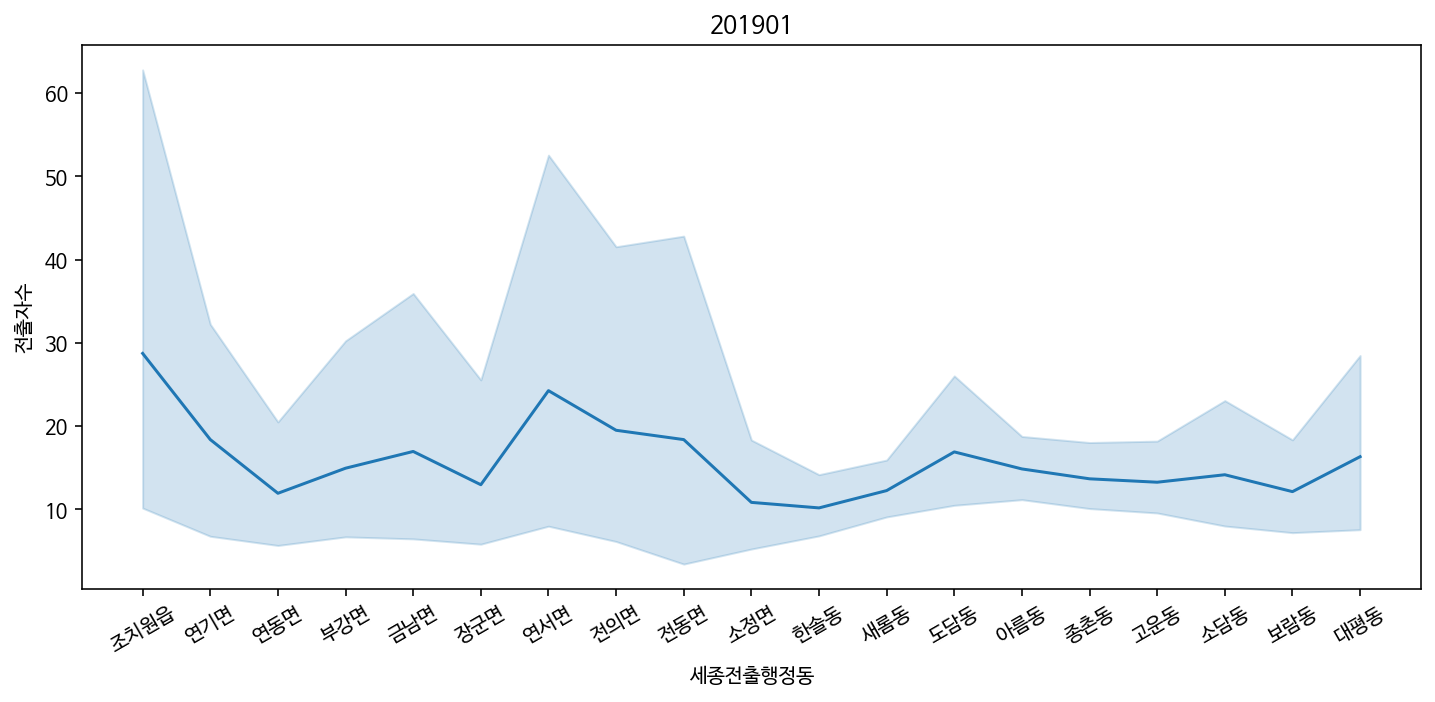

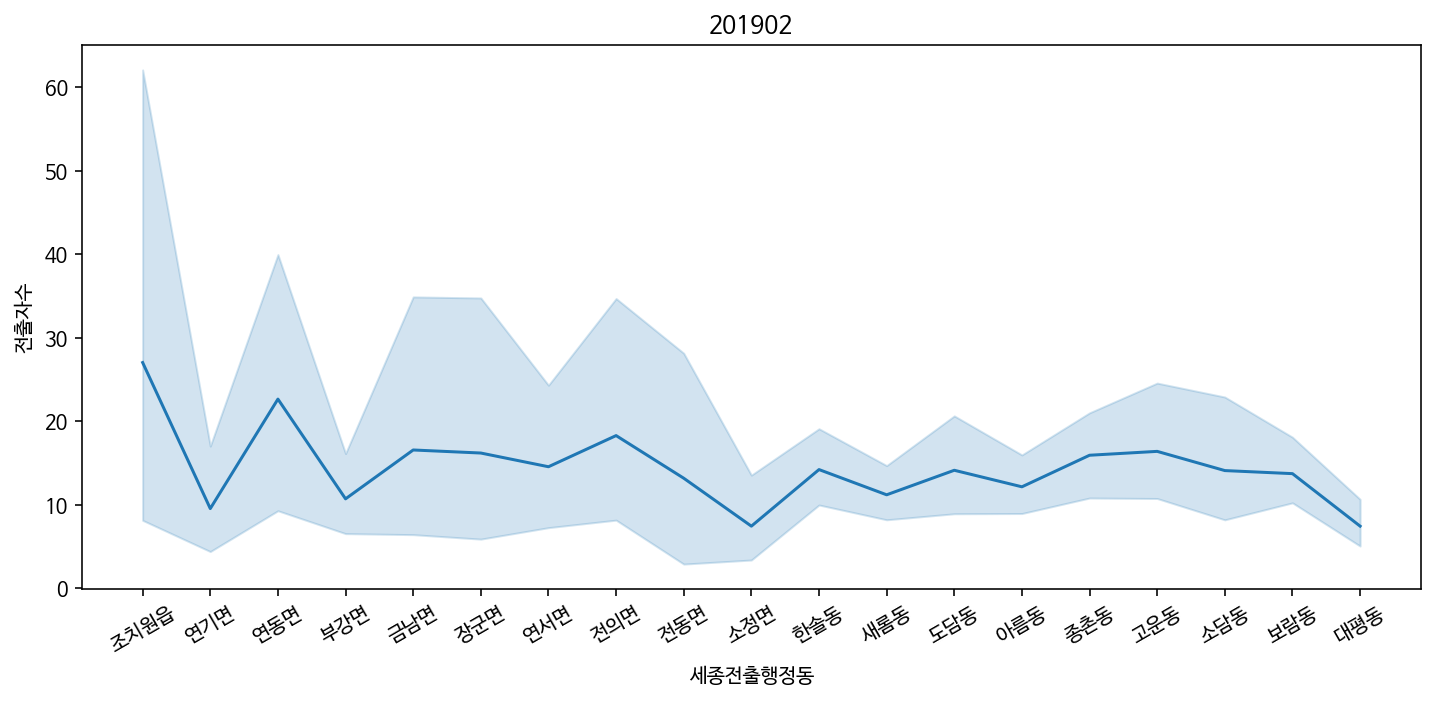

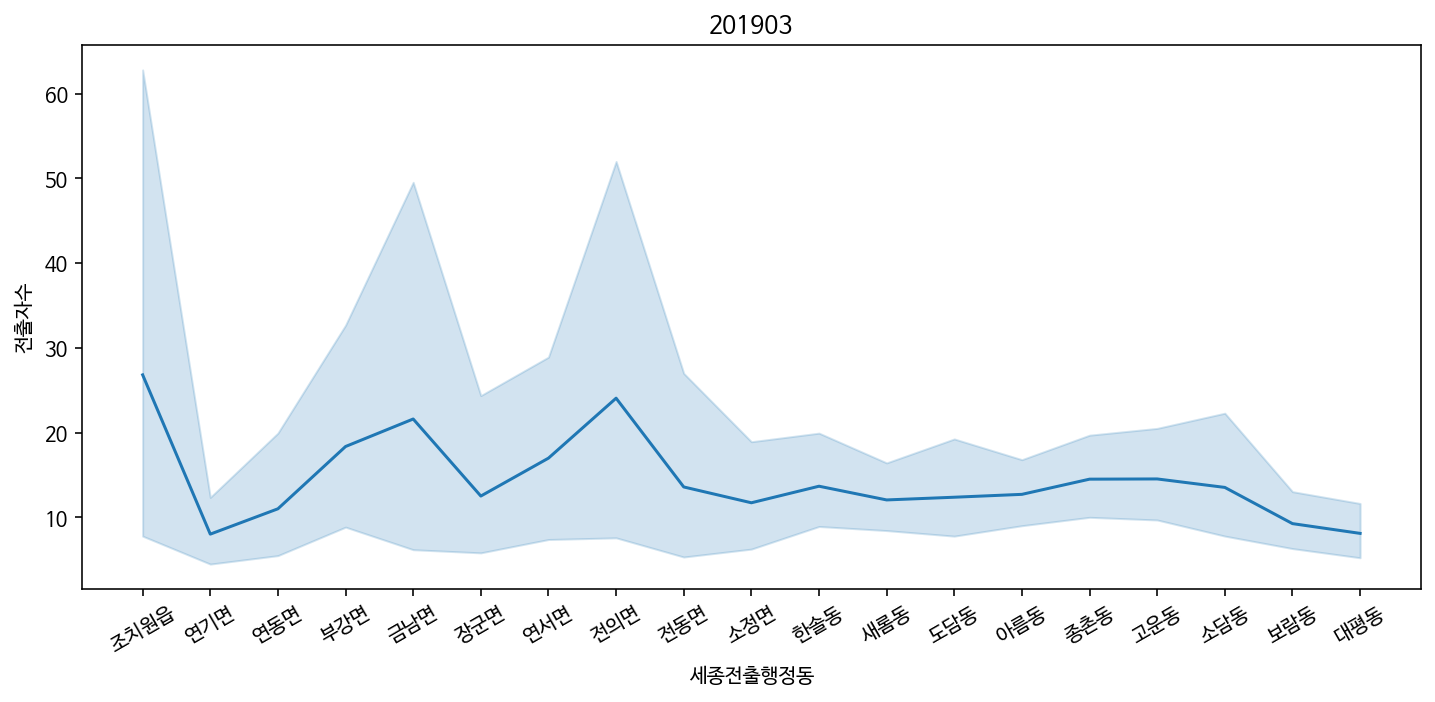

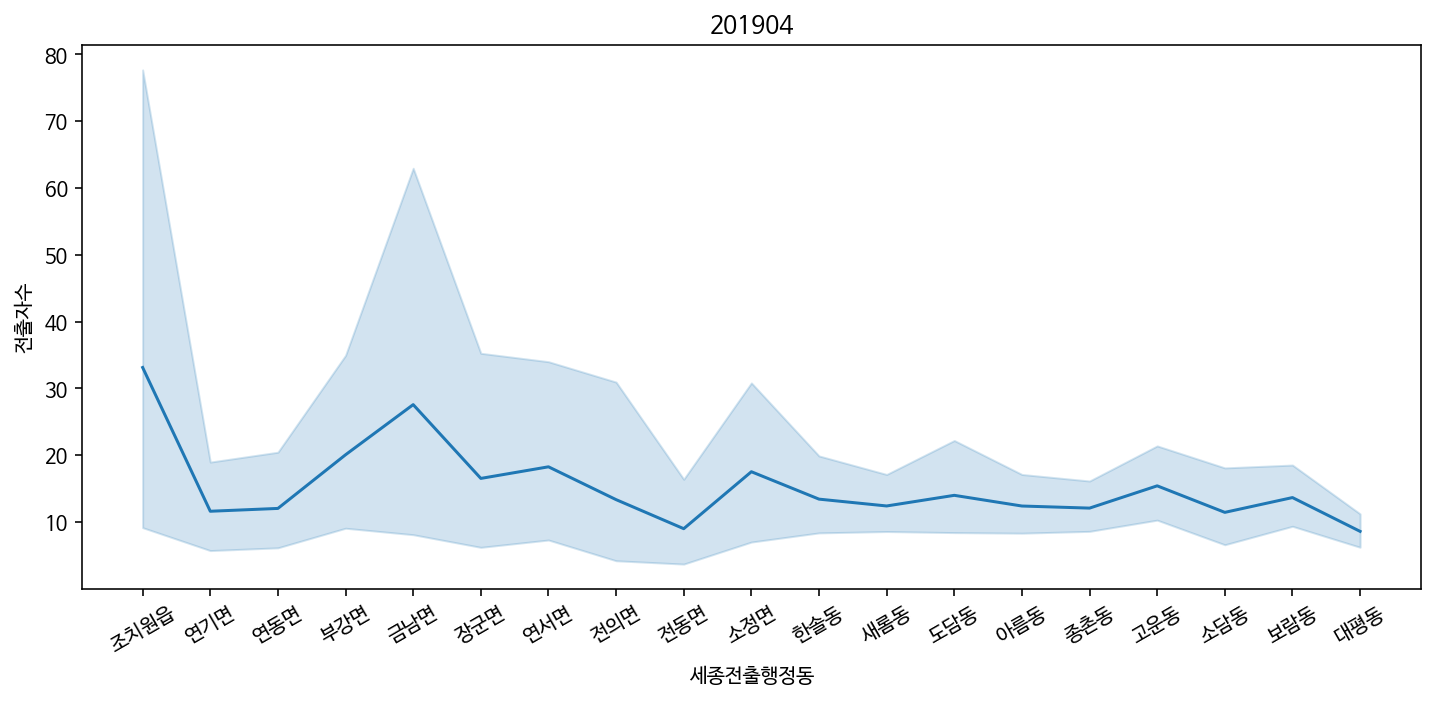

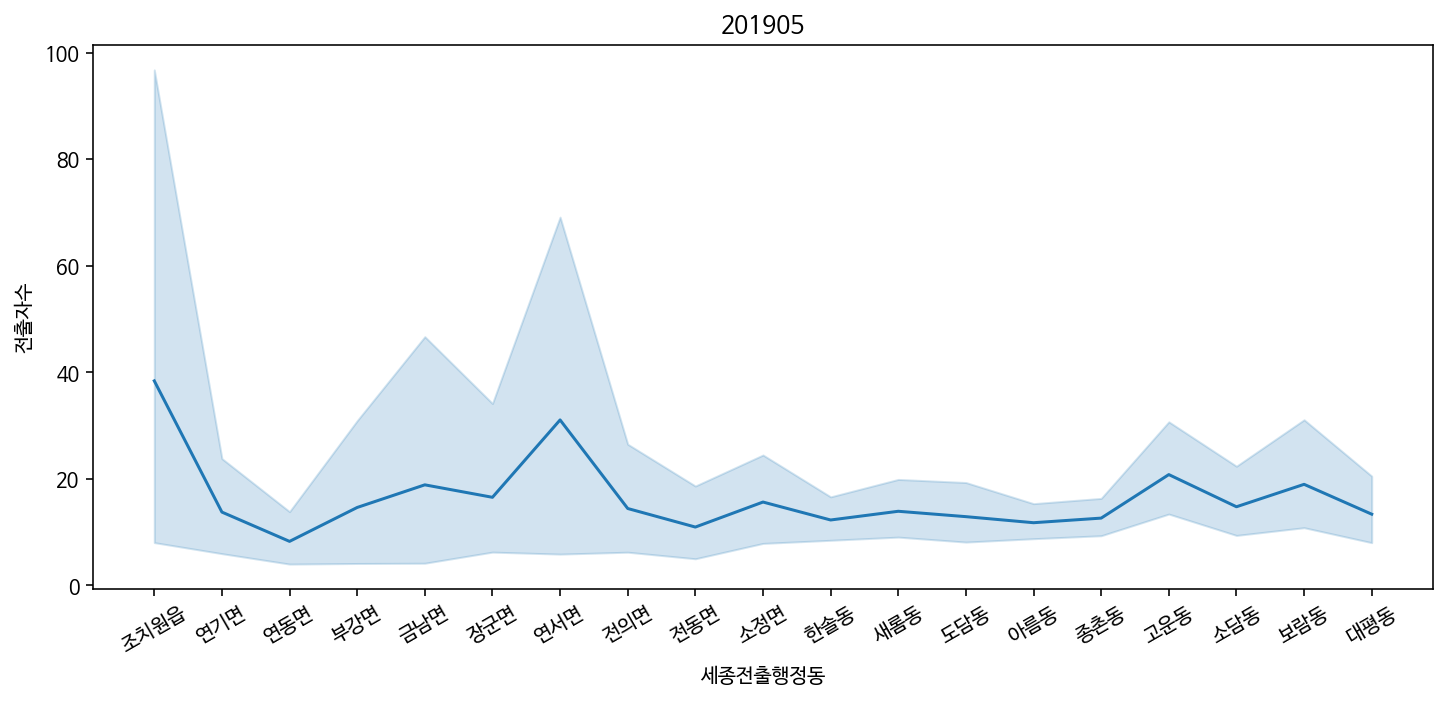

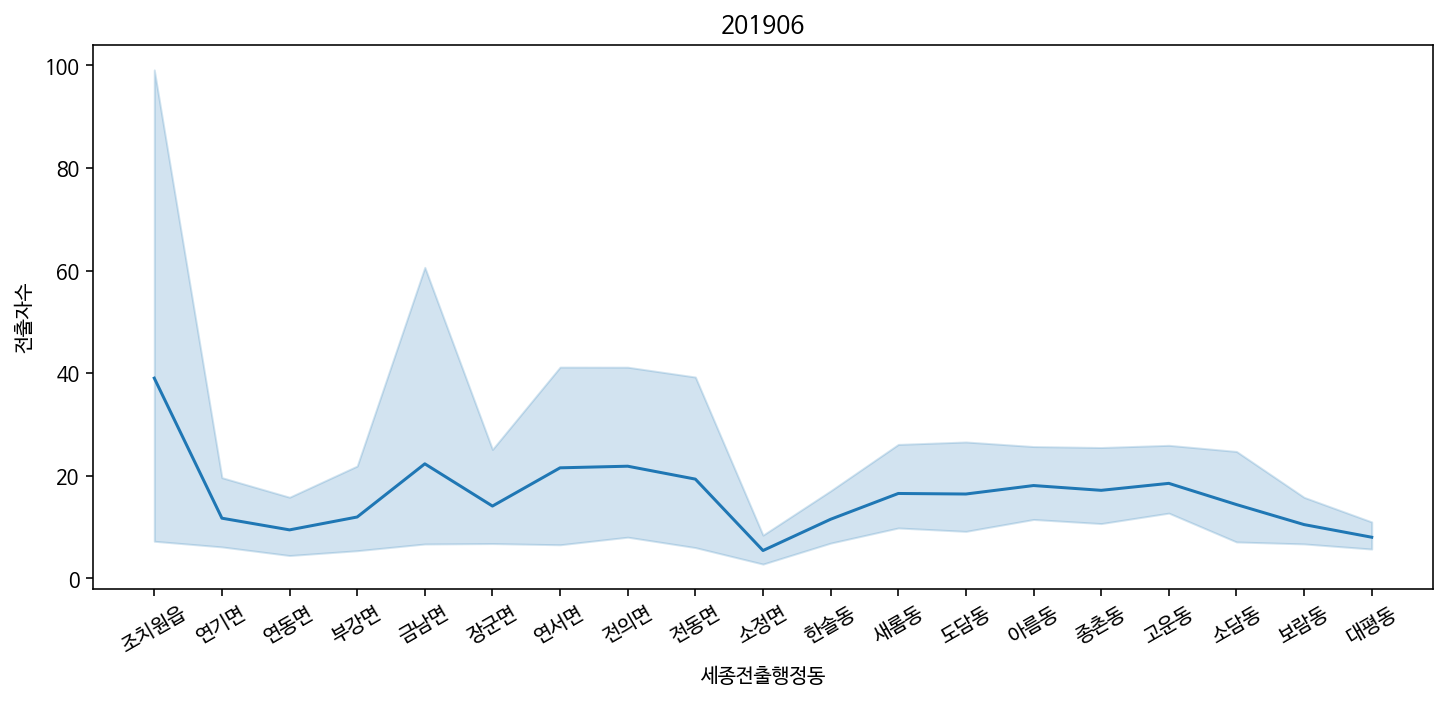

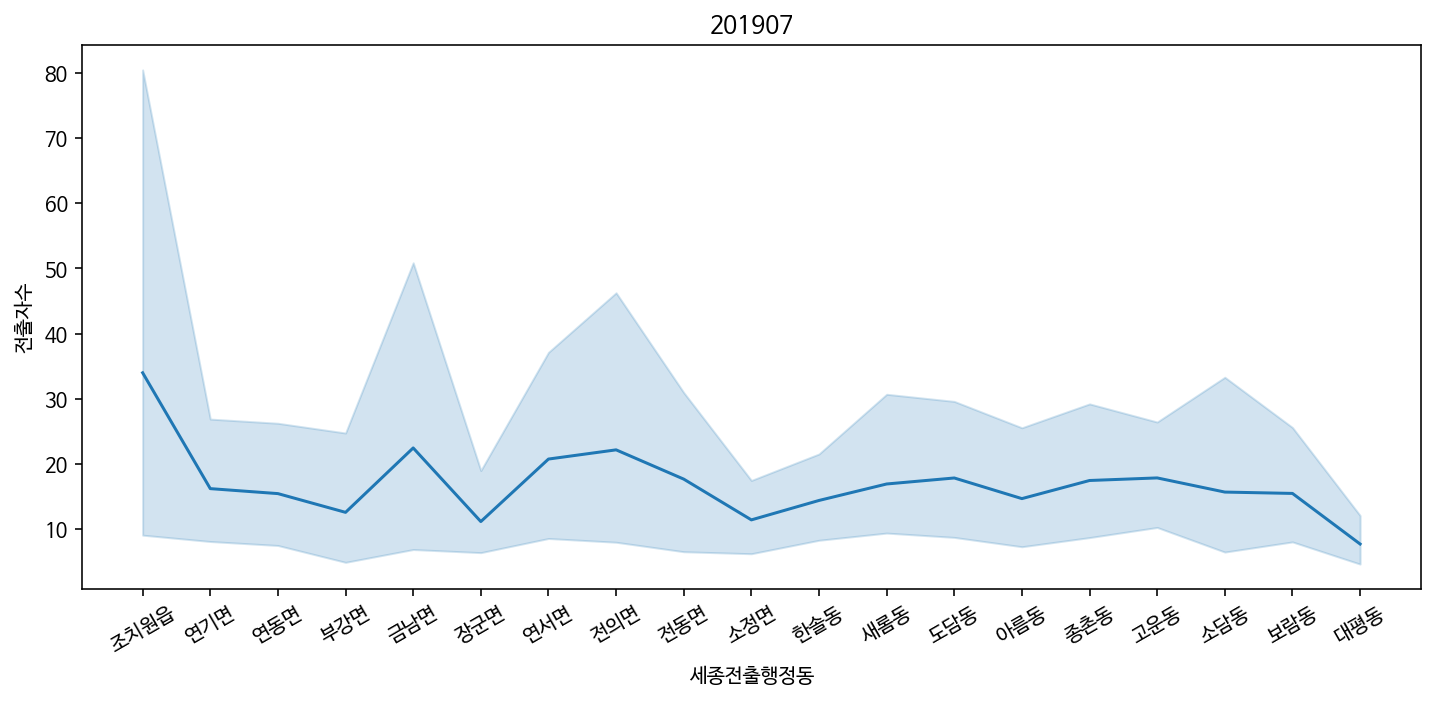

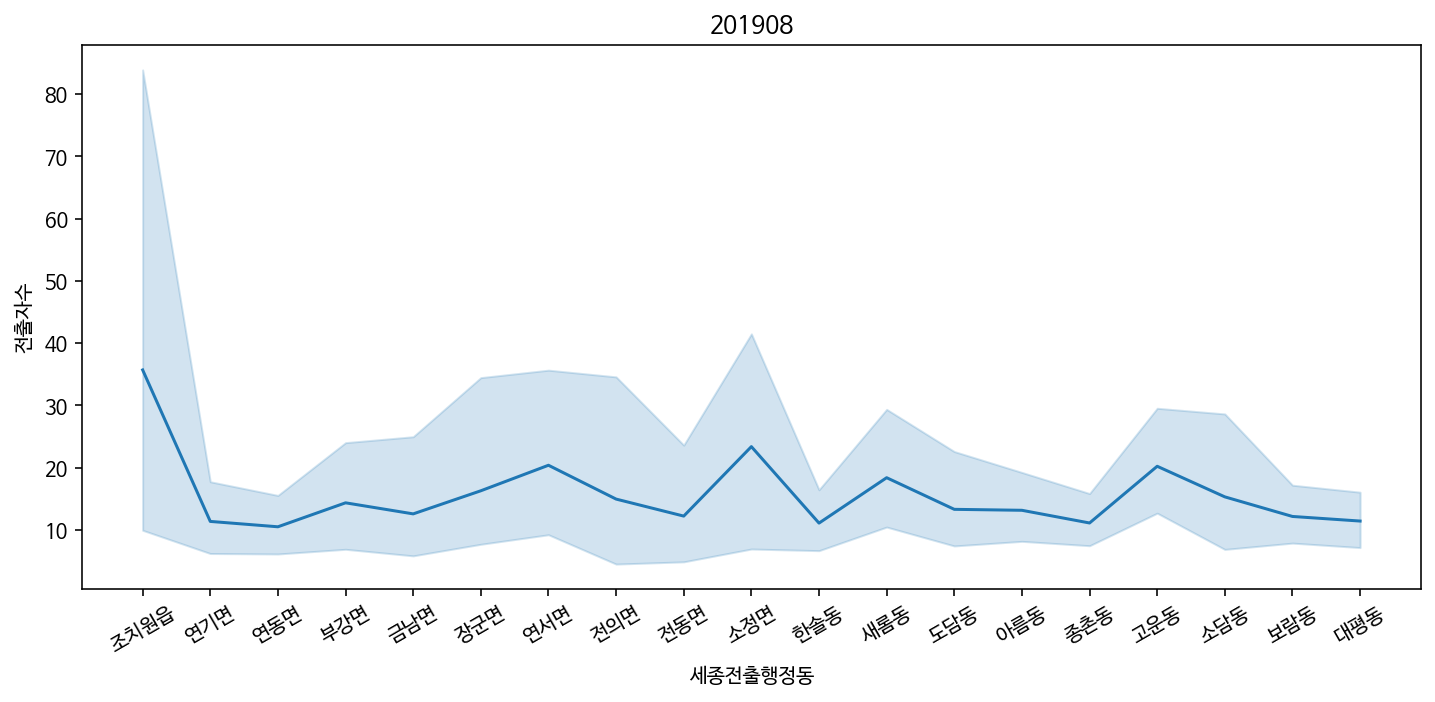

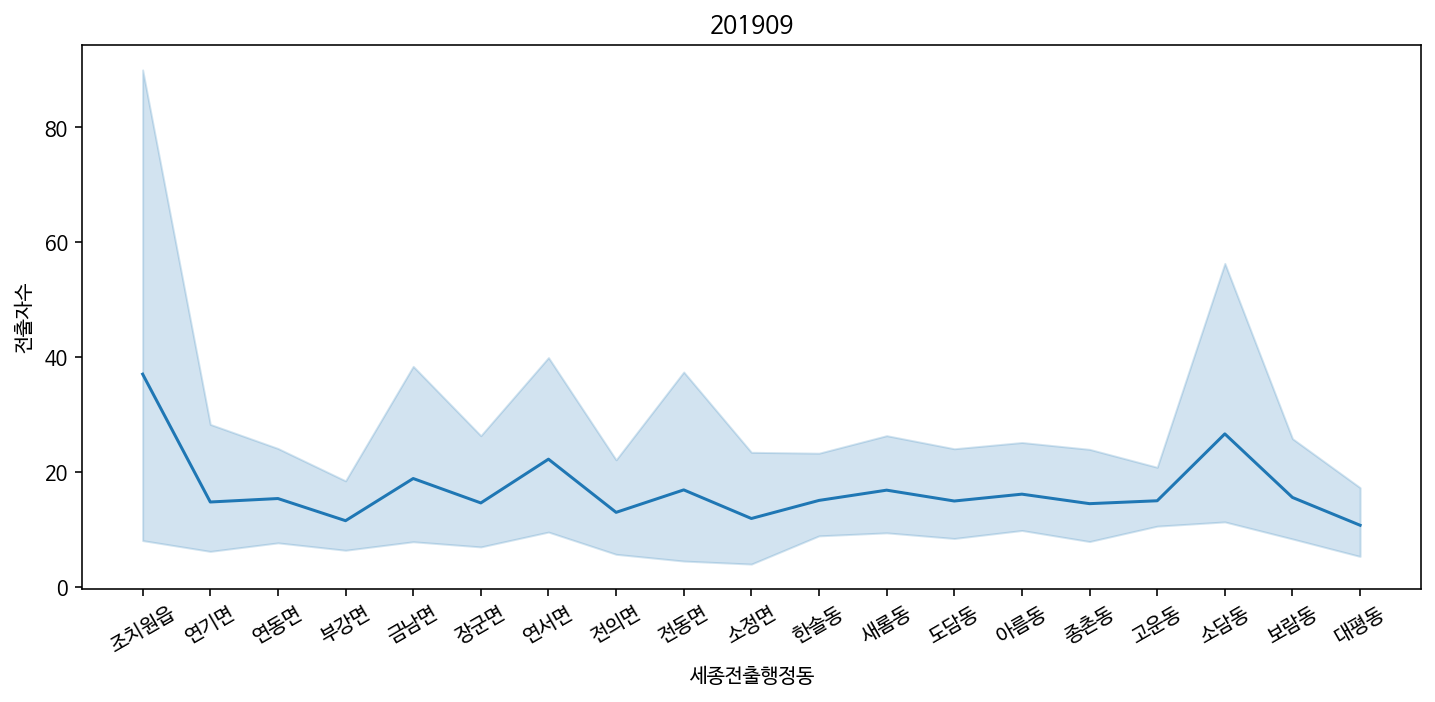

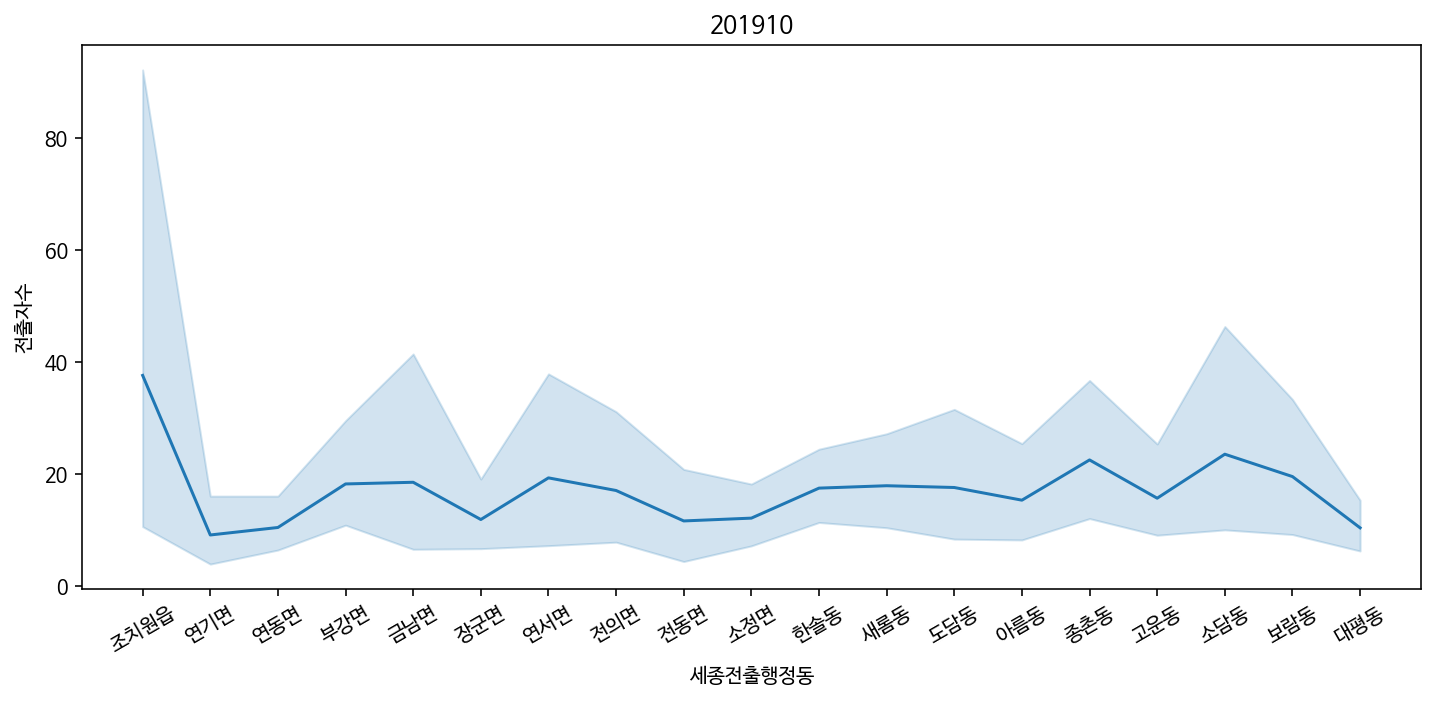

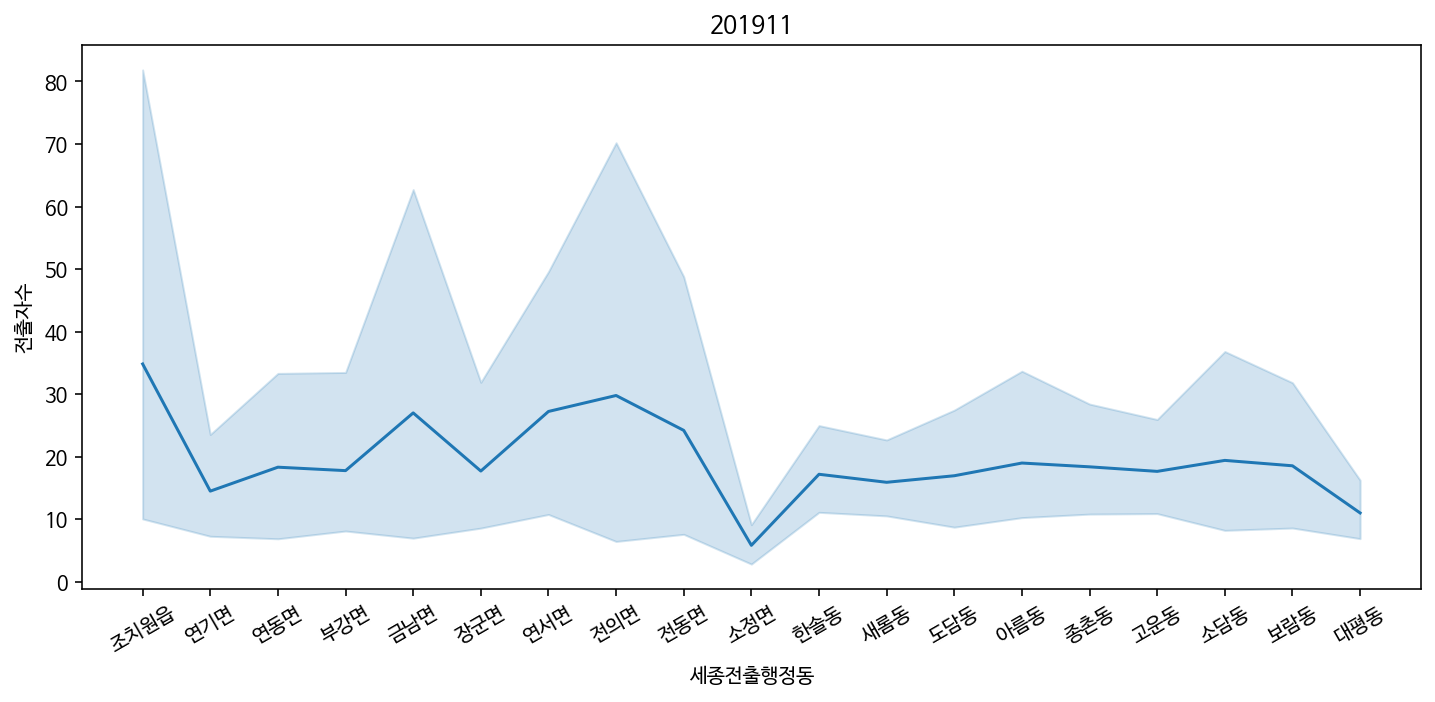

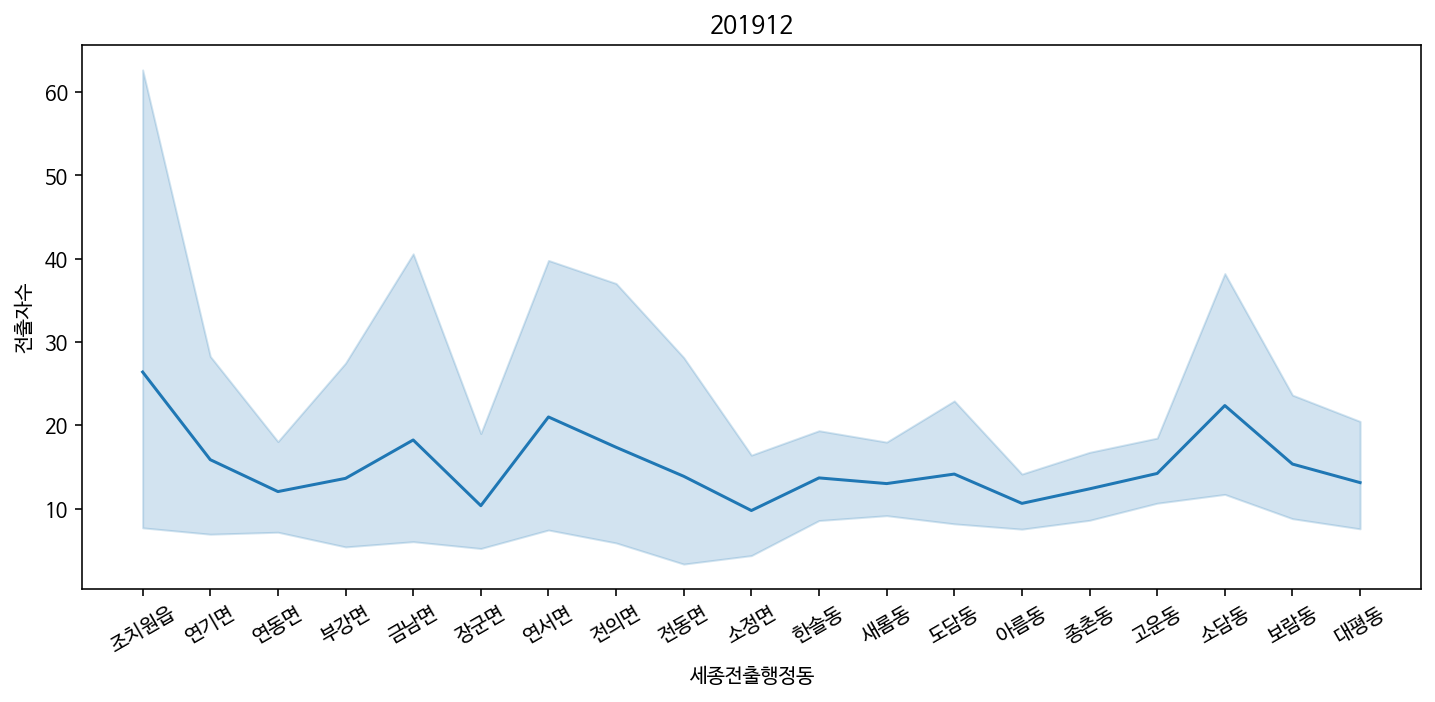

In [ ]:
a = 201901

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=out_a['세종전출행정동'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

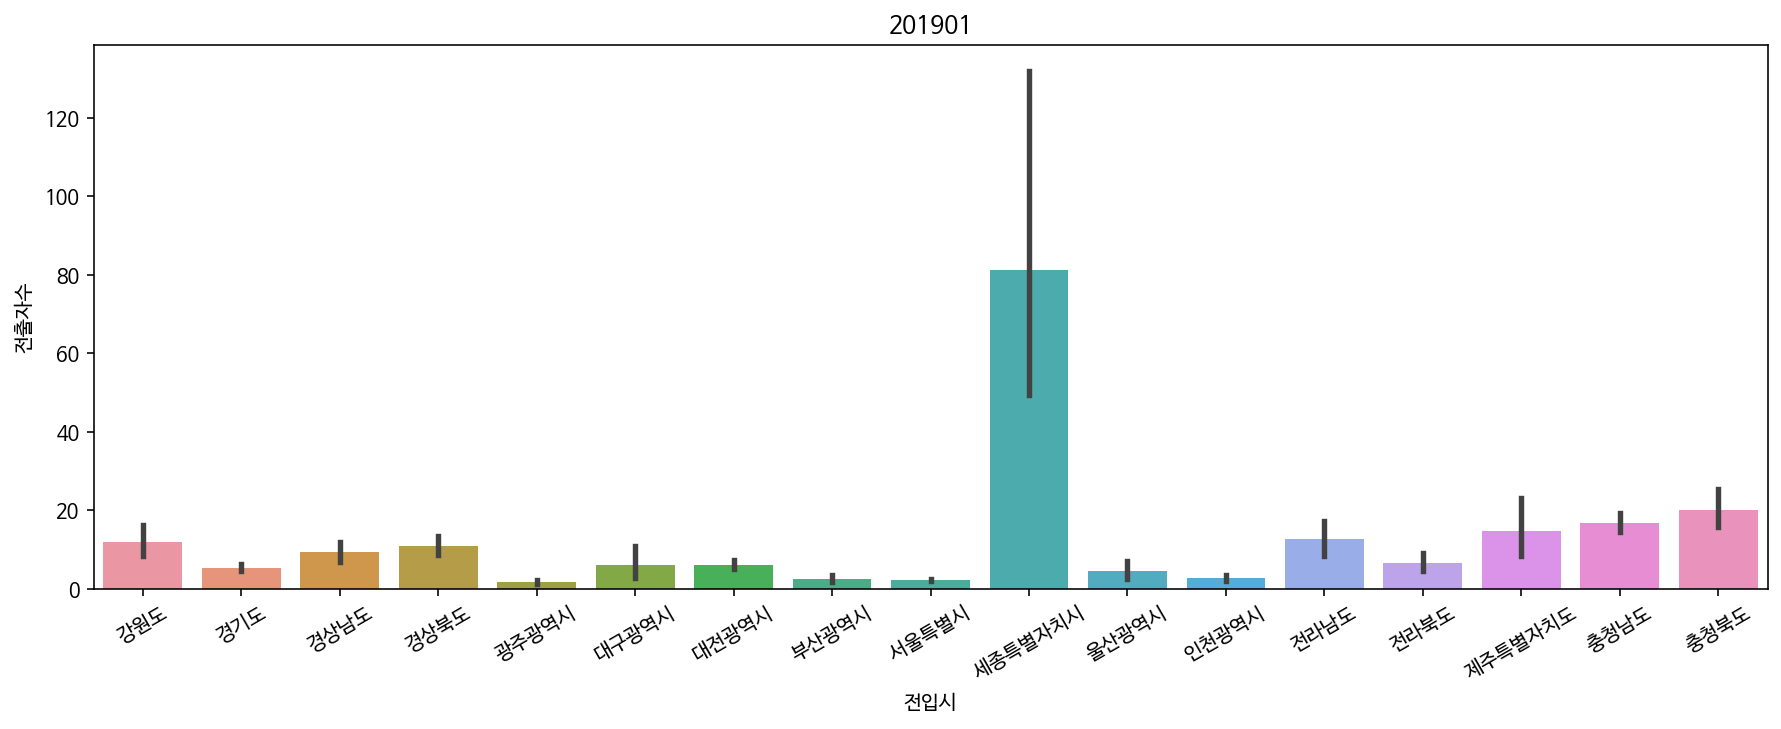

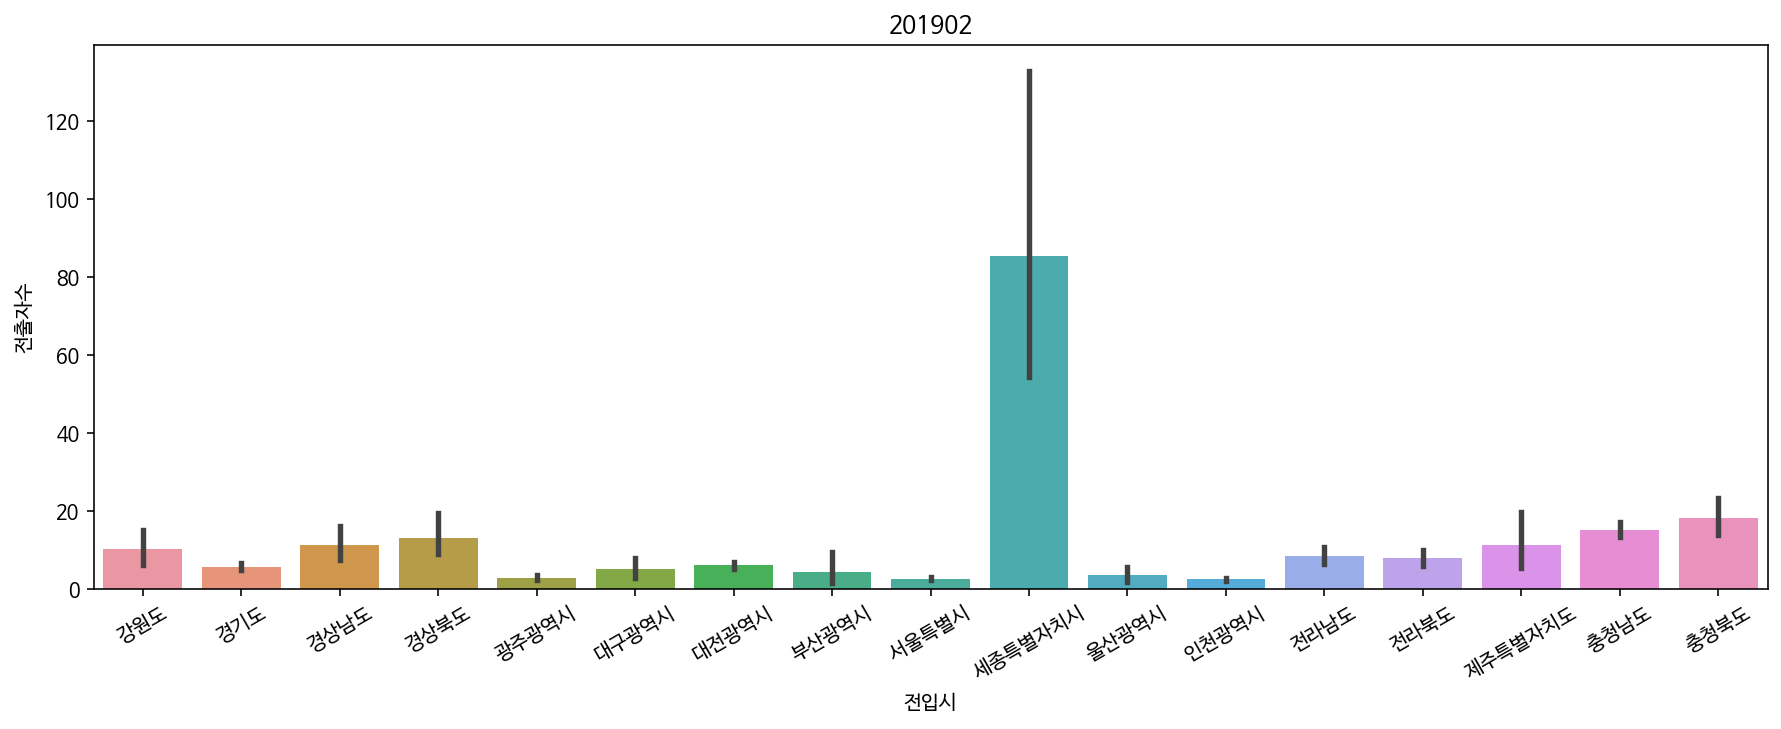

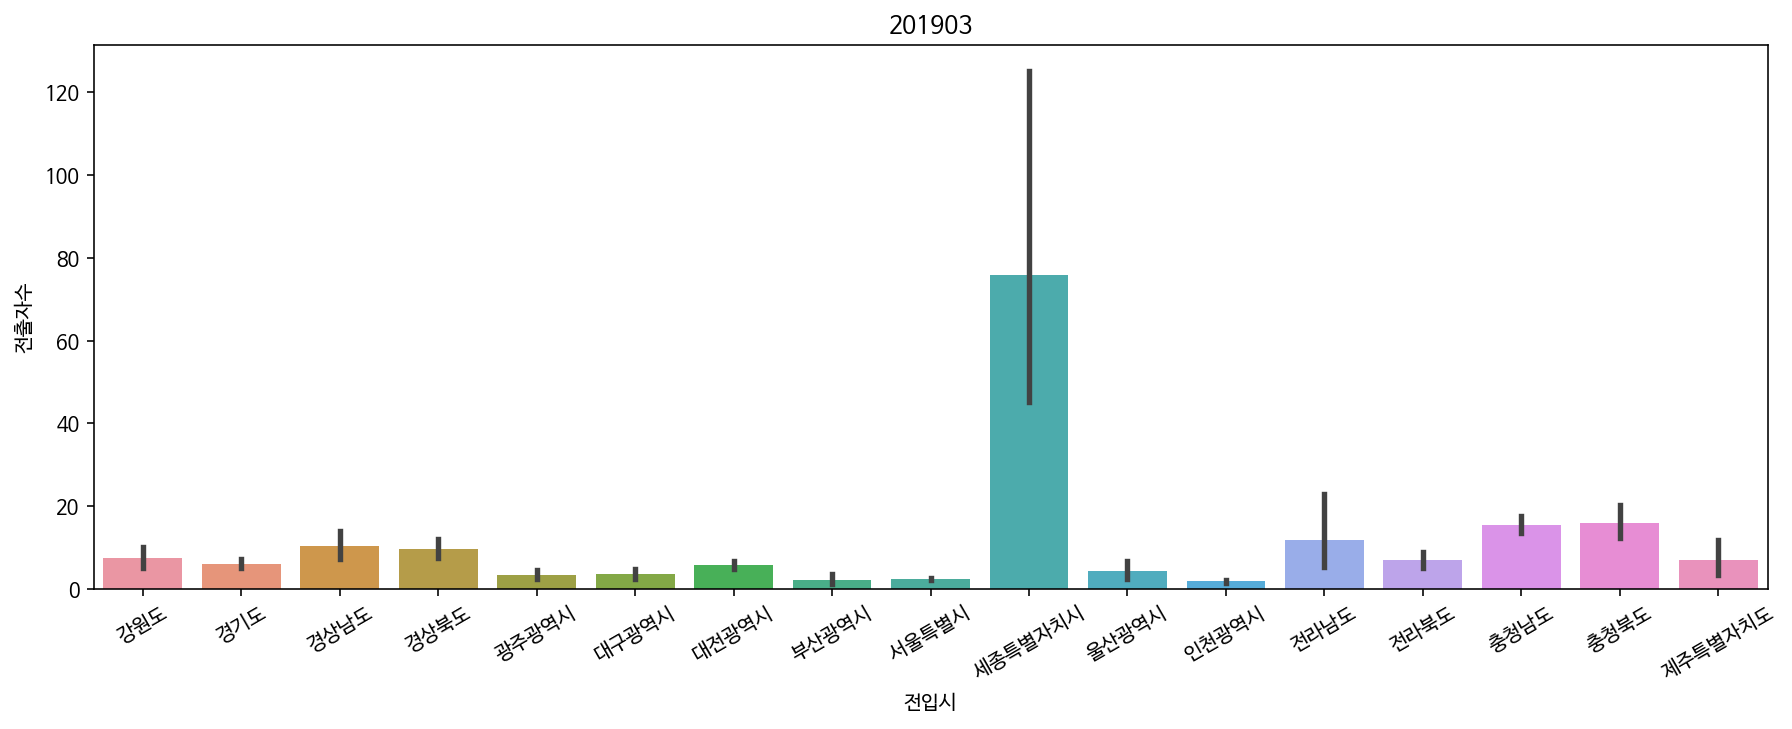

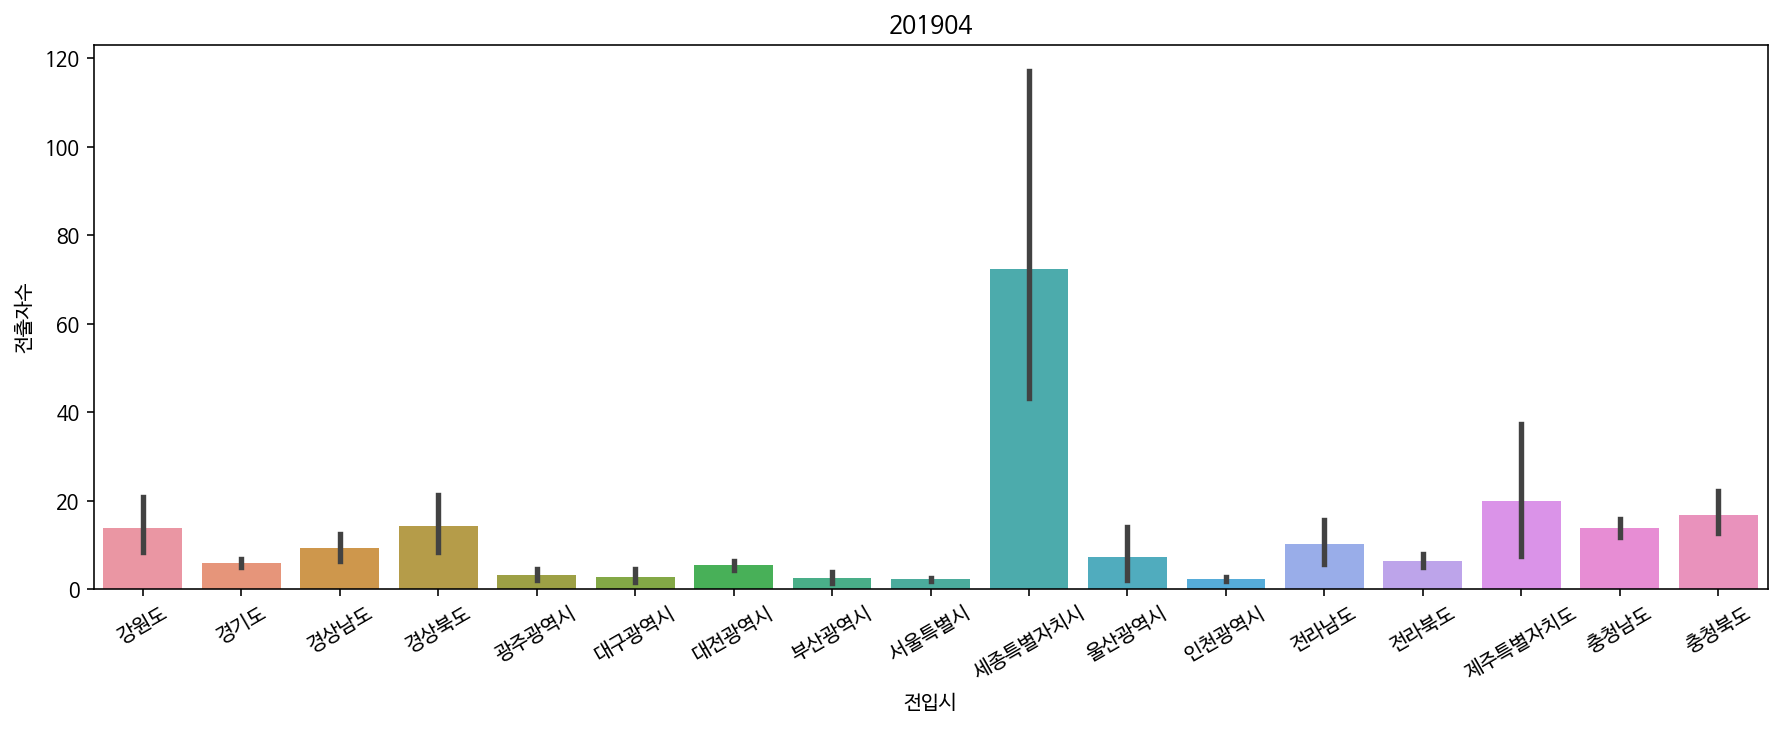

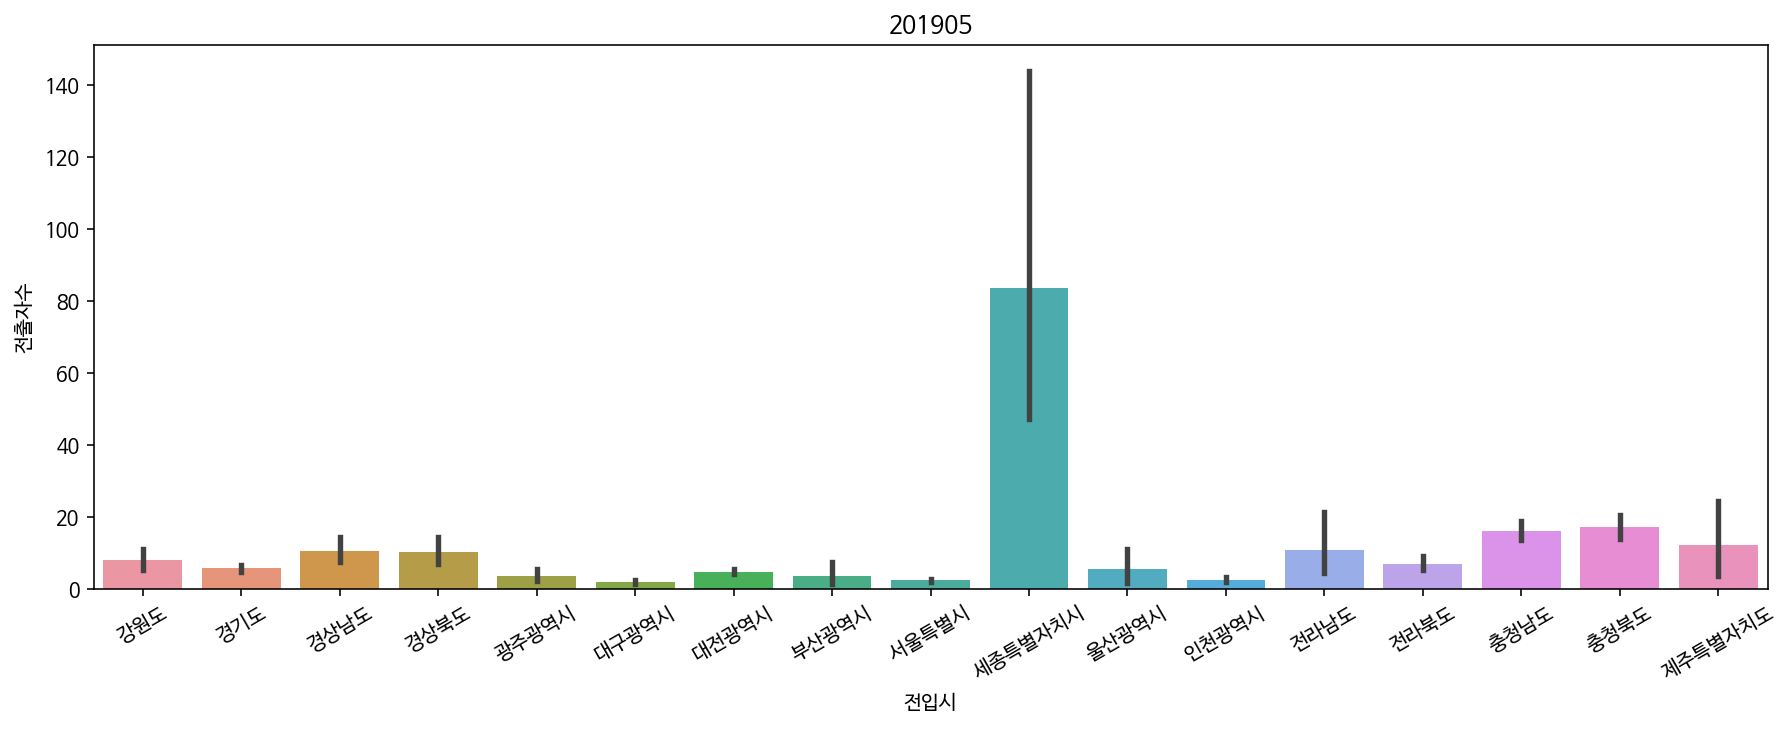

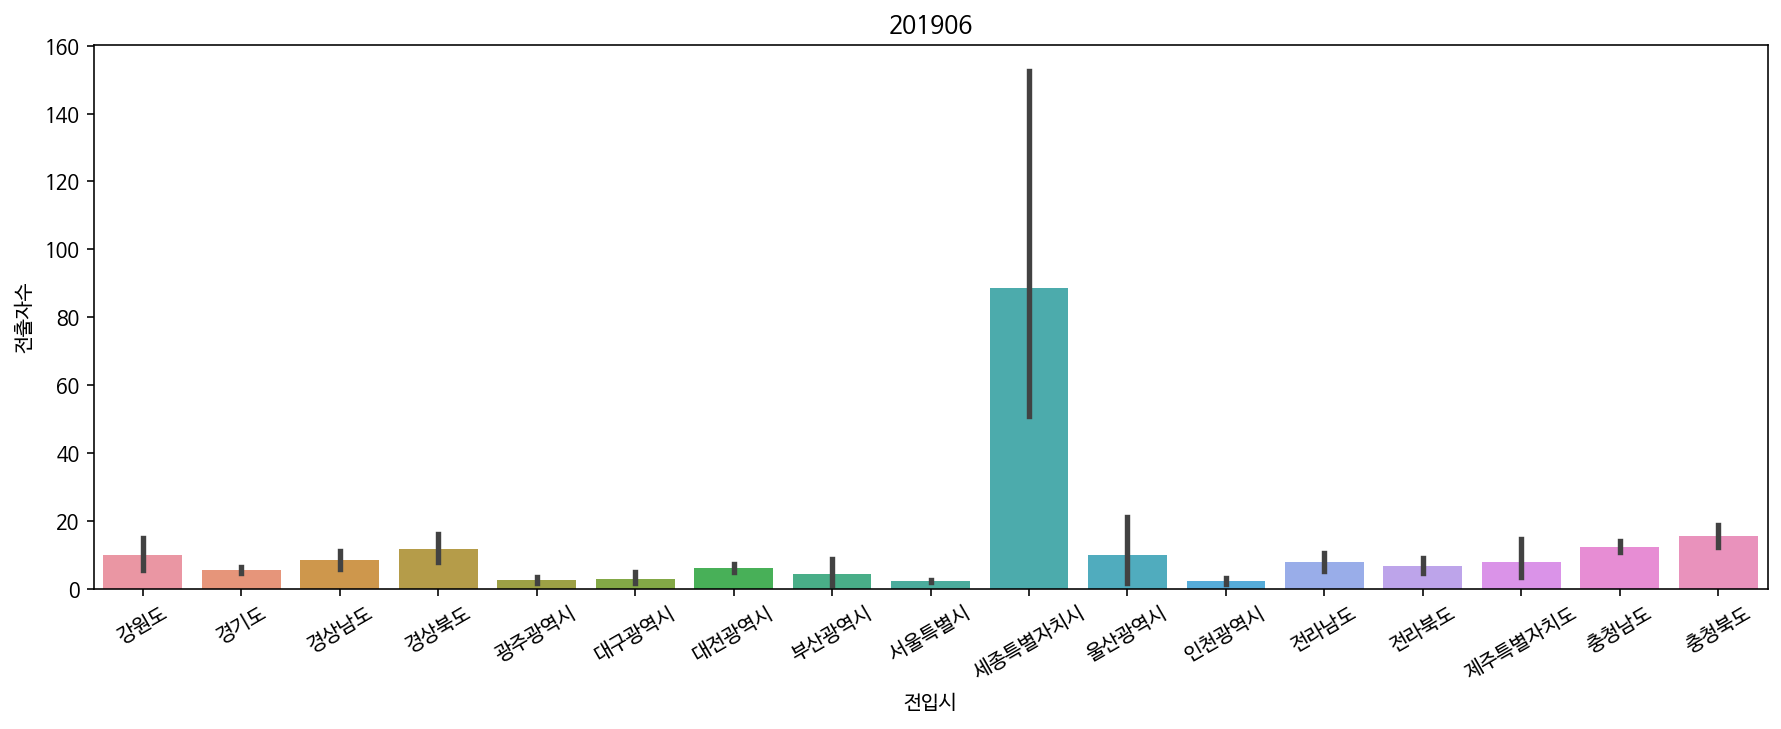

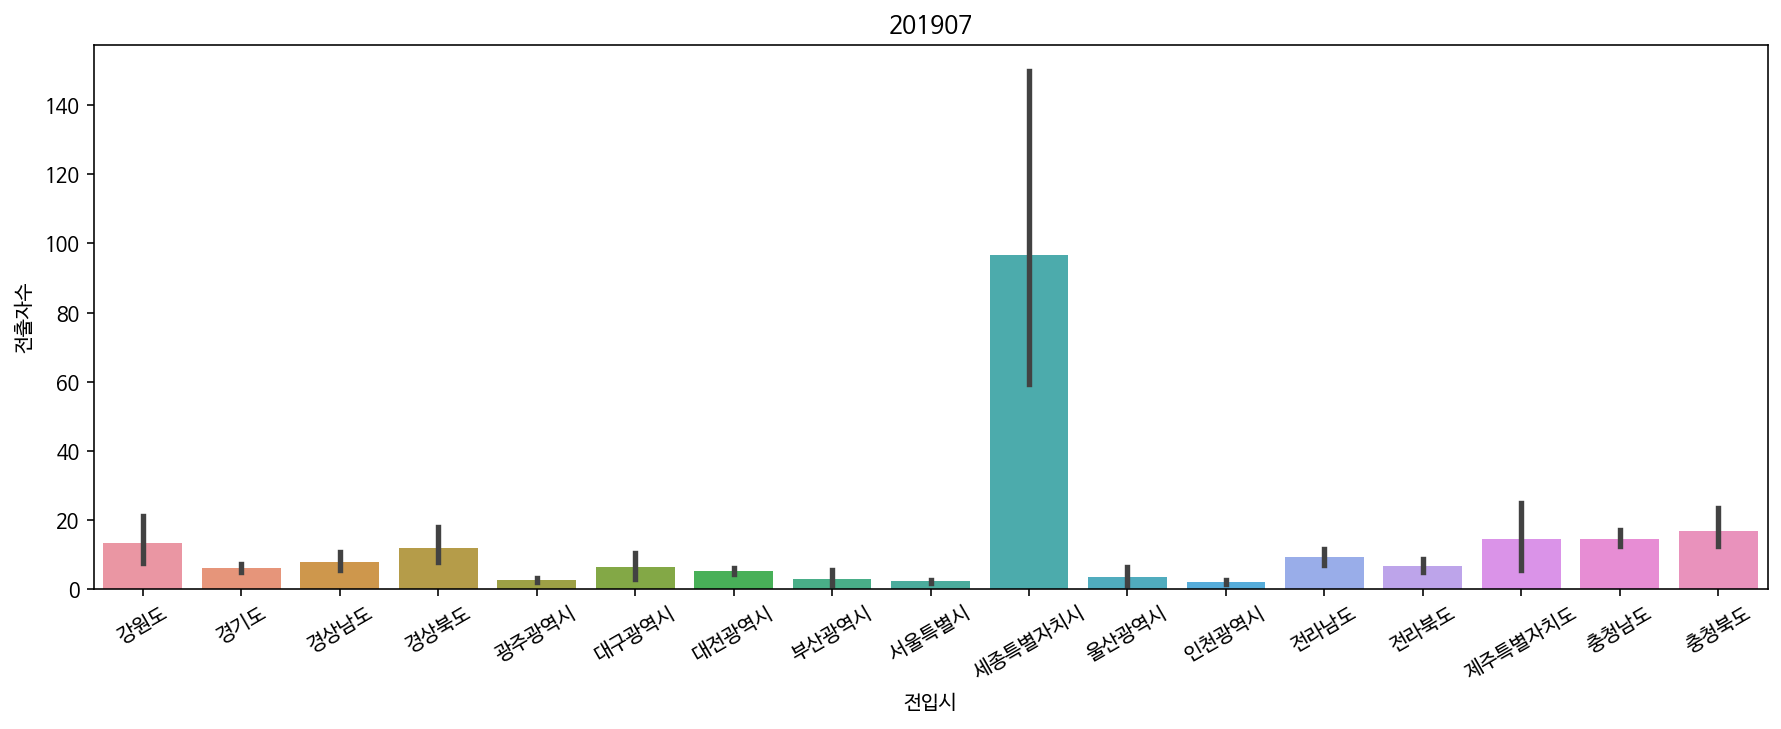

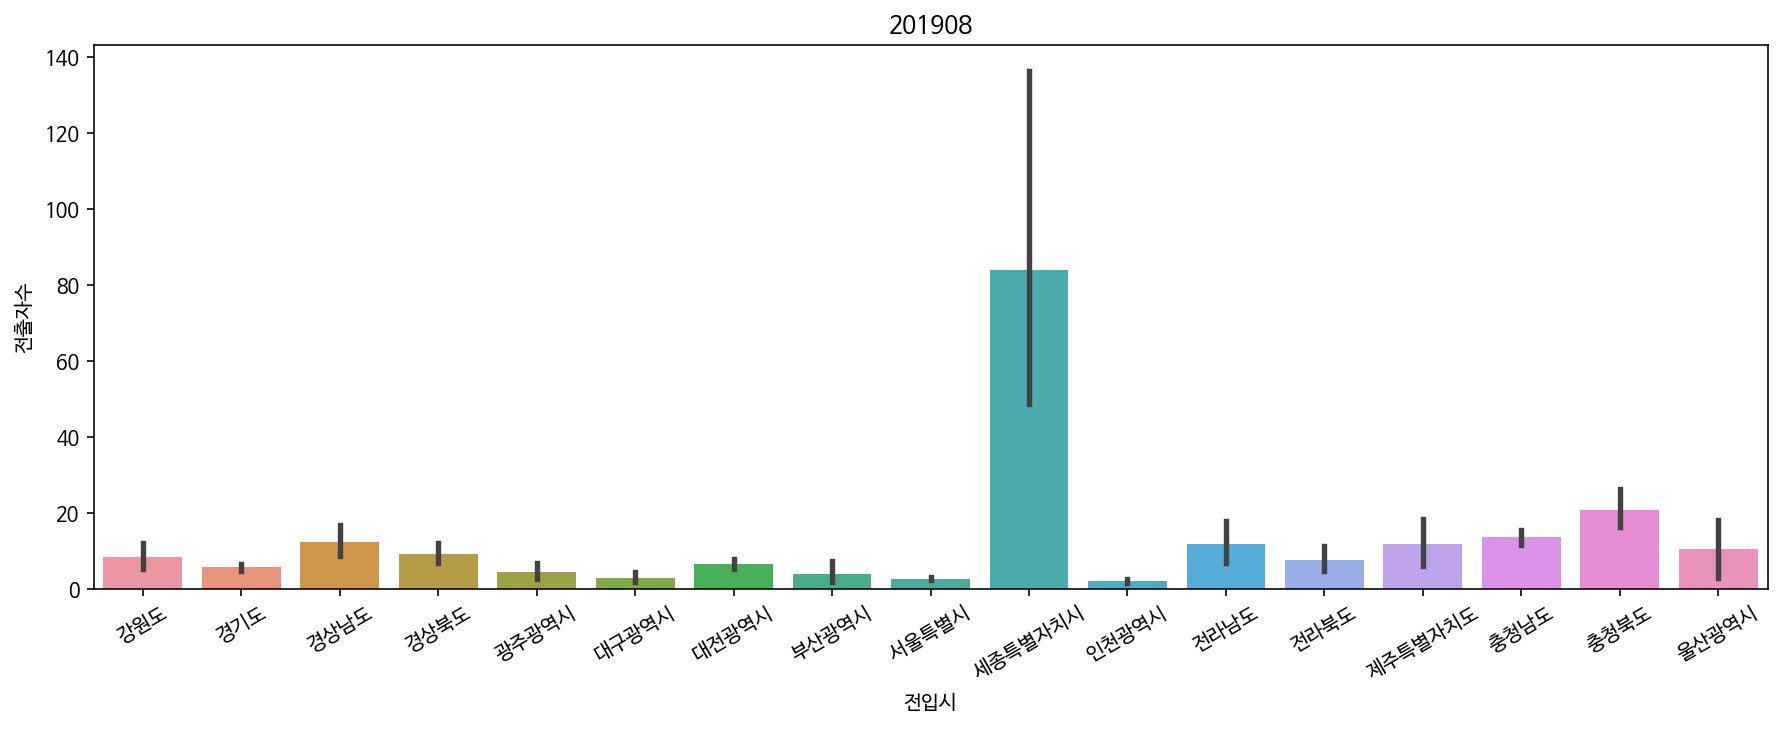

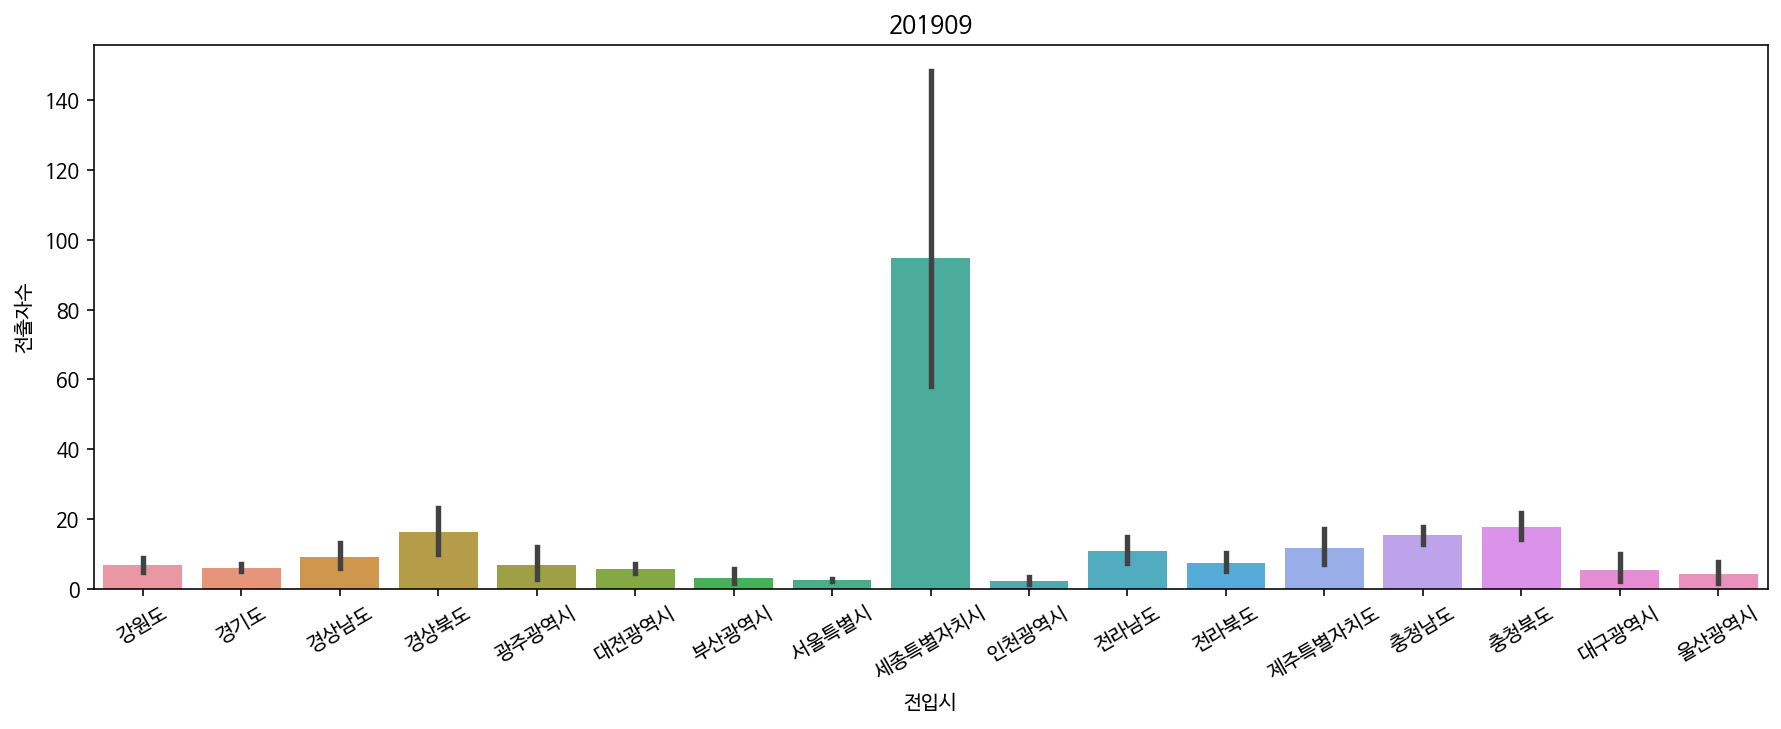

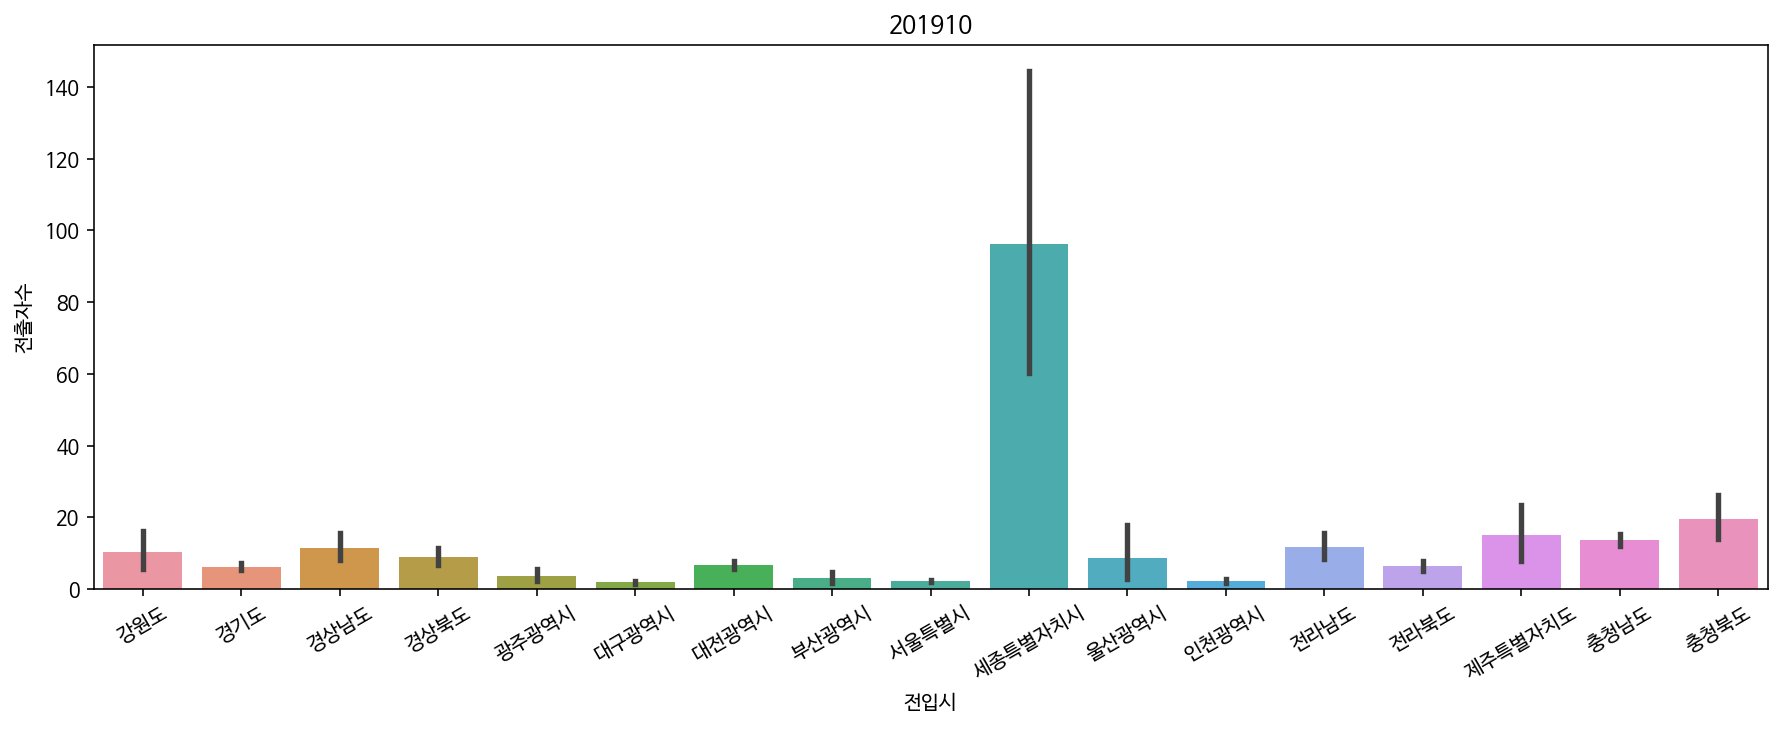

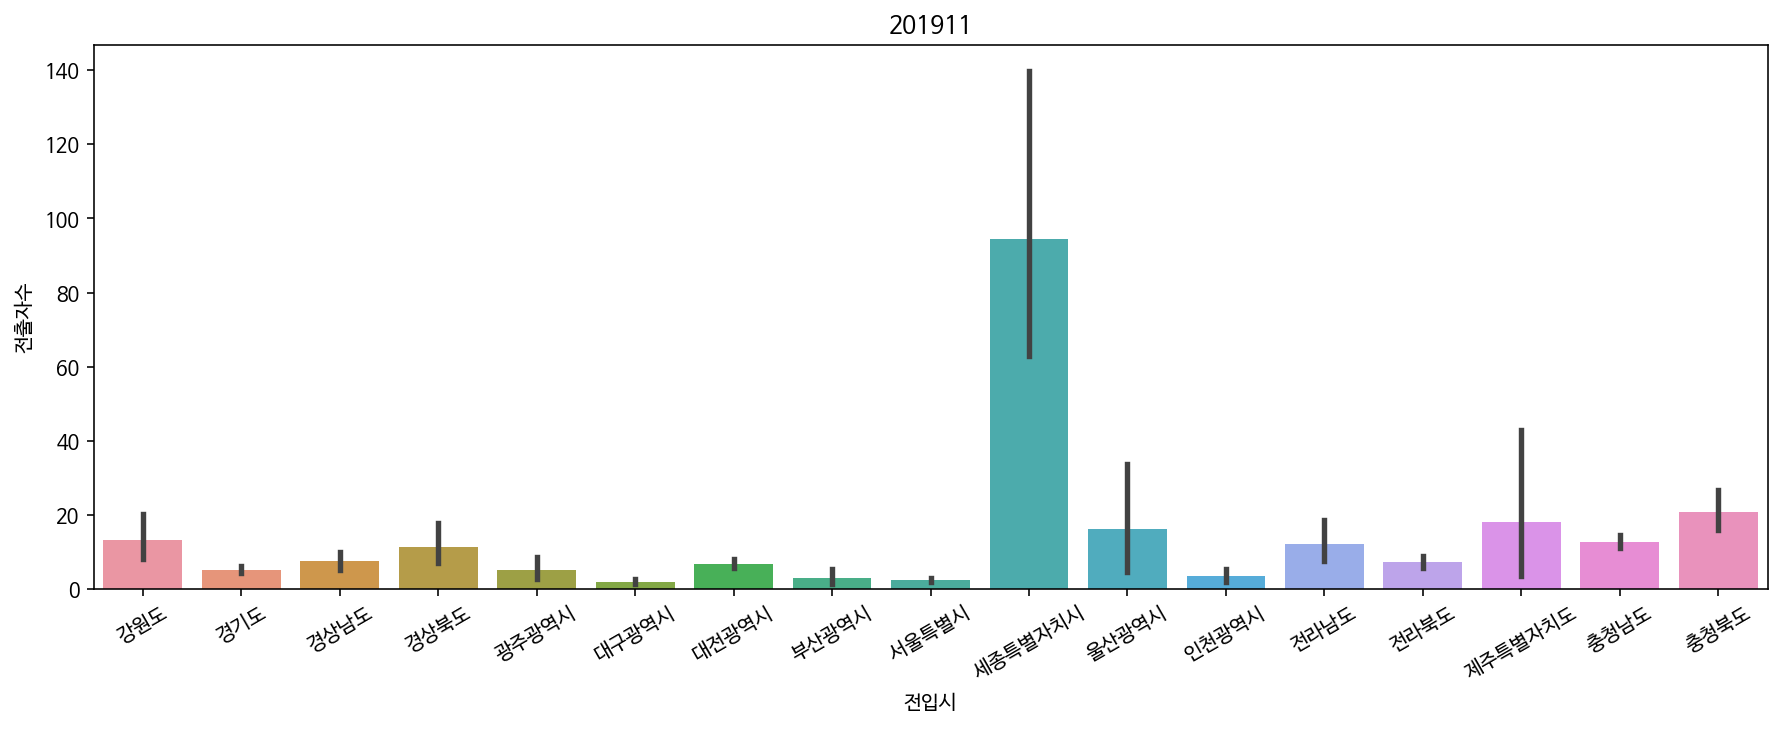

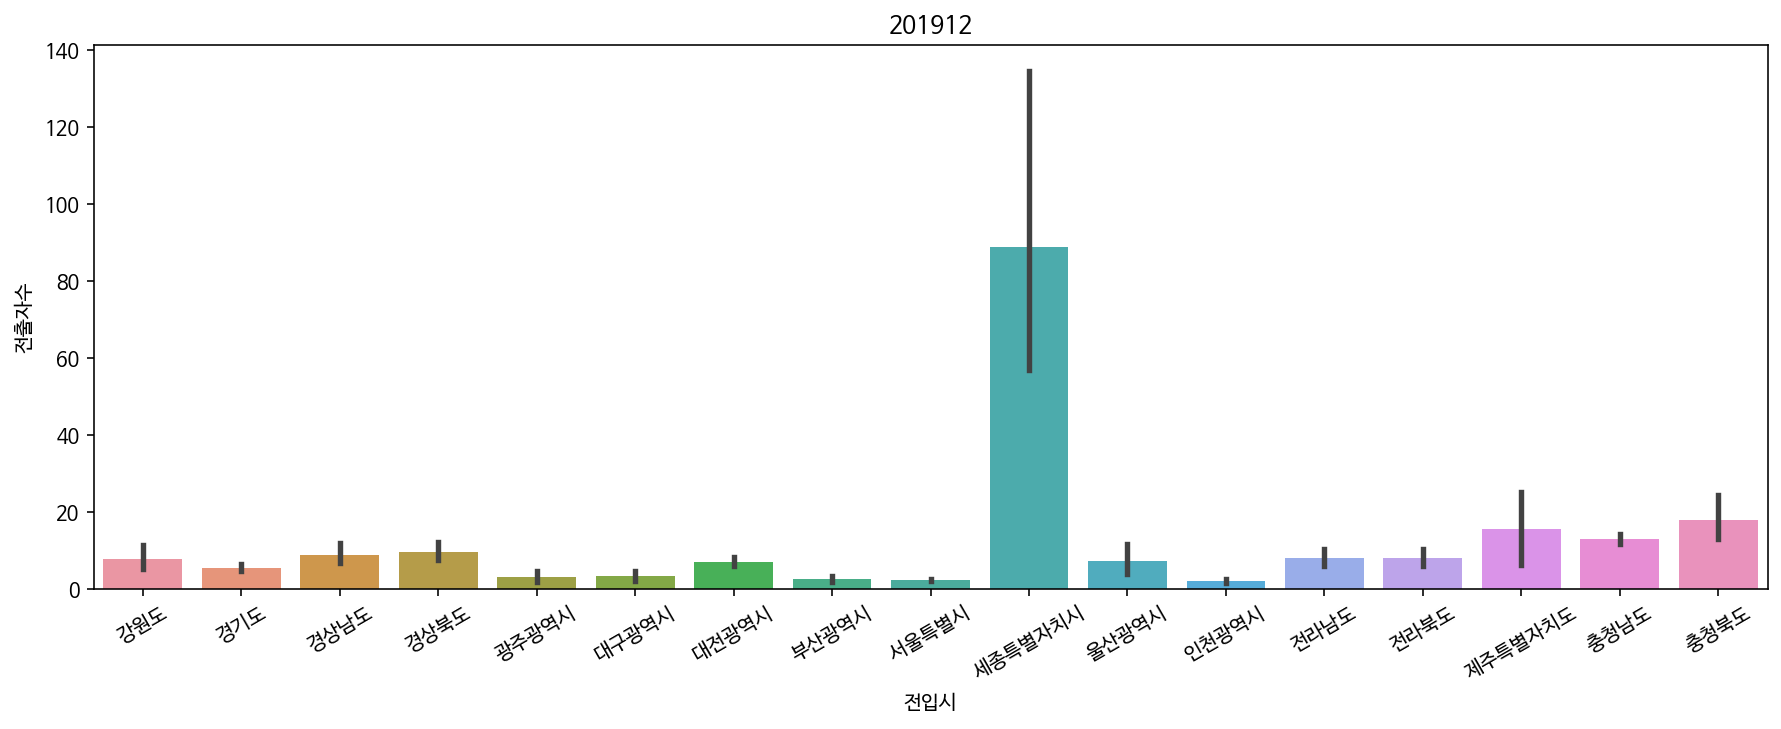

In [ ]:
a = 201901

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=out_a['전입시'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

# 2020년도 전입자 추이

In [ ]:
df_out = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SBJ_2102_001.zip (Unzipped Files)/21.세종시_전출자수.csv', encoding='utf-8')
df_out

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동
0      201701     3    조치원읍   강원도      원주시    단계동
1      201701     9    조치원읍   강원도      춘천시   신사우동
2      201701    13    조치원읍   강원도      홍천군     서면
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동
...       ...   ...     ...   ...      ...    ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍
80988  202101     2     다정동  충청북도   청주시상당구   용암1동
80989  202101    35     다정동  충청북도   청주시청원구    오창읍
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍

[80992 rows x 6 columns]

In [ ]:
a = 202001

for i in range(1, 13):
    df_out_a = df_out['년월']==a
    df_out[a] = df_out_a
    a += 1
print(df_out)

           년월  전출자수 세종전출행정동   전입시  ... 202009 202010  202011  202012
0      201701     3    조치원읍   강원도  ...  False  False   False   False
1      201701     9    조치원읍   강원도  ...  False  False   False   False
2      201701    13    조치원읍   강원도  ...  False  False   False   False
3      201701     3    조치원읍   경기도  ...  False  False   False   False
4      201701     1    조치원읍   경기도  ...  False  False   False   False
...       ...   ...     ...   ...  ...    ...    ...     ...     ...
80987  202101    22     다정동  충청북도  ...  False  False   False   False
80988  202101     2     다정동  충청북도  ...  False  False   False   False
80989  202101    35     다정동  충청북도  ...  False  False   False   False
80990  202101    13     다정동  충청북도  ...  False  False   False   False
80991  202101    84     다정동  충청북도  ...  False  False   False   False

[80992 rows x 18 columns]


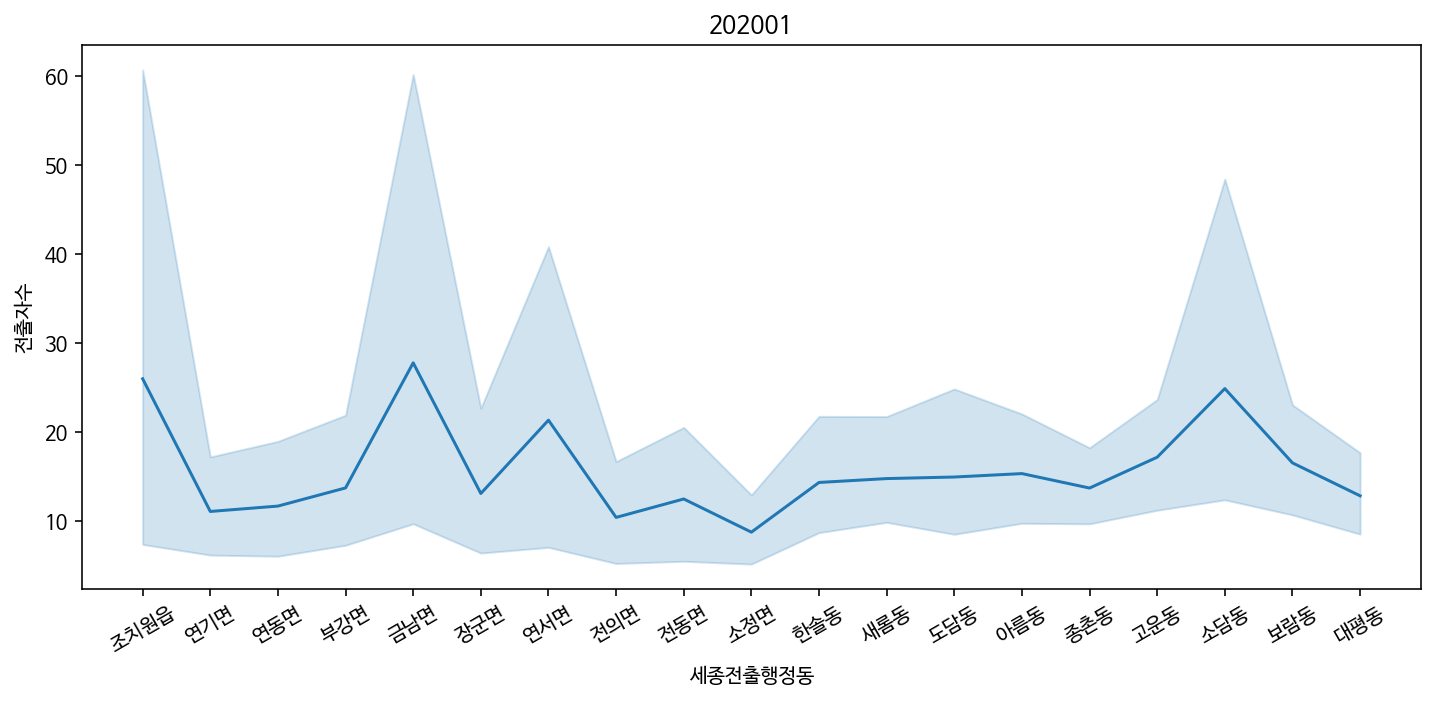

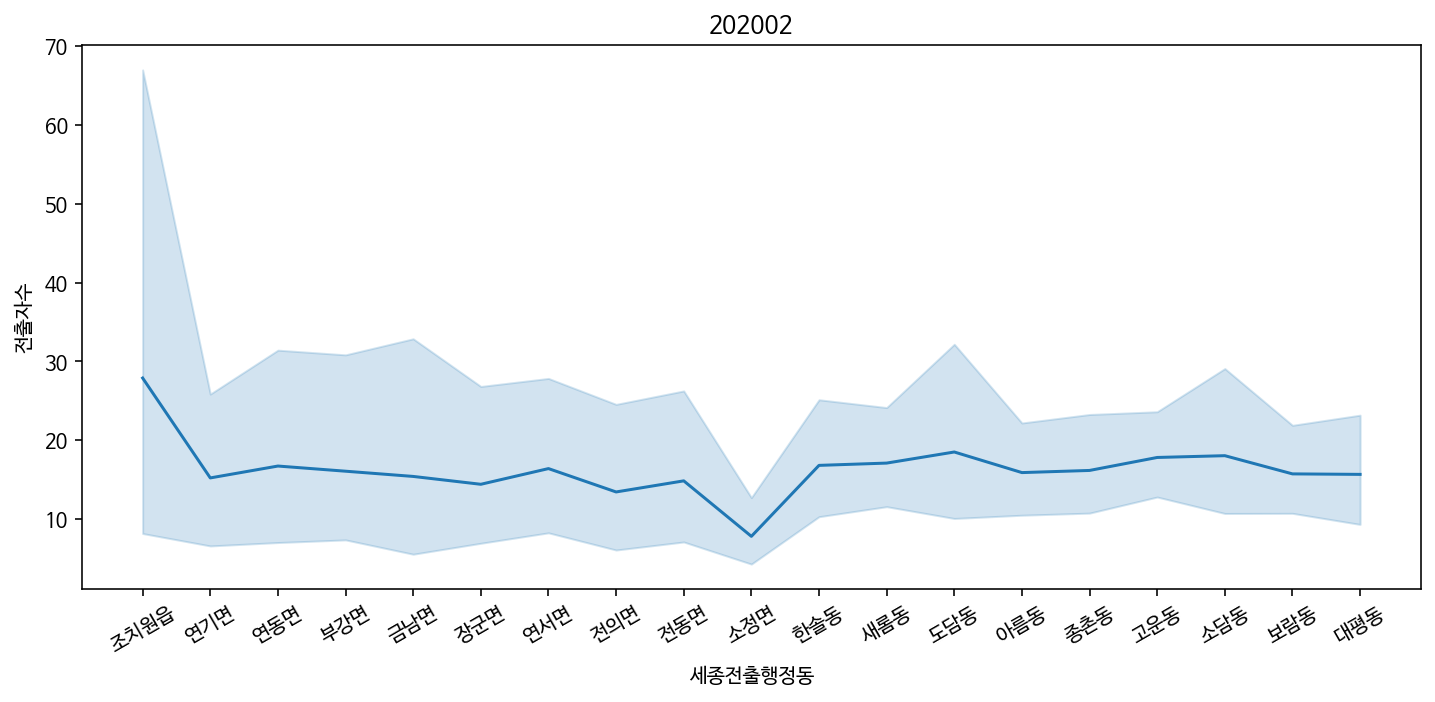

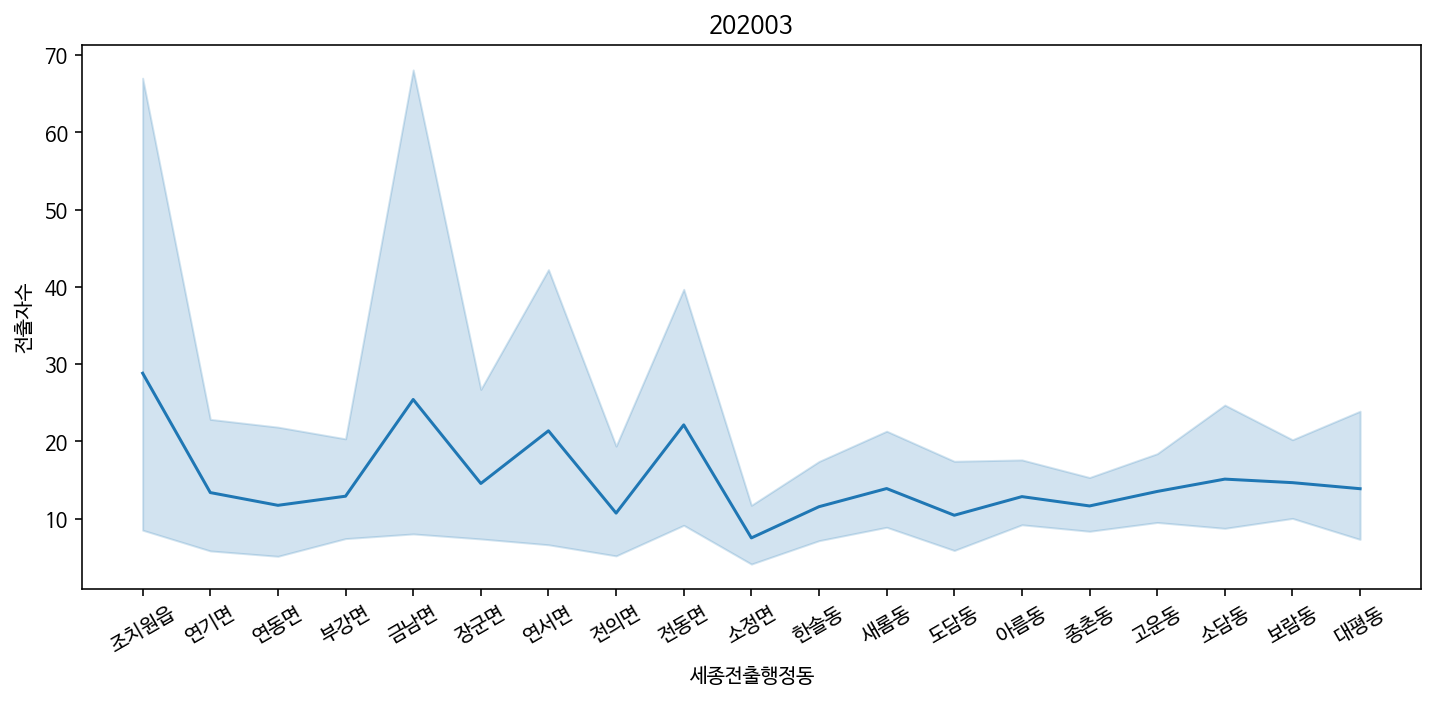

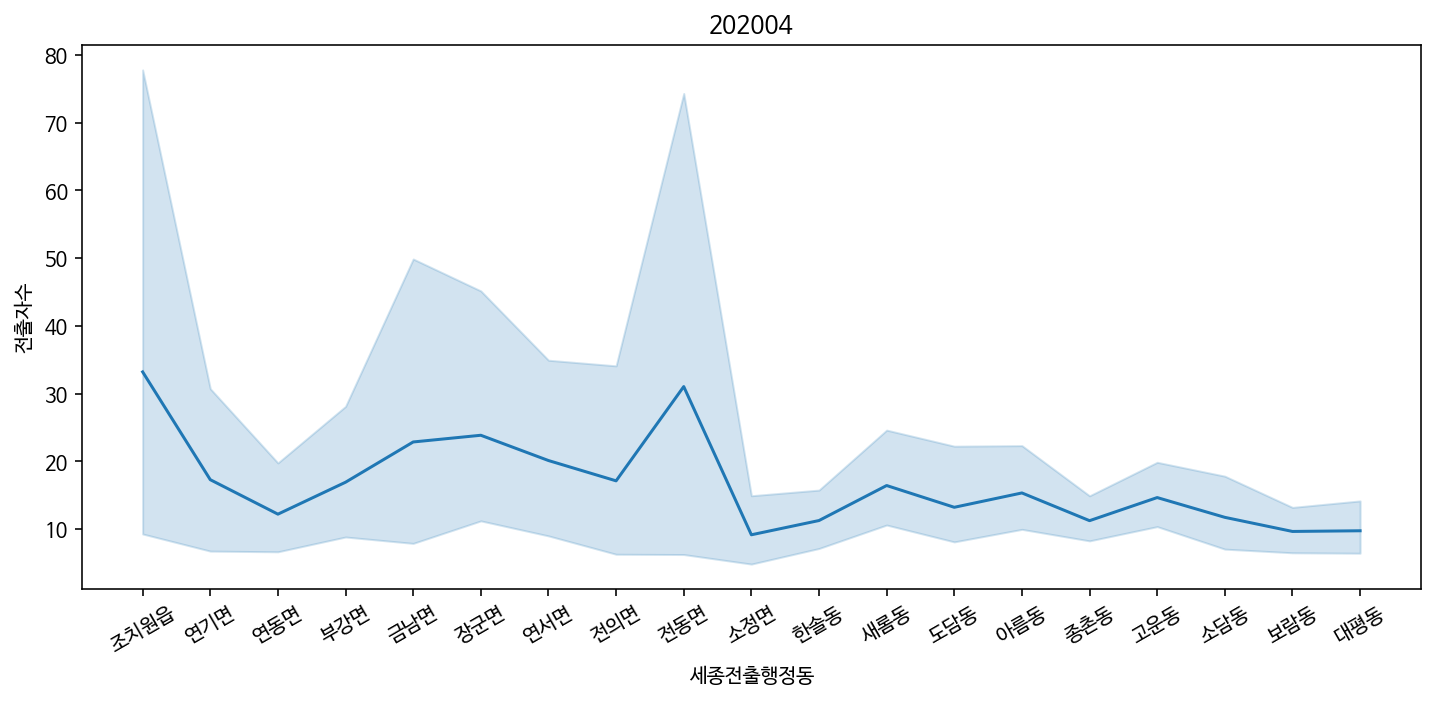

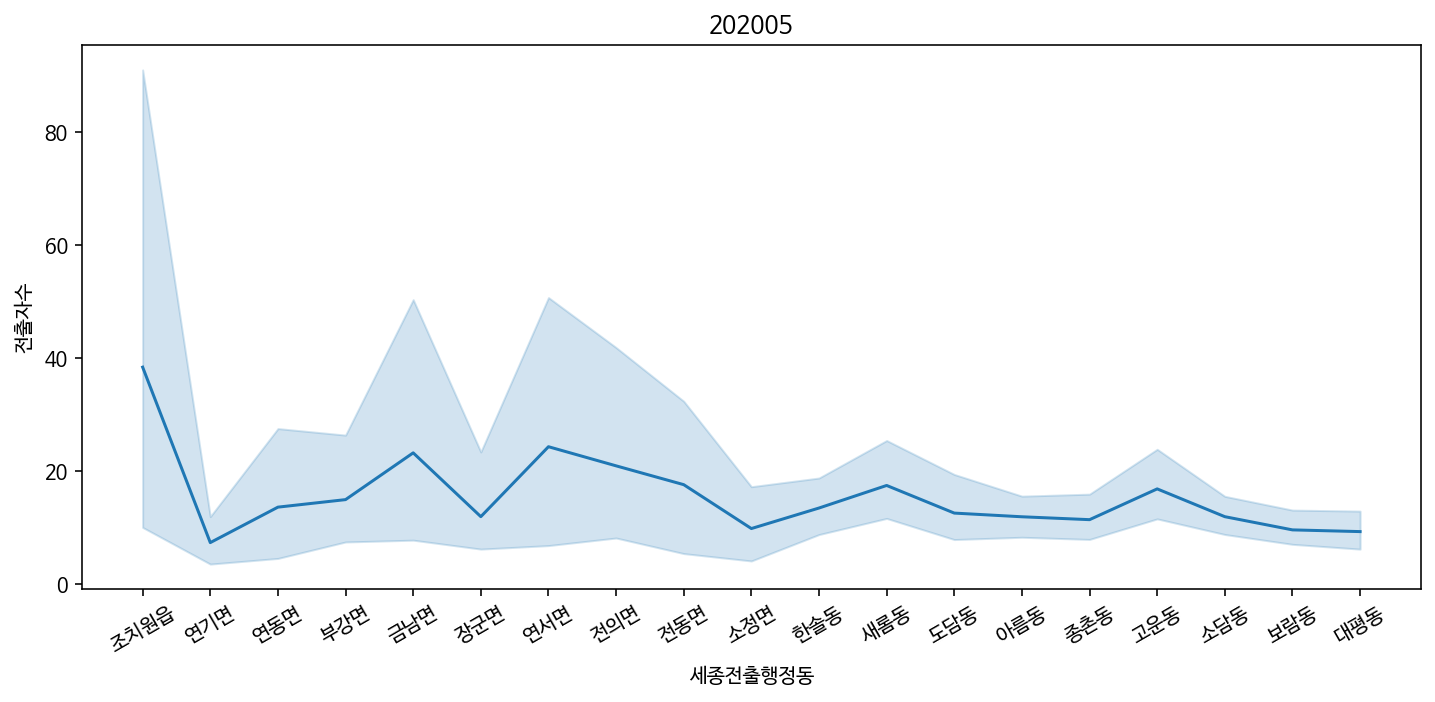

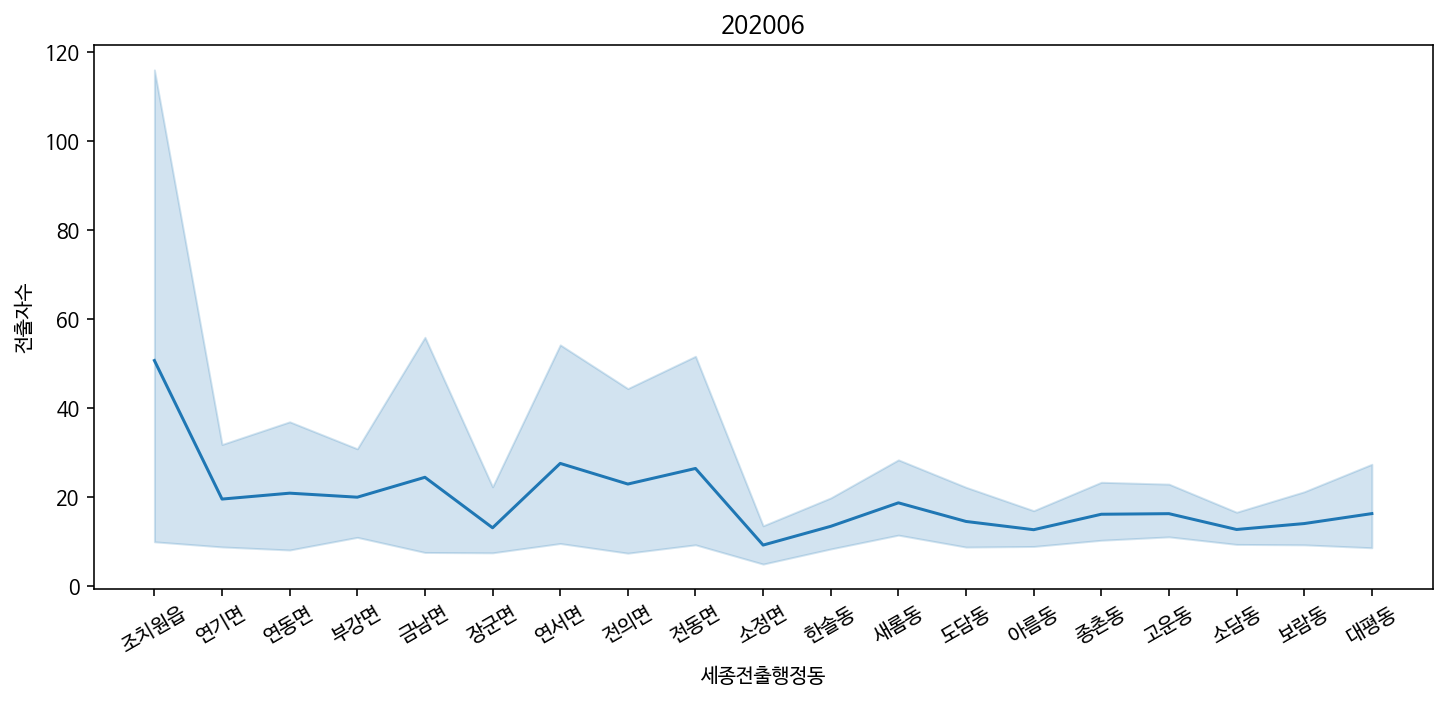

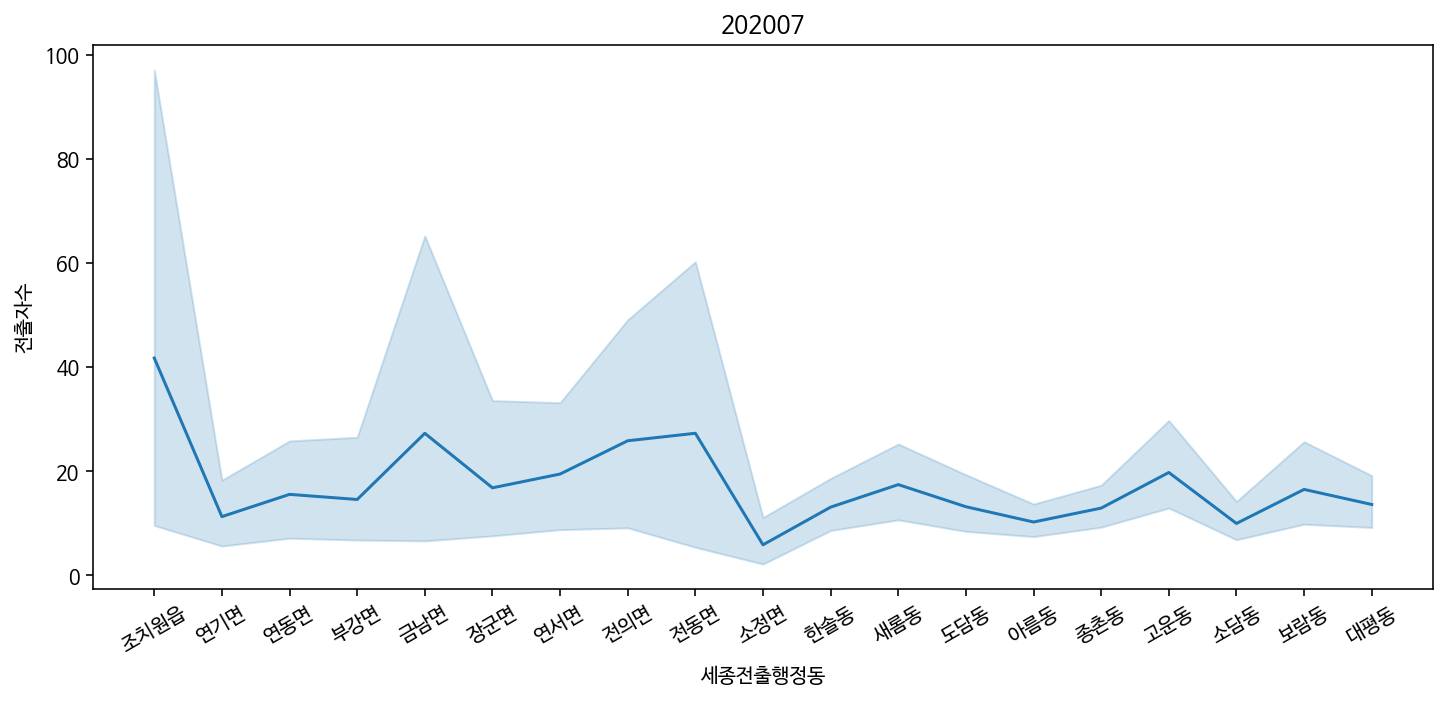

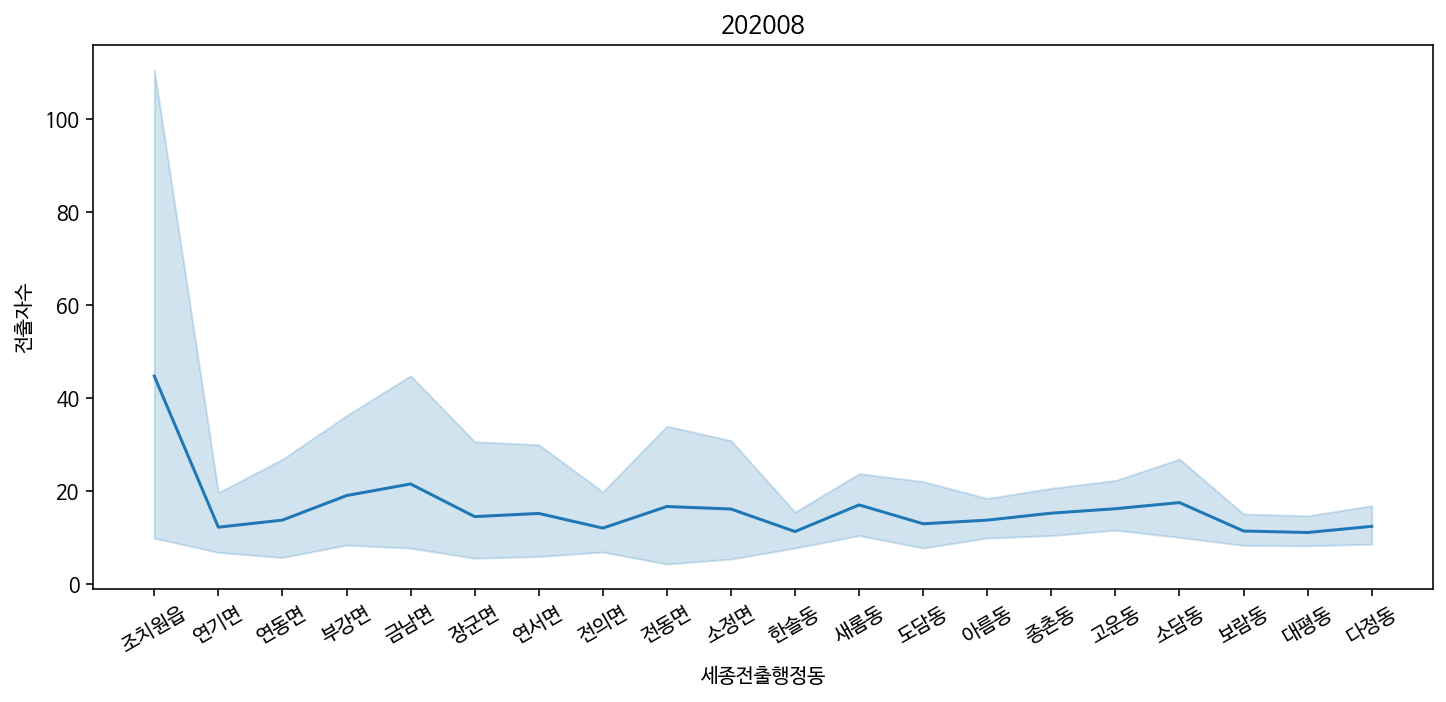

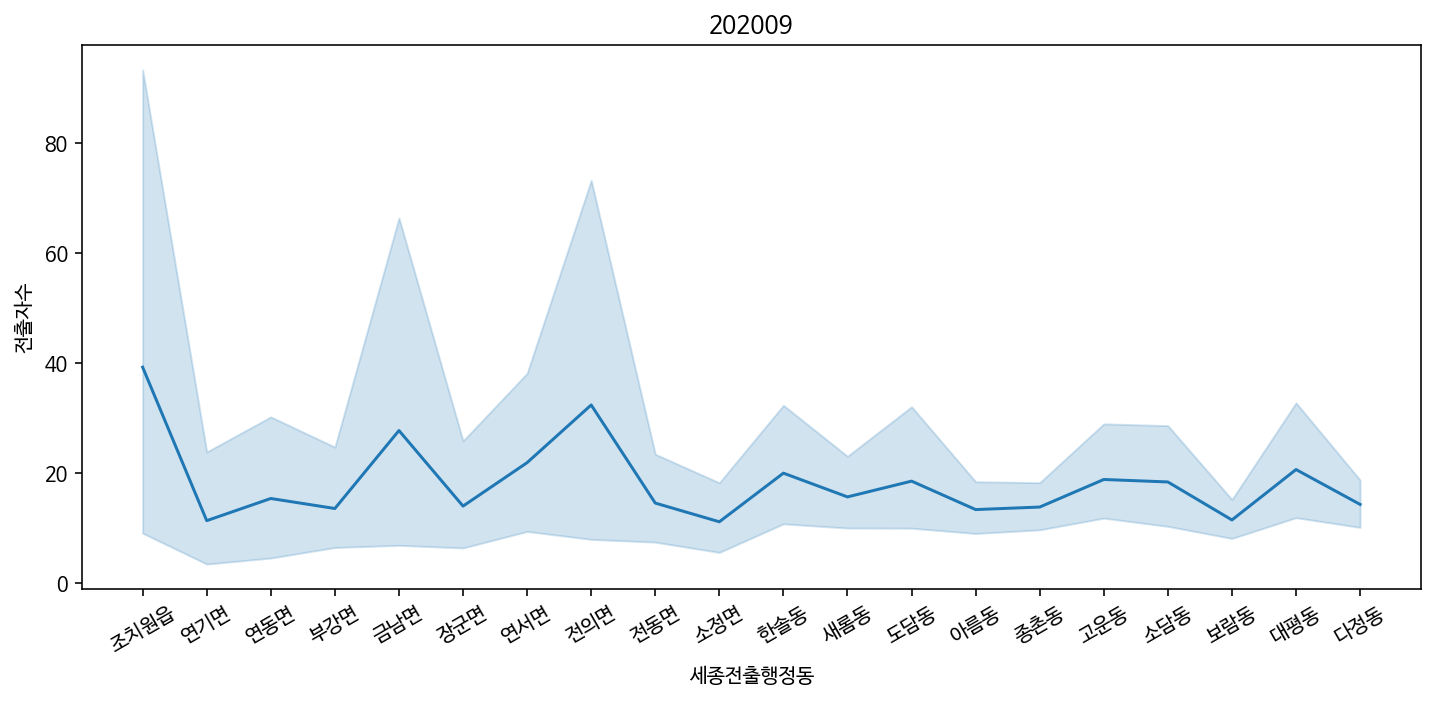

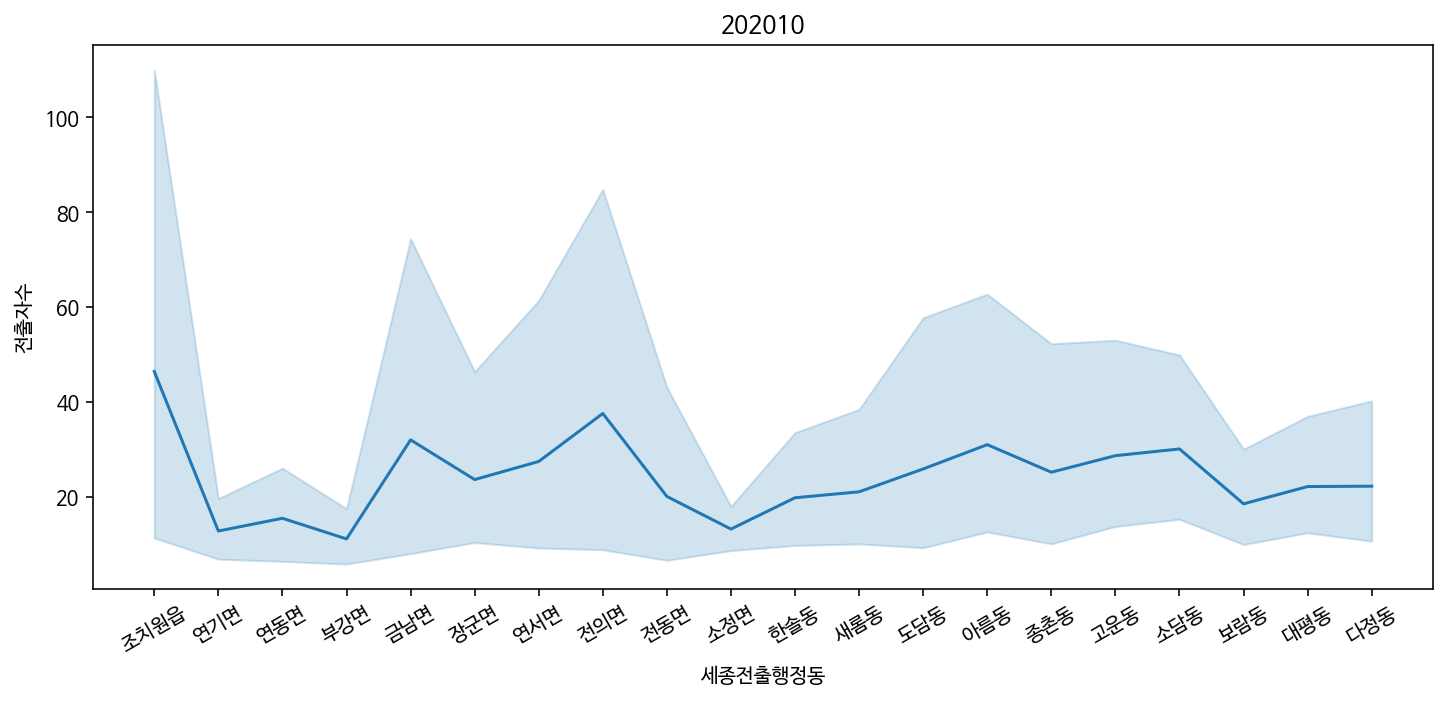

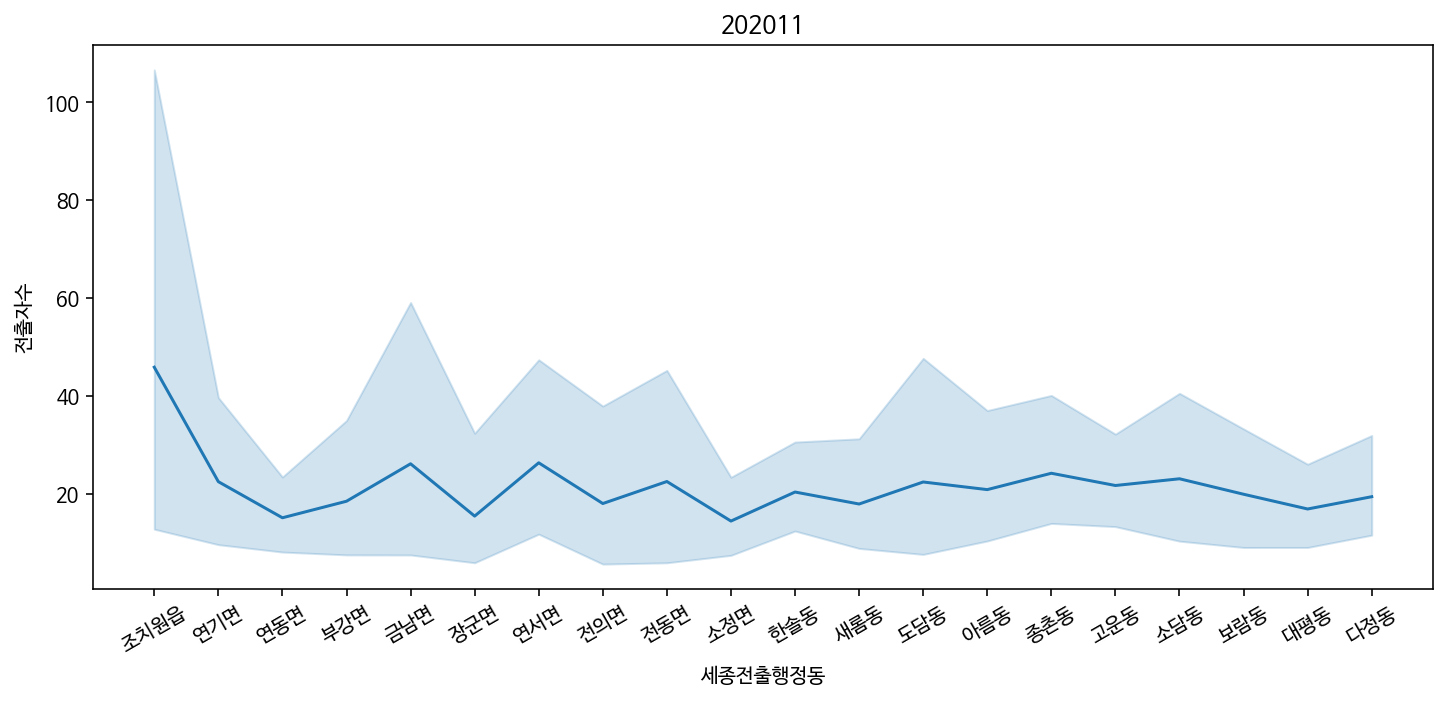

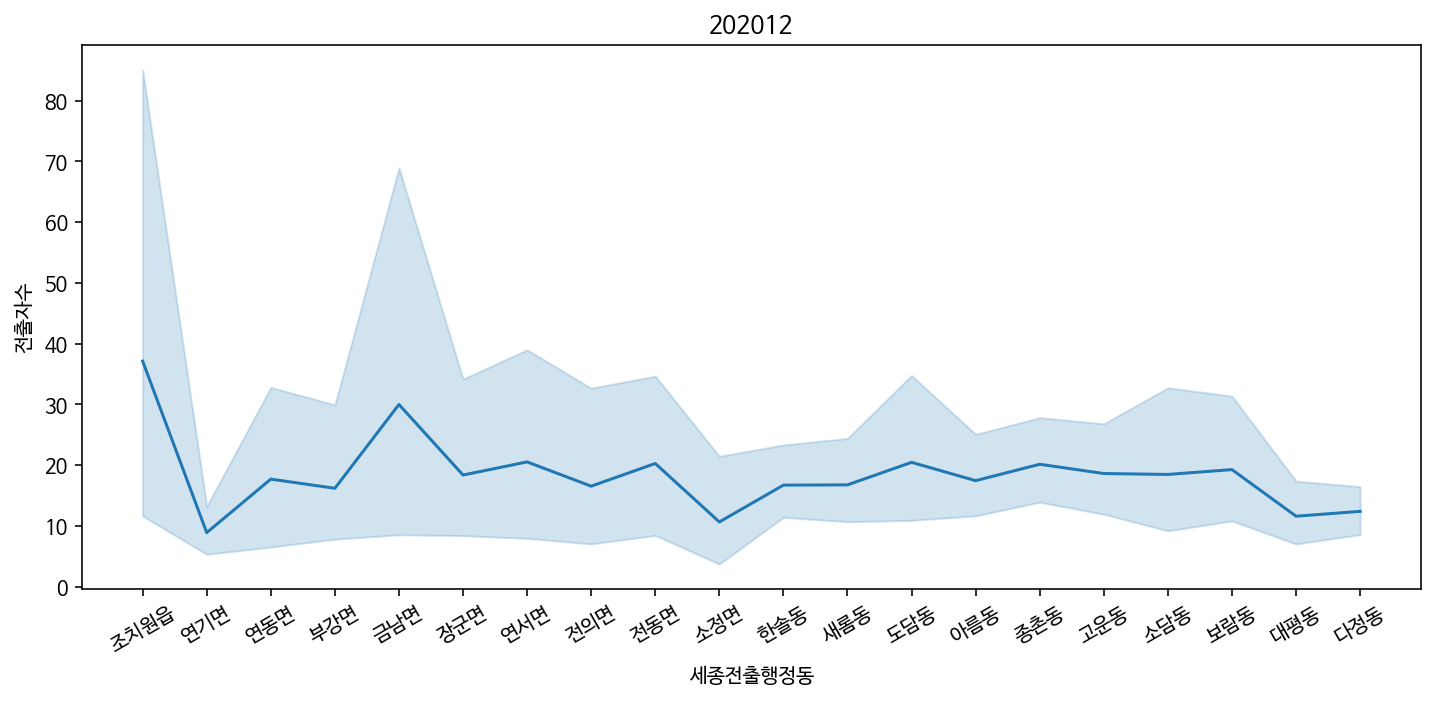

In [ ]:
a = 202001

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(12,5))
    sns.lineplot(x=out_a['세종전출행정동'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1

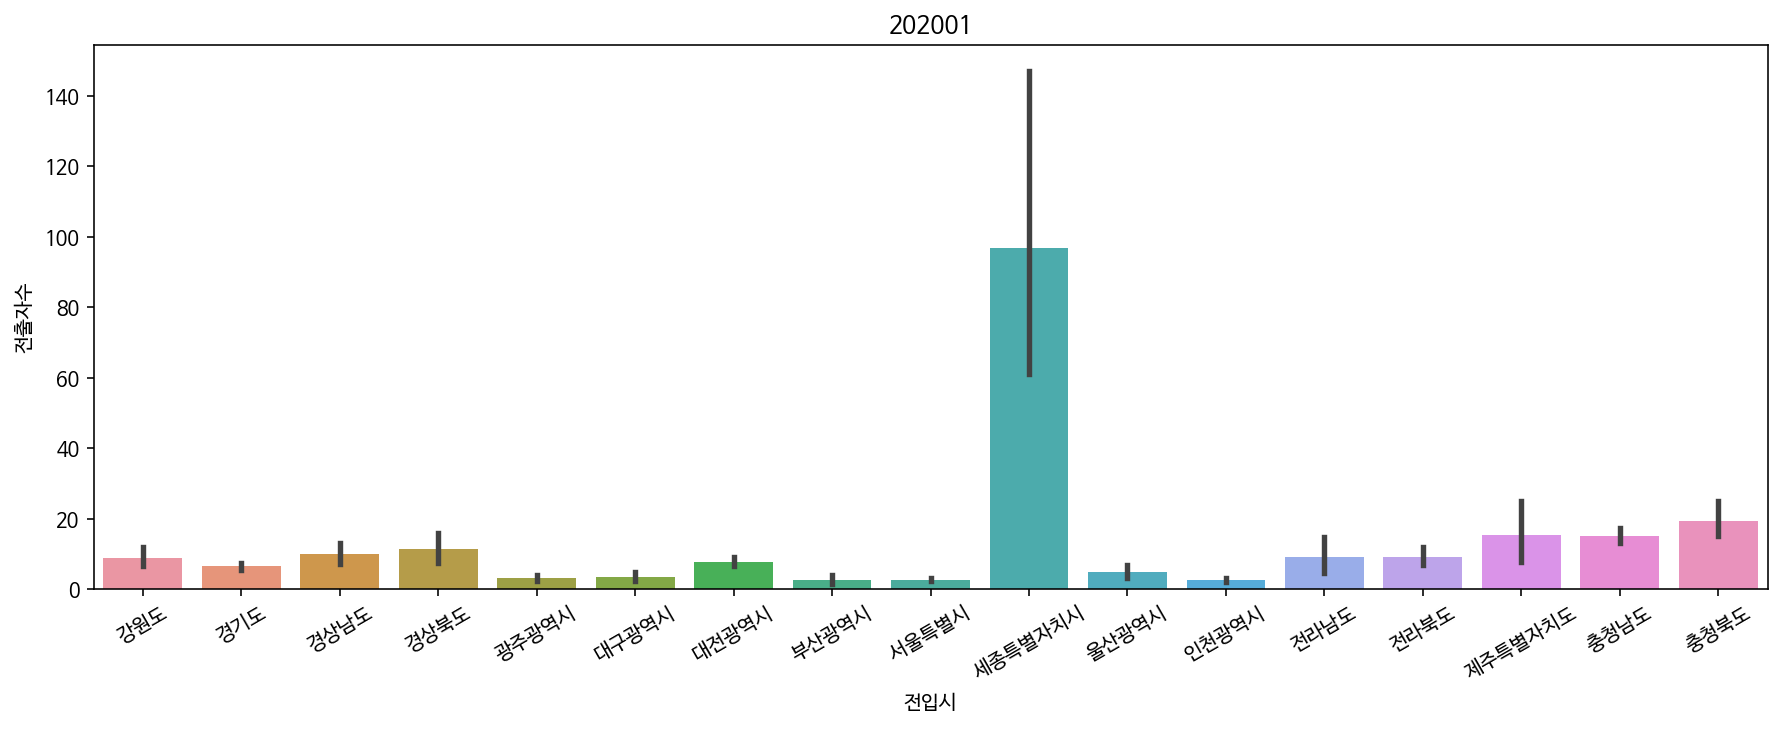

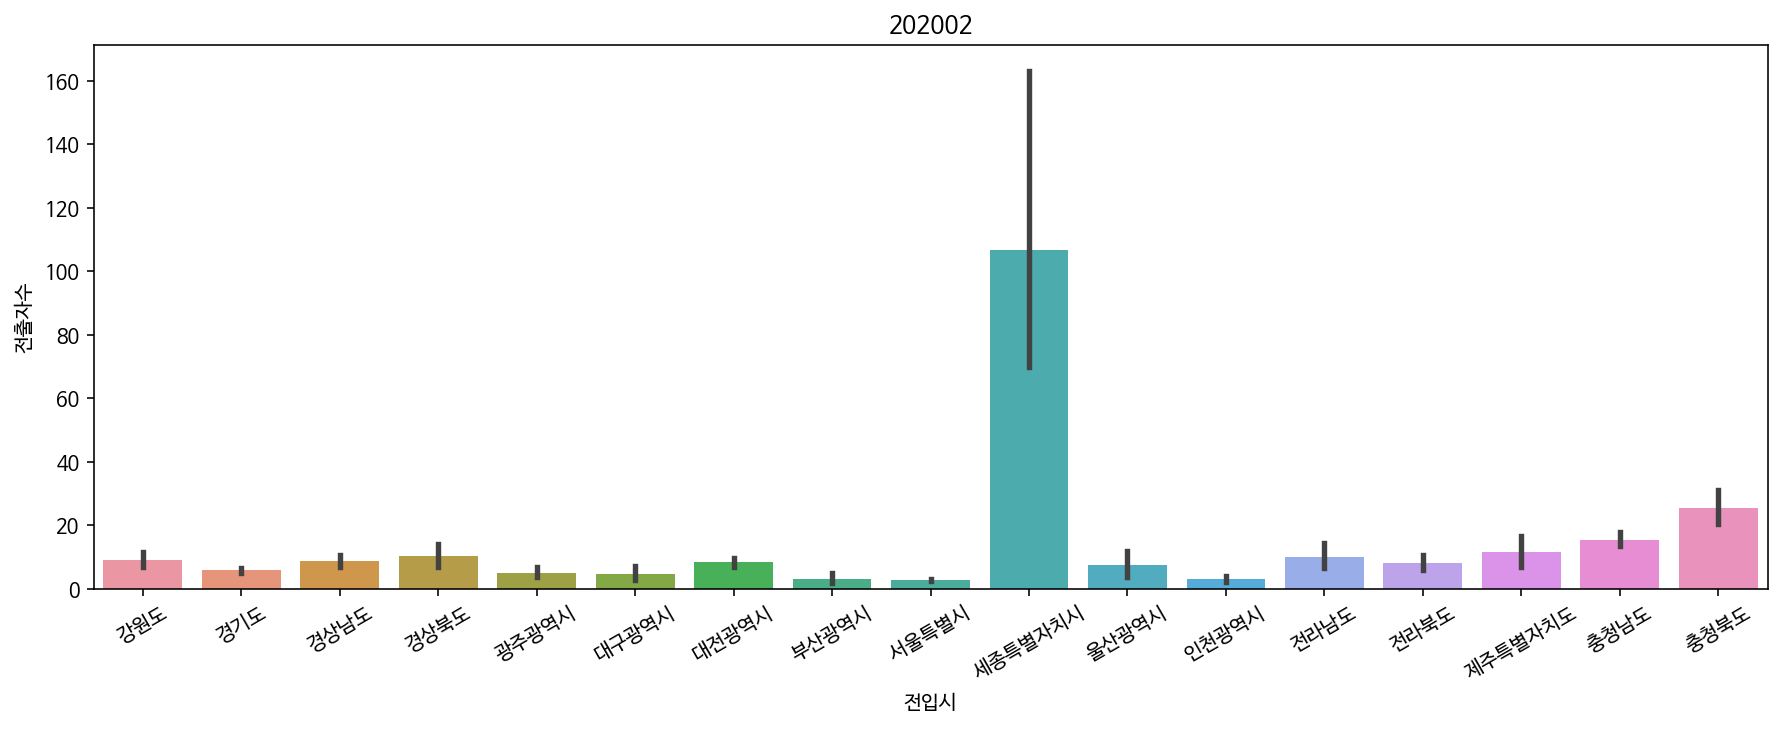

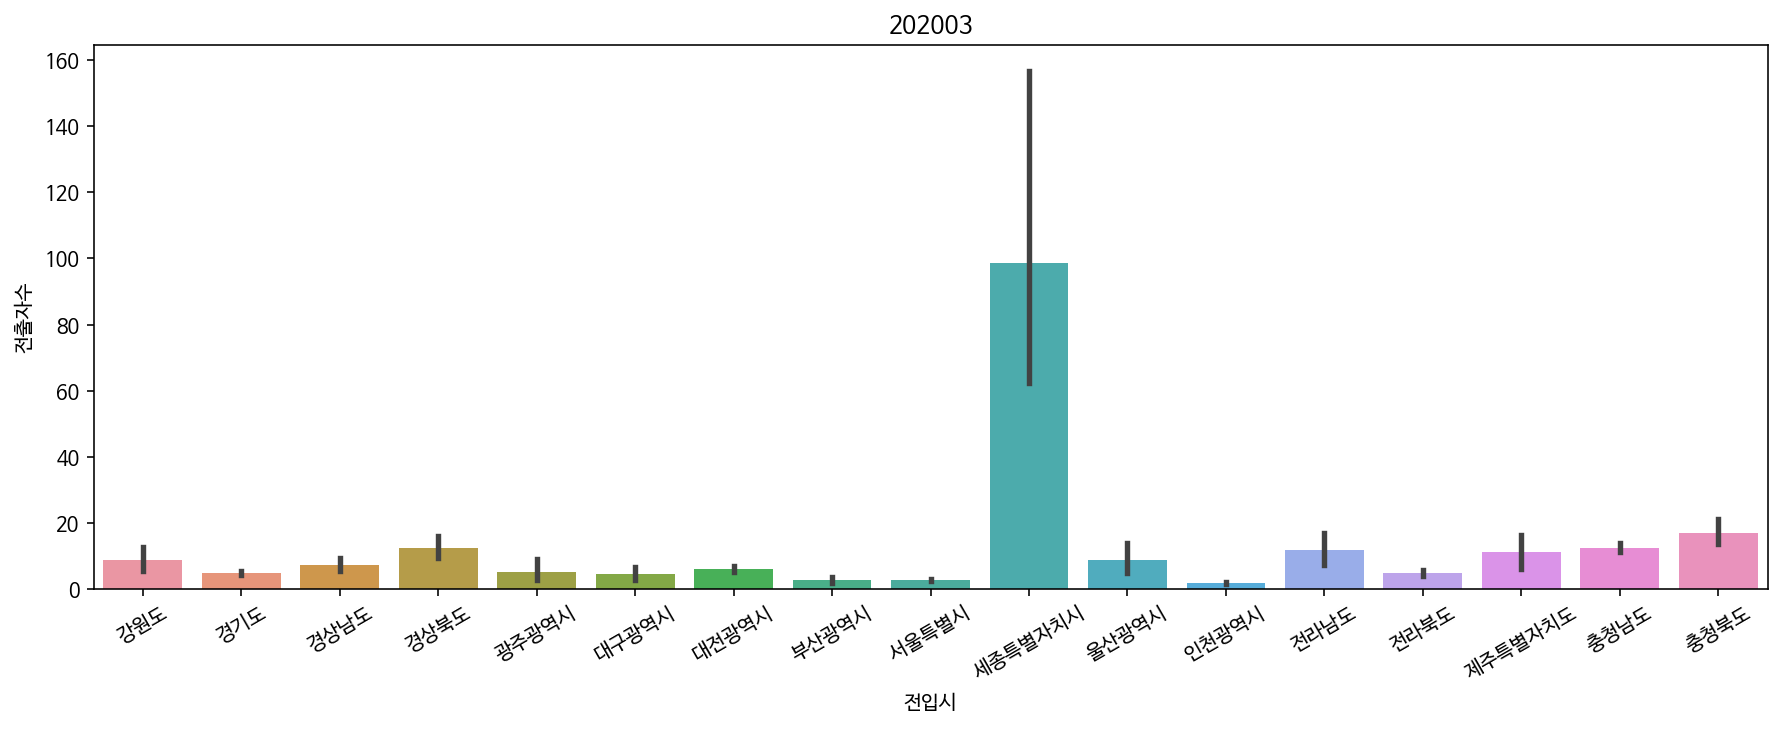

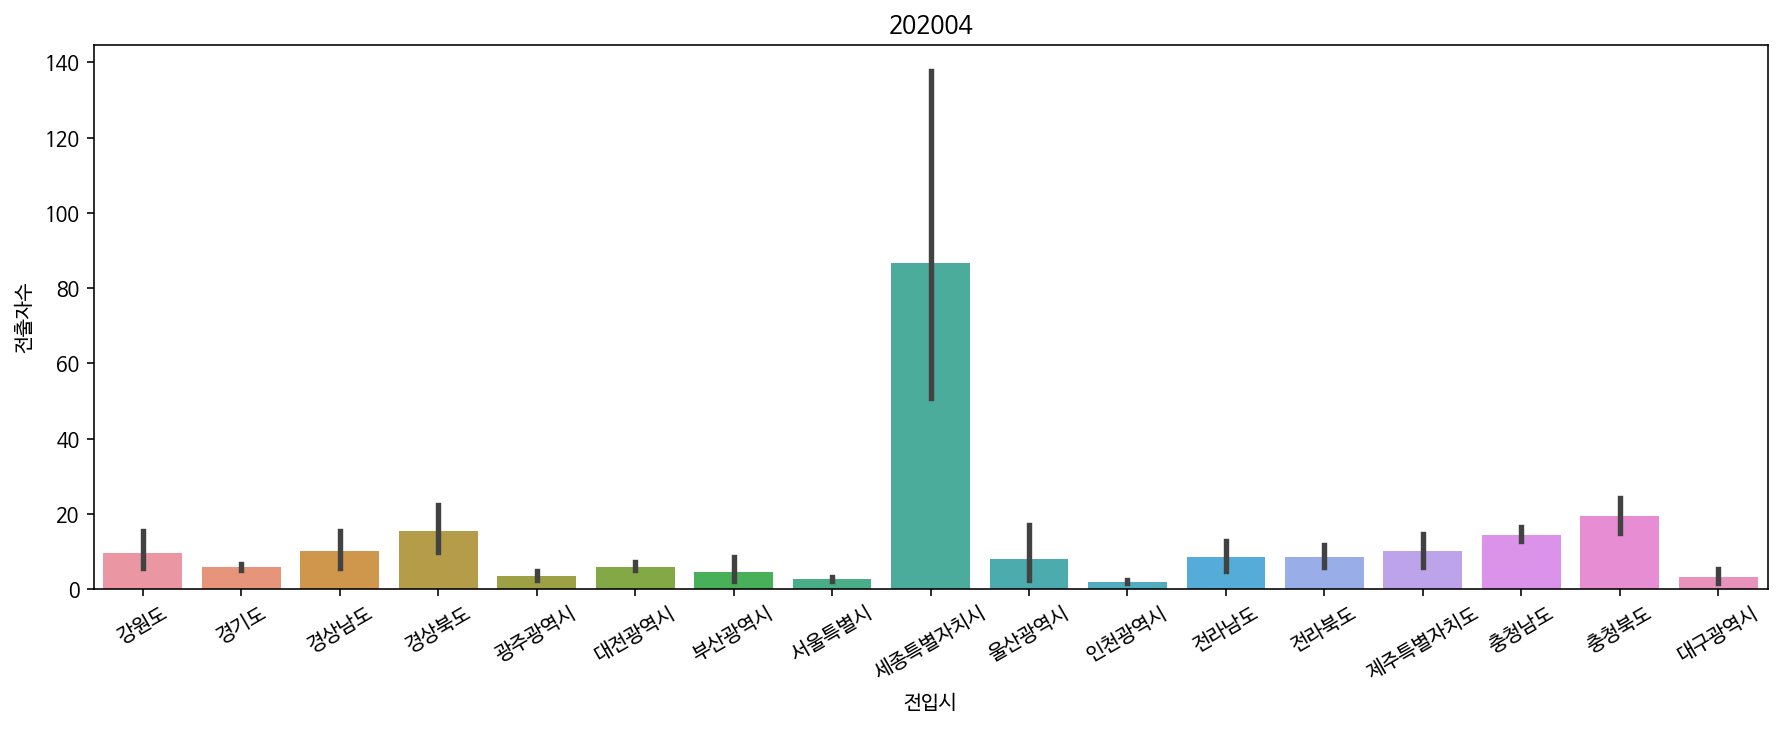

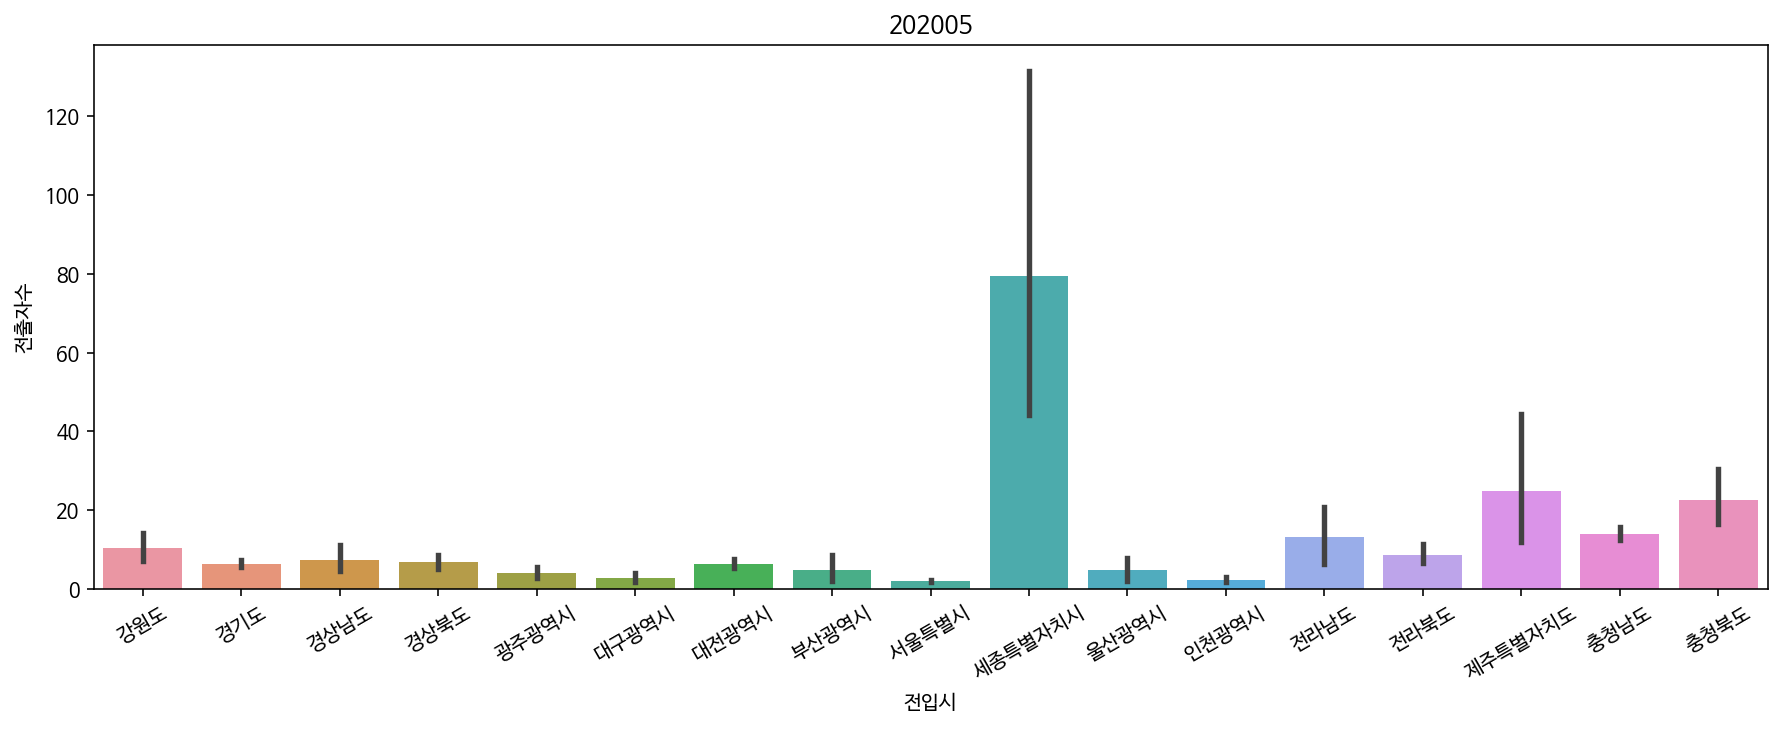

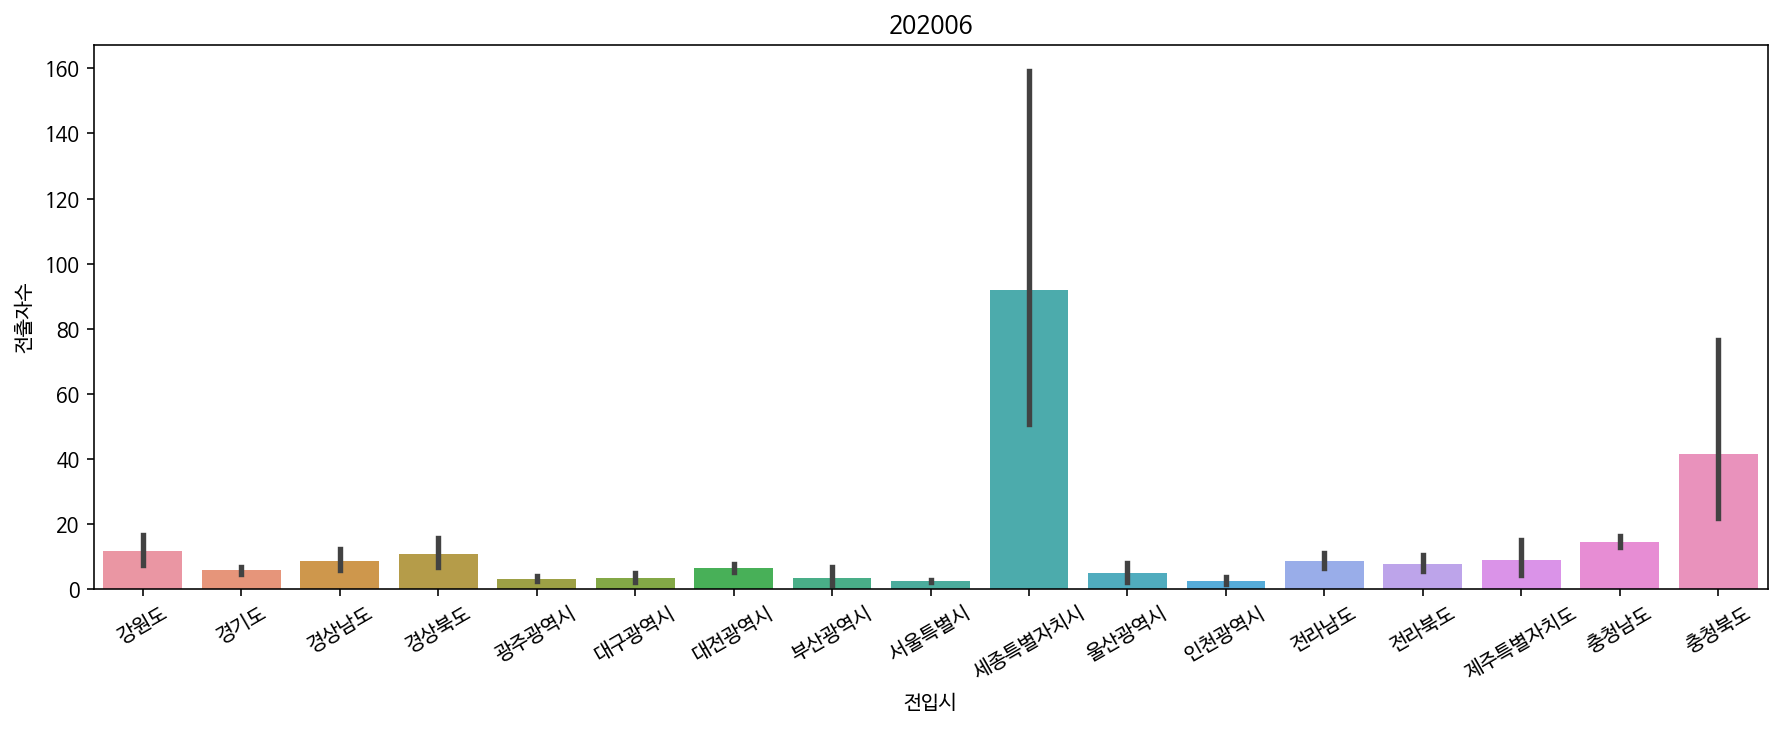

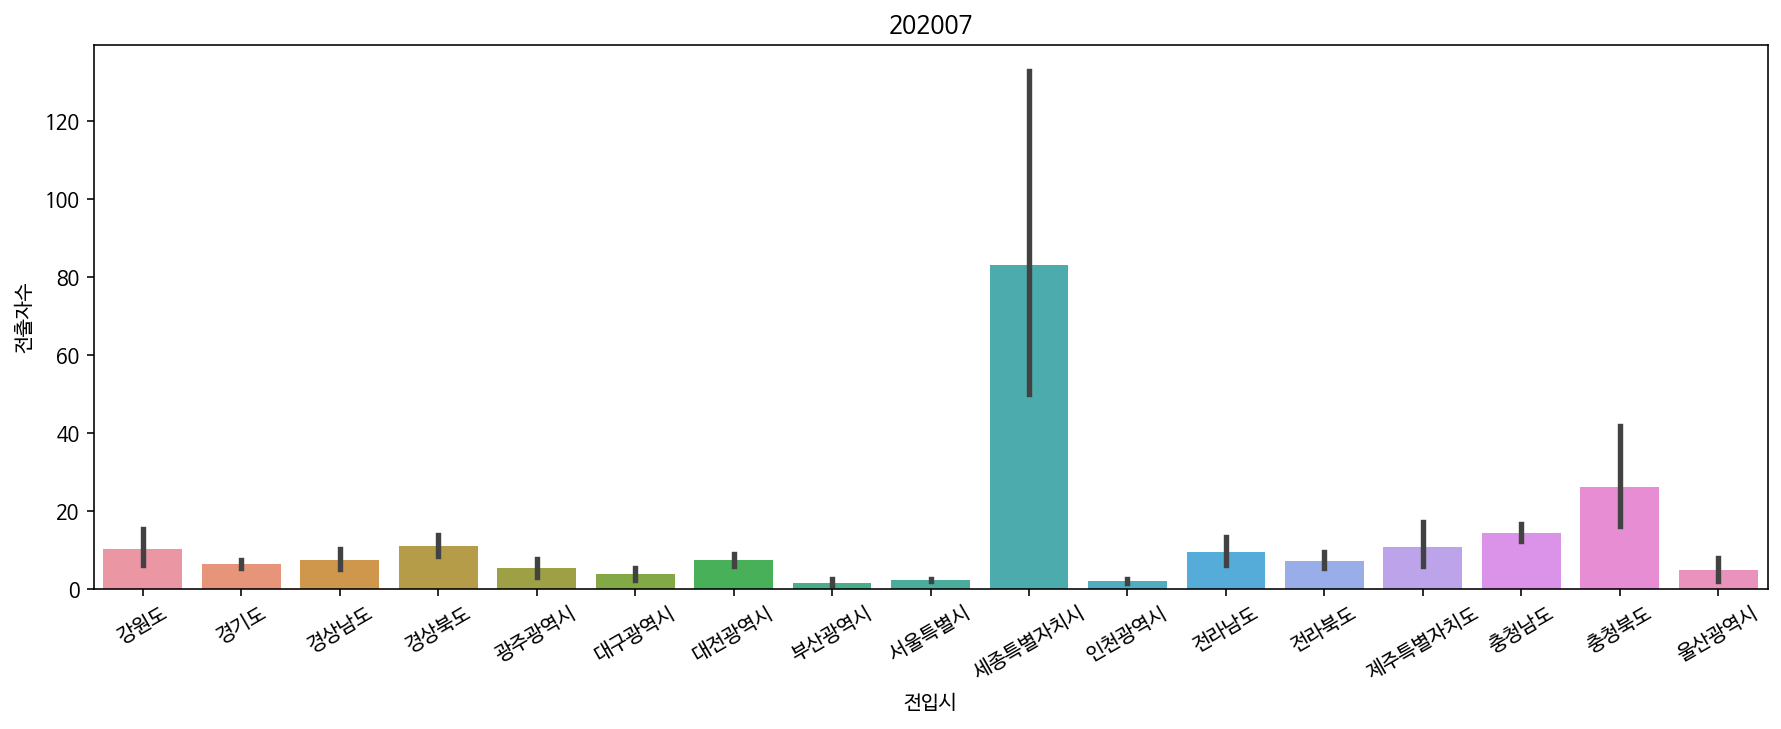

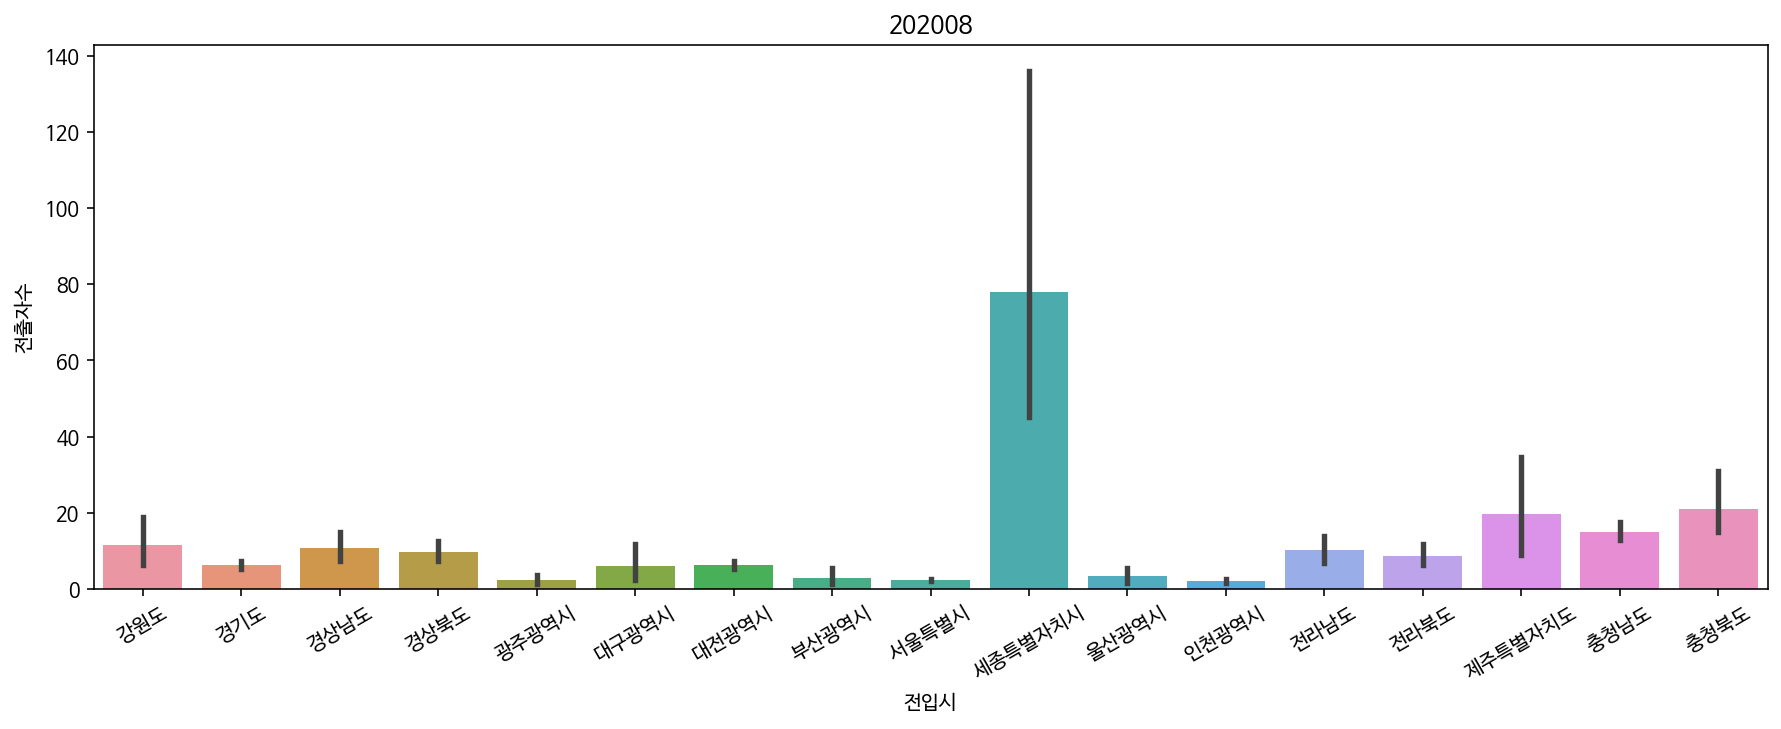

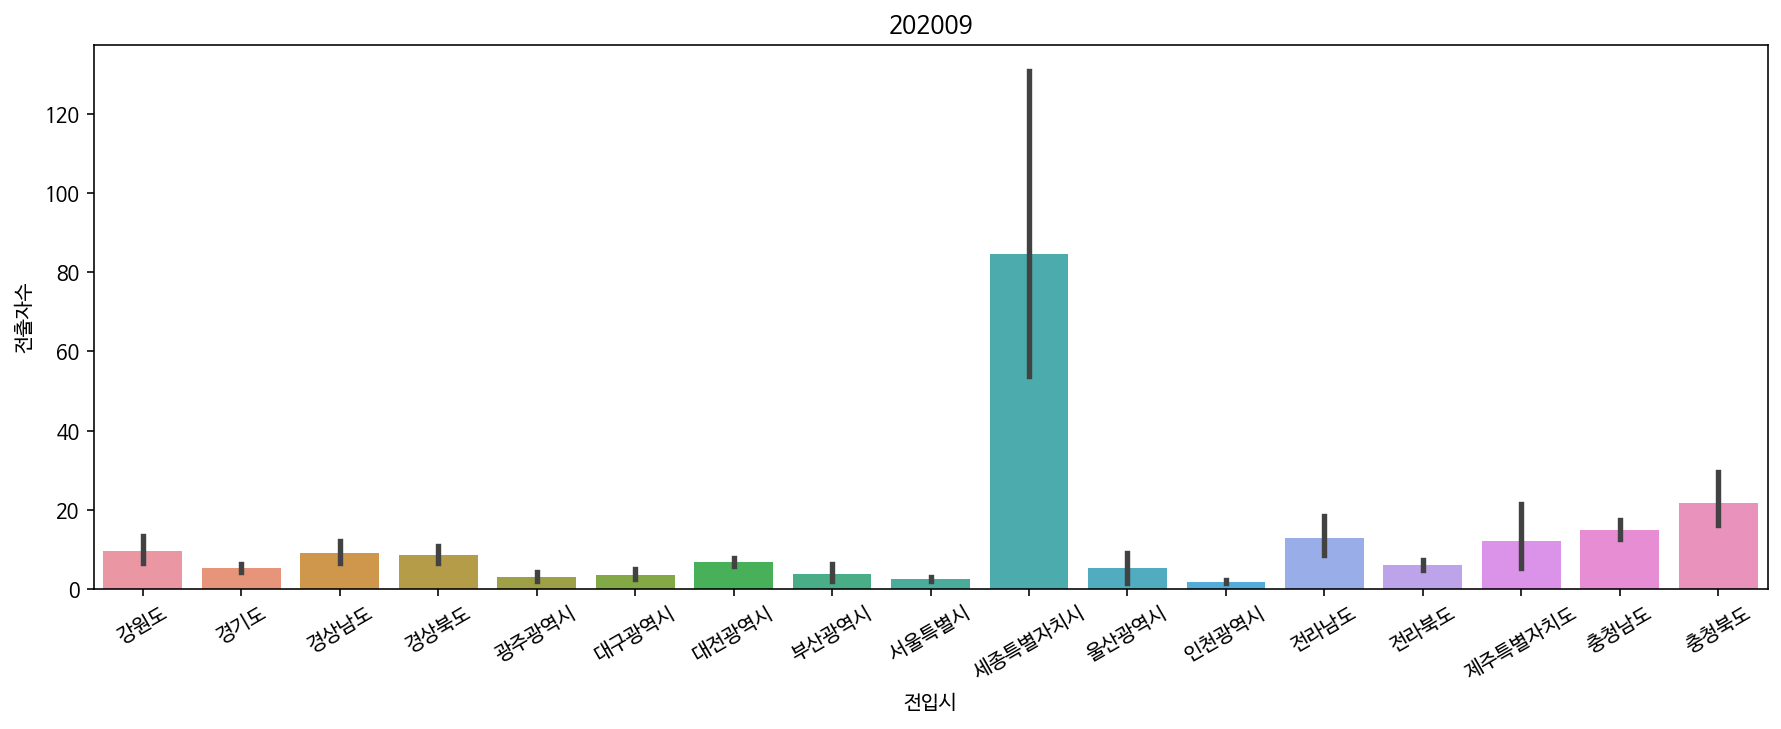

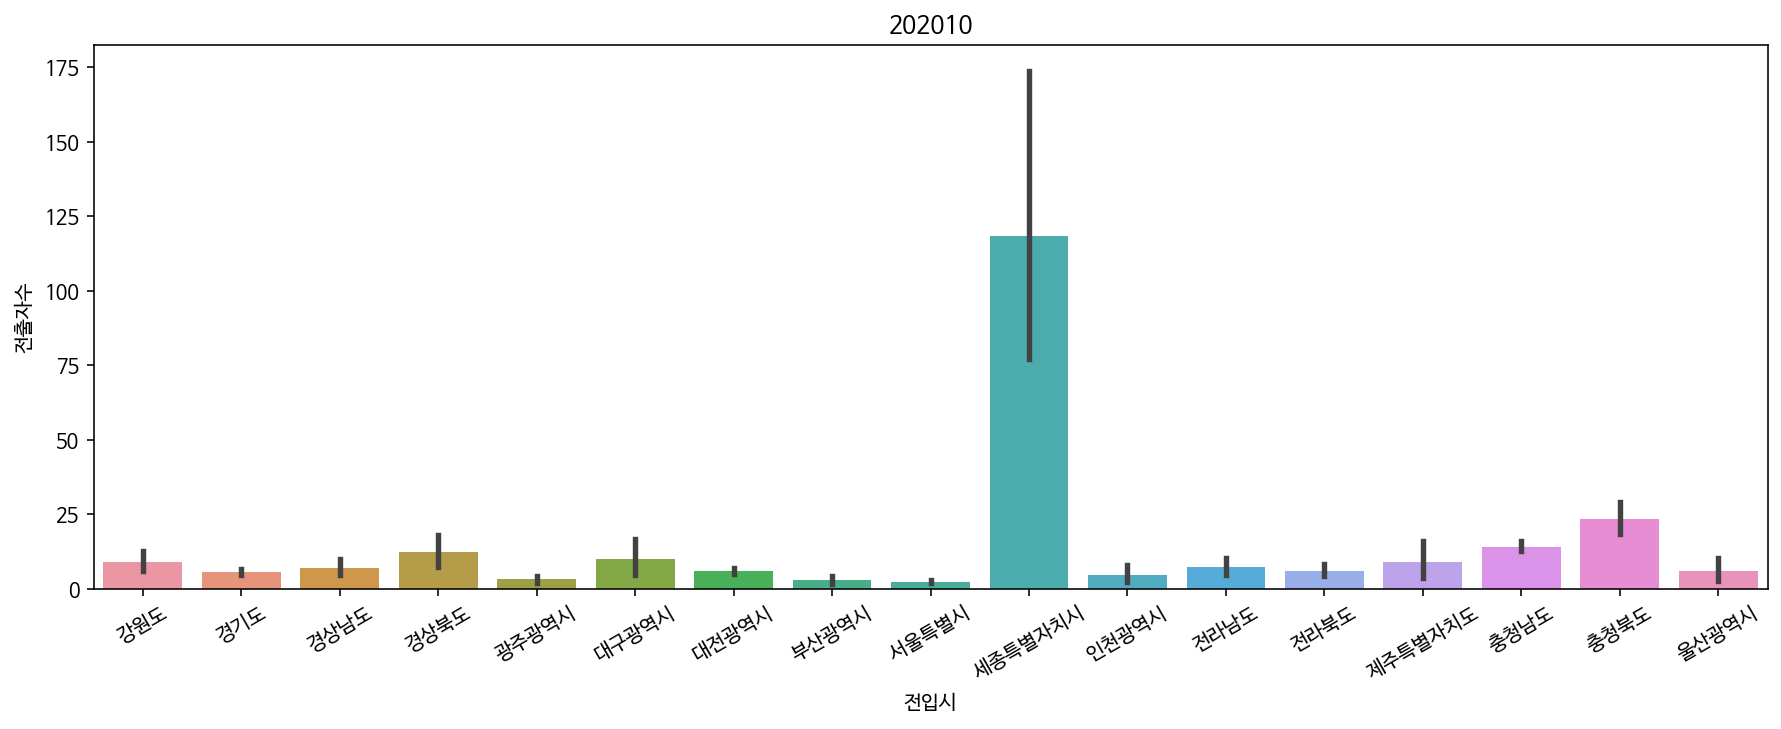

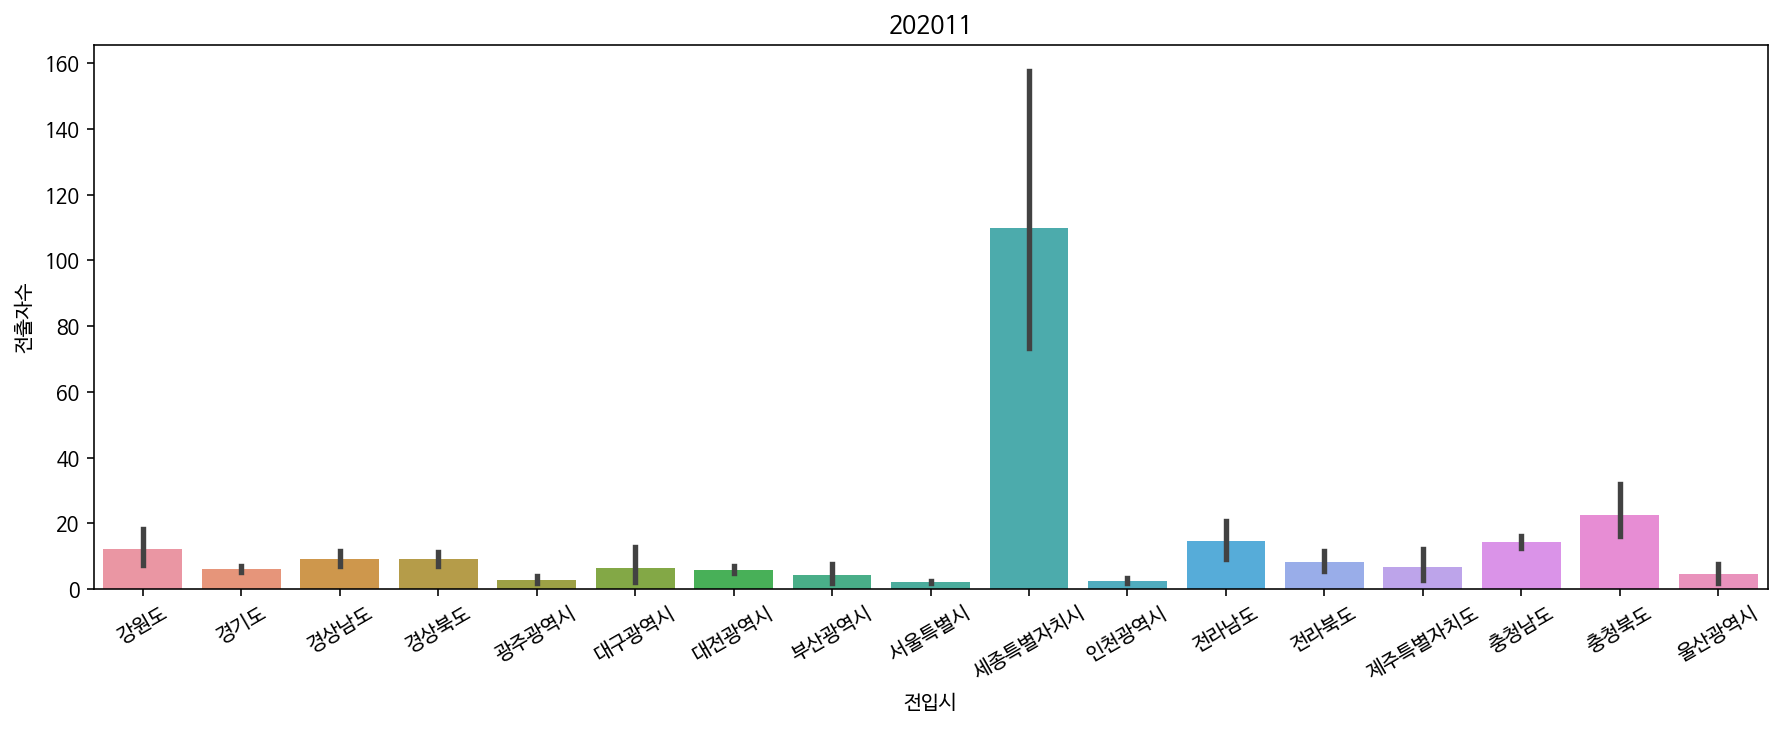

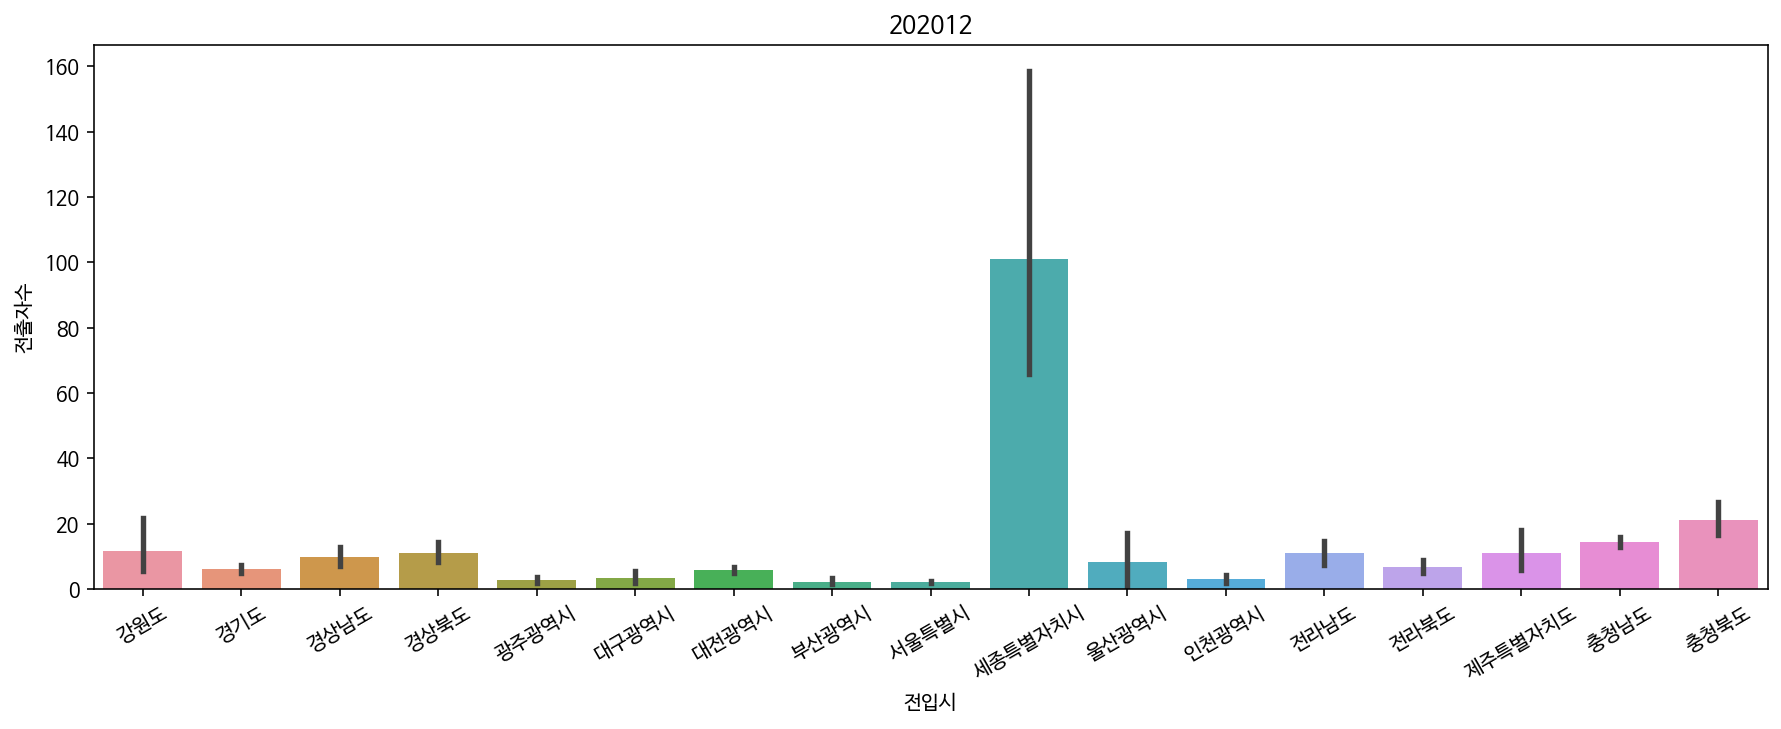

In [ ]:
a = 202001

for i in range(1,13):
    aa = df_out[a] == True
    out_a = df_out[aa]
    plt.figure(figsize=(15,5))
    sns.barplot(x=out_a['전입시'], y=out_a['전출자수'])
    plt.xticks(rotation=30, fontsize=10)
    plt.title(a)
    plt.show()
    a +=1